# EDA on Loan Default Risk

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

- **'application_data.csv'** contains all the information of the
client at the time of application. The data is about whether a
client has payment difficulties.
- **'previous_application.csv'** contains information about the client’s
previous loan data. It contains the data whether the previous
application had been Approved, Cancelled, Refused or Unused offer.
- **'columns_description.csv'** is a data dictionary which describes
the meaning of the variables.

In [2]:
# import datasets
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')
columns_description = pd.read_csv('columns_description.csv', sep=",", encoding='cp1252') # We set encoding to include special characters '0x85' 

# Data Cleaning

## 1) application_data.csv

In [3]:
application_data.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [4]:
application_data.shape

(307511, 122)

The 'application_data' dataset has 122 columns, in which the target variable is on the "TARGET" column. We can see its meaning below.

In [5]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
application_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
# Keep for future use
def explain(column):
    print(columns_description[columns_description['Row']==column]['Description'].values[0])

In [8]:
explain('TARGET')

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


We want to check which columns are correlated to the "TARGET" column. 

In [9]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [10]:
application_data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [11]:
application_data['TARGET'].value_counts()/len(application_data)*100

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

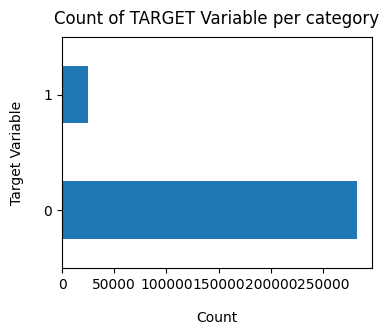

In [12]:
application_data['TARGET'].value_counts().plot(kind='barh', figsize=(4, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

Data is highly imbalanced with ratio approximately 23:2. So we analyse the data with other features while taking the target values separately to get some insights.

In [13]:
# Columns with null value counts
column_counts = application_data.isnull().sum()
contains_null = column_counts[column_counts != 0].sort_values(ascending=False)
with pd.option_context('display.max_rows', None):
    print(contains_null)

COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
COMMONAREA_AVG                  214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

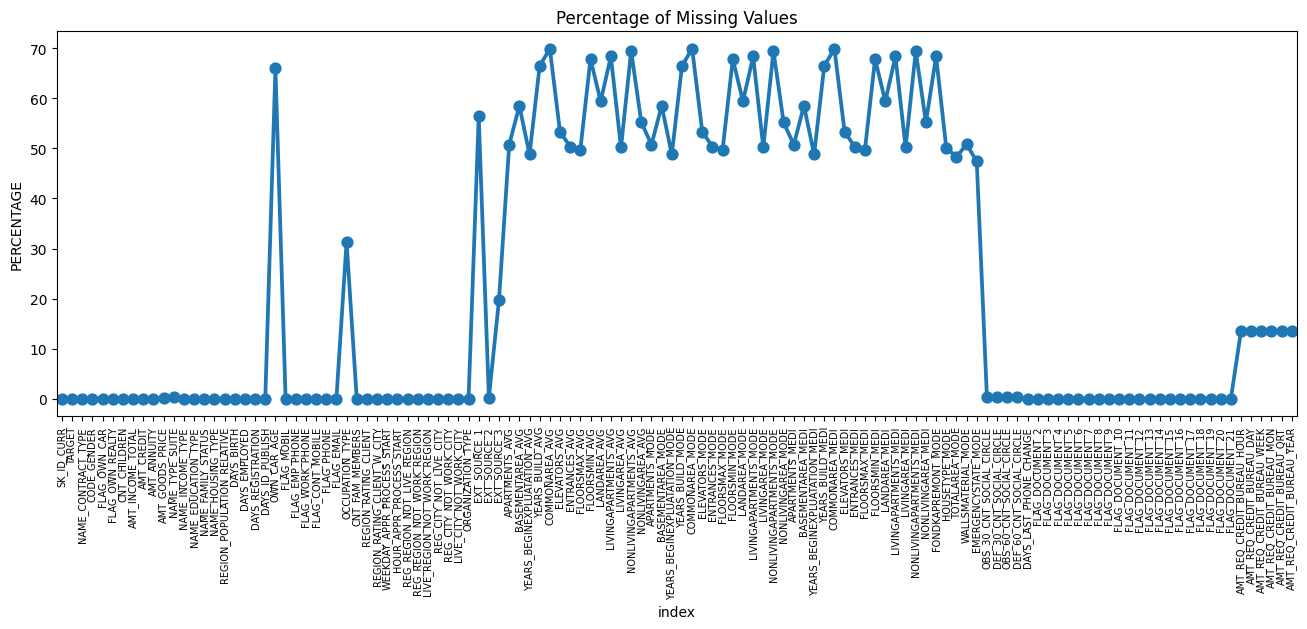

In [14]:
missing = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

There are many columns with more than 40% missing values. We have to delve into each column to check if their missing values are irrelevant or replacable. We shall also check on the columns with 10% ~ 40% missing values (later).

In [15]:
filtered_missing = missing[missing[0]>40].sort_values(by=[0], ascending=False)
for row in filtered_missing.values:
    print("\n" + format(round(row[1], 2), ".2f") + "% " + row[0])
    explain(row[0])


69.87% COMMONAREA_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

69.87% COMMONAREA_MEDI
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

69.87% COMMONAREA_MODE
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

69.43% NONLIVINGAPARTMENTS_AVG
Normalized information about building where the client lives, What

We see that these columns with **more than 40%** missing values consist of 
- Age of client's car (OWN_CAR_AGE)
- Normalized score from external data source (EXT_SOURCE_1)
- Normalized building information (The remaining...)

Intuitively, there is no correlation between these variables and the target variables, but we should their correlation scores among the non-null values.

In [16]:
# Select columns with more than 40 % missing values for further correlationship inspection
columns_head = ['TARGET'] + filtered_missing['index'].values.tolist()
check_application_data = application_data.copy()
check_application_data = check_application_data[columns_head]

In [17]:
check_application_data.dropna(how = 'any', inplace = True)

In [18]:
check_application_data.tail()

TARGET  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
307407       1          0.0084           0.0085           0.0085   
307456       0          0.0016           0.0016           0.0016   
307459       0          0.0633           0.0637           0.0639   
307474       0          0.0048           0.0048           0.0048   
307482       0          0.0037           0.0038           0.0038   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
307407                   0.0000                    0.0000   
307456                   0.0000                    0.0000   
307459                   0.0154                    0.0155   
307474                   0.0000                    0.0000   
307482                   0.0039                    0.0039   

        NONLIVINGAPARTMENTS_MODE FONDKAPREMONT_MODE  LIVINGAPARTMENTS_MEDI  \
307407                    0.0000   reg oper account                 0.0599   
307456                    0.0000   reg oper account                 0.0086   
307459                    0.0156   reg oper account                 0.2018   
307474                    0.0000   reg oper account                 0.0316   
307482                    0.0039      not specified                 0.0316   

        LIVINGAPARTMENTS_AVG  ...  LIVINGAREA_AVG  HOUSETYPE_MODE  \
307407                0.0588  ...          0.0519  block of flats   
307456                0.0084  ...          0.0067  block of flats   
307459                0.1984  ...          0.2796  block of flats   
307474                0.0311  ...          0.0316  block of flats   
307482                0.0311  ...          0.0307  block of flats   

        FLOORSMAX_MODE  FLOORSMAX_AVG  FLOORSMAX_MEDI  \
307407          0.1667         0.1667          0.1667   
307456          0.0417         0.0417          0.0417   
307459          0.4167         0.4167          0.4167   
307474          0.0833         0.0833          0.0833   
307482          0.1667         0.1667          0.1667   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI  \
307407                       0.9871                        0.9871   
307456                       0.9767                        0.9767   
307459                       0.9886                        0.9886   
307474                       0.9613                        0.9613   
307482                       0.9737                        0.9737   

        YEARS_BEGINEXPLUATATION_MODE  TOTALAREA_MODE  EMERGENCYSTATE_MODE  
307407                        0.9871          0.0454                   No  
307456                        0.9767          0.0061                   No  
307459                        0.9886          0.2233                   No  
307474                        0.9613          0.0276                   No  
307482                        0.9737          0.0272                   No  

[5 rows x 50 columns]

In [19]:
check_application_data.shape

(12968, 50)

In [20]:
check_application_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12968 entries, 71 to 307482
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET                        12968 non-null  int64  
 1   COMMONAREA_AVG                12968 non-null  float64
 2   COMMONAREA_MEDI               12968 non-null  float64
 3   COMMONAREA_MODE               12968 non-null  float64
 4   NONLIVINGAPARTMENTS_AVG       12968 non-null  float64
 5   NONLIVINGAPARTMENTS_MEDI      12968 non-null  float64
 6   NONLIVINGAPARTMENTS_MODE      12968 non-null  float64
 7   FONDKAPREMONT_MODE            12968 non-null  object 
 8   LIVINGAPARTMENTS_MEDI         12968 non-null  float64
 9   LIVINGAPARTMENTS_AVG          12968 non-null  float64
 10  LIVINGAPARTMENTS_MODE         12968 non-null  float64
 11  FLOORSMIN_MODE                12968 non-null  float64
 12  FLOORSMIN_AVG                 12968 non-null  float64
 13  FLOO

In [21]:
# Convert all the categorical variables (4) into dummy variables
check_application_data_dummies = pd.get_dummies(check_application_data, drop_first = True)

In [22]:
check_application_data_dummies.tail()

TARGET  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
307407       1          0.0084           0.0085           0.0085   
307456       0          0.0016           0.0016           0.0016   
307459       0          0.0633           0.0637           0.0639   
307474       0          0.0048           0.0048           0.0048   
307482       0          0.0037           0.0038           0.0038   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
307407                   0.0000                    0.0000   
307456                   0.0000                    0.0000   
307459                   0.0154                    0.0155   
307474                   0.0000                    0.0000   
307482                   0.0039                    0.0039   

        NONLIVINGAPARTMENTS_MODE  LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  \
307407                    0.0000                 0.0599                0.0588   
307456                    0.0000                 0.0086                0.0084   
307459                    0.0156                 0.2018                0.1984   
307474                    0.0000                 0.0316                0.0311   
307482                    0.0039                 0.0316                0.0311   

        LIVINGAPARTMENTS_MODE  ...  FONDKAPREMONT_MODE_reg oper spec account  \
307407                 0.0643  ...                                     False   
307456                 0.0092  ...                                     False   
307459                 0.2167  ...                                     False   
307474                 0.0340  ...                                     False   
307482                 0.0340  ...                                     False   

        WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
307407                     False                          False   
307456                     False                          False   
307459                     False                          False   
307474                     False                          False   
307482                     False                          False   

        WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
307407                      False                      True   
307456                      False                     False   
307459                      False                     False   
307474                      False                     False   
307482                      False                     False   

        WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
307407                            False                      False   
307456                             True                      False   
307459                             True                      False   
307474                             True                      False   
307482                            False                      False   

        HOUSETYPE_MODE_specific housing  HOUSETYPE_MODE_terraced house  \
307407                            False                          False   
307456                            False                          False   
307459                            False                          False   
307474                            False                          False   
307482                            False                          False   

        EMERGENCYSTATE_MODE_Yes  
307407                    False  
307456                    False  
307459                    False  
307474                    False  
307482                    False  

[5 rows x 58 columns]

<Axes: >

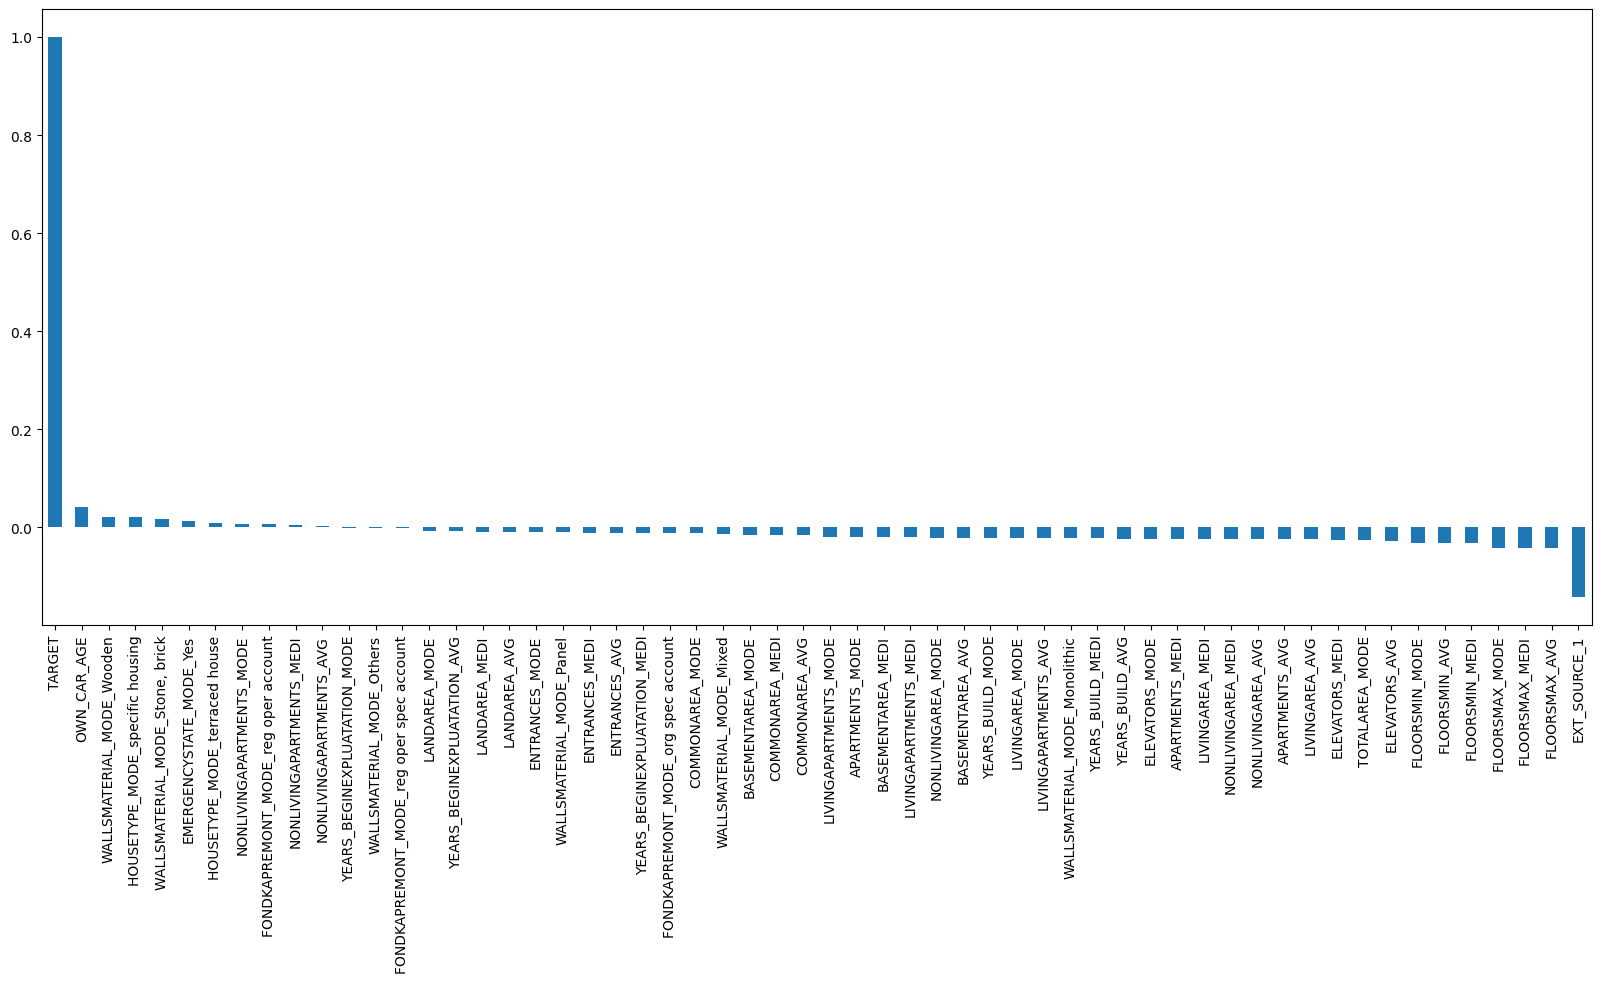

In [23]:
plt.figure(figsize=(20,8))
check_application_data_dummies.corr()['TARGET'].sort_values(ascending = False).plot(kind='bar')

From the correlation plot above, it is clear that all **columns with more than 40% missing values** are very likely to be **not correlated** to the **target variable**. Therefore, we can safely **drop the columns** for further analysis.

In [24]:
clean_application = application_data.copy()
clean_application.drop(columns = filtered_missing['index'].values.tolist(), axis=1, inplace=True)

We now check on the columns with 10% ~ 40% missing values.

In [25]:
filtered_missing = missing[(missing[0] > 10) & (missing[0] < 40)].sort_values(by=[0], ascending=False)

for row in filtered_missing.values:
    print(format(round(row[1], 2), ".2f") + "% " + row[0])
    print(columns_description[columns_description['Row']==row[0]]['Description'].values[0], end = '\n\n')

31.35% OCCUPATION_TYPE
What kind of occupation does the client have

19.83% EXT_SOURCE_3
Normalized score from external data source

13.50% AMT_REQ_CREDIT_BUREAU_HOUR
Number of enquiries to Credit Bureau about the client one hour before application

13.50% AMT_REQ_CREDIT_BUREAU_DAY
Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

13.50% AMT_REQ_CREDIT_BUREAU_WEEK
Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

13.50% AMT_REQ_CREDIT_BUREAU_MON
Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

13.50% AMT_REQ_CREDIT_BUREAU_QRT
Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

13.50% AMT_REQ_CREDIT_BUREAU_YEAR
Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months 

1. OCCUPATION_TYPE

As before, we cannot directly drop those columns without confirming that they are irrelevant. In fact, the client's occupation seems to be a key factor to the likelihood of loan repayment.

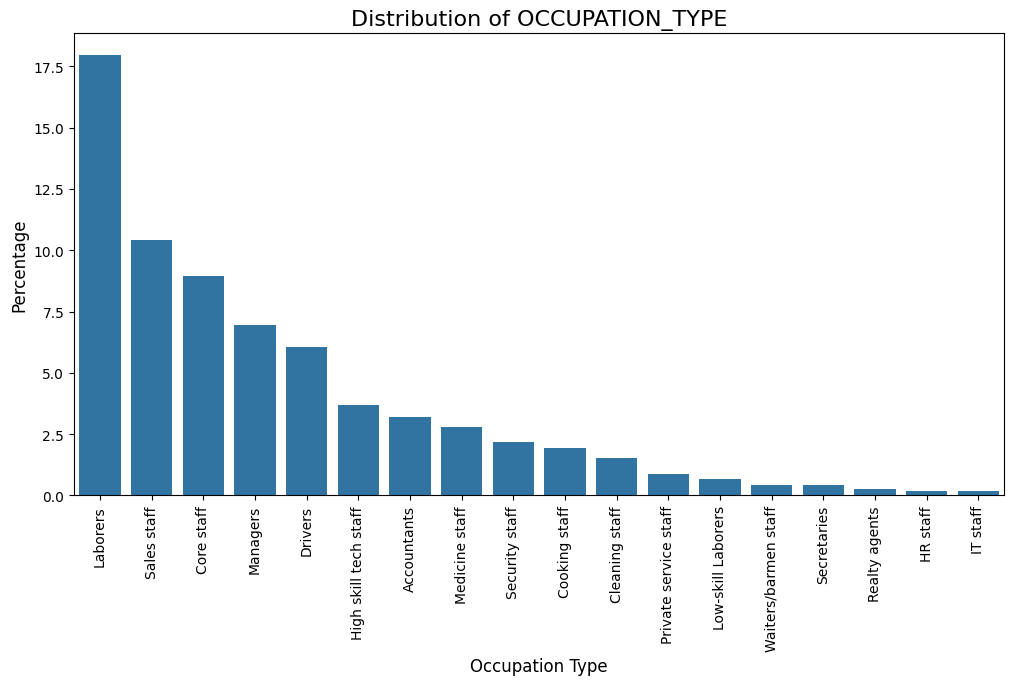

In [26]:
occupation_counts = clean_application['OCCUPATION_TYPE'].value_counts()

# Plot the distribution as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_counts.index, y=100*occupation_counts.values/len(clean_application))

# Set labels and title
plt.title('Distribution of OCCUPATION_TYPE', fontsize=16)
plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.xticks(rotation=90)
plt.show()

It is not a good choice to replace the missing values (31.35%) with the mode (Laborers, around 17.5%). Firstly, the percentage difference is too big. Also, clients with missing occupation values might due to the fact that they are indeed unemployed, or they refuse to disclose their employment status. Therefore, we should label the missing values as 'Unknown' for future reference.

In [27]:
# Replace missing values on occupation with the mode
clean_application['OCCUPATION_TYPE'] = clean_application['OCCUPATION_TYPE'].fillna("Unknown")

2. EXT_SOURCE_3

It is unclear if EXT_SOURCE_3 is relevant to the target variable.

<Axes: xlabel='count', ylabel='Count'>

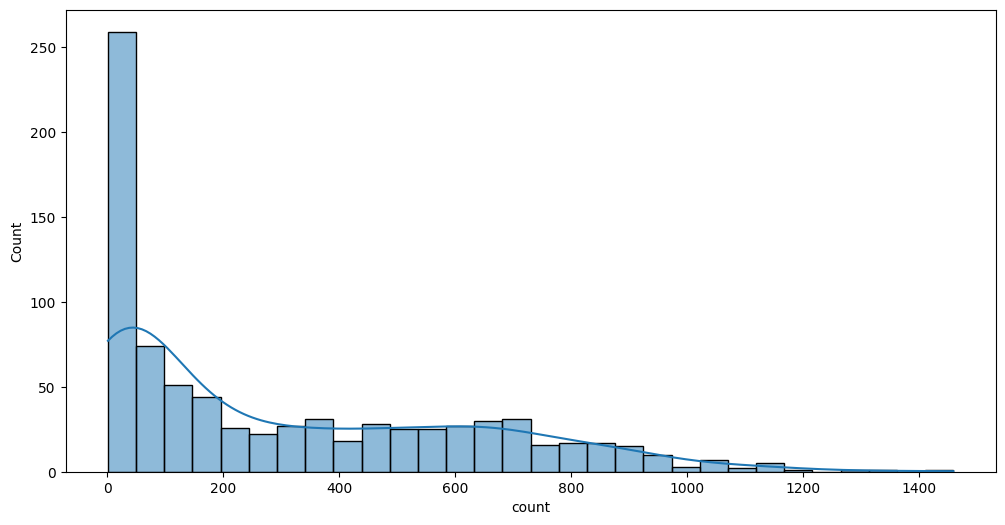

In [28]:
Data = clean_application['EXT_SOURCE_3'].dropna().value_counts()

# Plot the distribution as a bar plot
plt.figure(figsize=(12, 6))
sns.histplot(Data, bins=30, kde=True)

The variable 'EXT_SOURCE_3' is very concentrated at small values, making it inapproprate to replace missing values with its mean or median. We can use a **Forward Filling Imputation** to replace missing values so that it would not disrupt the original distribution.

In [29]:
clean_application['EXT_SOURCE_3'] = clean_application['EXT_SOURCE_3'].ffill()

3. AMT_REQ_CREDIT_BUREAU (With timeframe HOUR, DAY, WEEK, MON, QTR, YEAR)

In [30]:
AMT_REQ = ['AMT_REQ_CREDIT_BUREAU_HOUR', 
           'AMT_REQ_CREDIT_BUREAU_DAY', 
           'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 
           'AMT_REQ_CREDIT_BUREAU_QRT', 
           'AMT_REQ_CREDIT_BUREAU_YEAR']

In [31]:
for i in AMT_REQ:
    print(clean_application[i].dropna().value_counts())

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.

Since the majority of the values are 0 (no inquiries), we replace the missing values (each 13.5%) with the modes (all 0s).

In [32]:
clean_application[AMT_REQ] = clean_application[AMT_REQ].fillna(0)

Now we are left with columns of less than 10% missing values. In fact, there all have less than 1% missing values:

In [33]:
filtered_missing = missing[(missing[0] > 0) & (missing[0] < 10)].sort_values(by=[0], ascending=False)

for row in filtered_missing.values:
    print("\n" + format(round(row[1], 2), ".2f") + "% " + row[0])
    explain(row[0])


0.42% NAME_TYPE_SUITE
Who was accompanying client when he was applying for the loan

0.33% OBS_30_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 30 DPD (days past due) default

0.33% DEF_60_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings defaulted on 60 (days past due) DPD

0.33% DEF_30_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

0.33% OBS_60_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 60 DPD (days past due) default

0.21% EXT_SOURCE_2
Normalized score from external data source

0.09% AMT_GOODS_PRICE
For consumer loans it is the price of the goods for which the loan is given

0.00% AMT_ANNUITY
Loan annuity

0.00% CNT_FAM_MEMBERS
How many family members does client have

0.00% DAYS_LAST_PHONE_CHANGE
How many days before application did client change phone


We can safely remove rows that contains a null value. 

In [34]:
clean_application = clean_application.dropna(axis = 0)

In [35]:
len(clean_application)/len(application_data)*100

99.03092897489846

Only less than 1% of the original data was deleted. We can proceed to further analysis.

## 2) previous_application.csv

In [36]:
previous_application.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest            365243.0        -1457.0   
1670212             Cash X-Sell: low            365243.0        -1155.0   
1670213          Cash X-Sell: middle            365243.0        -1163.0   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
1670209                     362.0         -358.0           -351.0   
1670210                   -1274.0        -1304.0          -1297.0   
1670211                   -1187.0        -1187.0          -1181.0   
1670212                    -825.0         -825.0           -817.0   
1670213                     247.0         -443.0           -423.0   

        NFLAG_INSURED_ON_APPROVAL  
1670209                       0.0  
1670210                       0.0  
1670211                       0.0  
1670212                       1.0  
1670213                       0.0  

[5 rows x 37 columns]

In [37]:
previous_application.shape

(1670214, 37)

In [38]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [39]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [40]:
# Columns with null value counts
column_counts = previous_application.isnull().sum()
contains_null = column_counts[column_counts != 0].sort_values(ascending=False)
with pd.option_context('display.max_rows', None):
    print(contains_null)

RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
DAYS_LAST_DUE                 673065
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
DAYS_LAST_DUE_1ST_VERSION     673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
dtype: int64


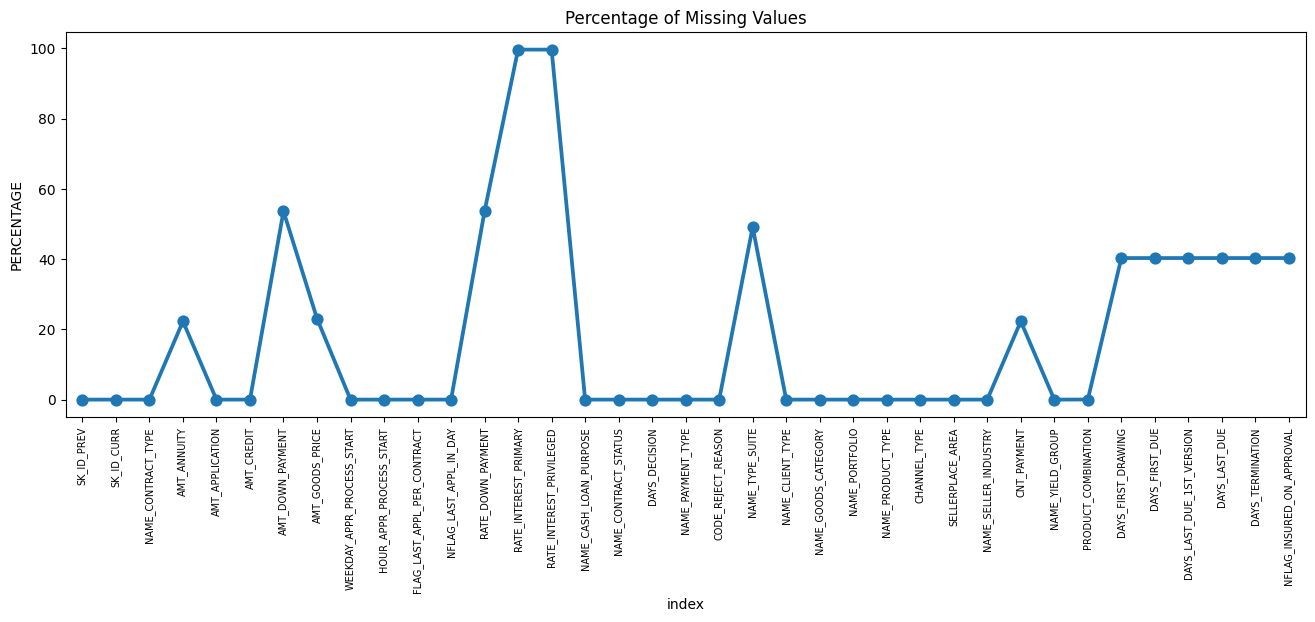

In [41]:
missing = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

Columns 'RATE_INTEREST_PRIVILEGED' and 'RATE_INTEREST_PRIMARY' are mainly null. There are also a few columns with 20% ~ 60% missing values. We should delve into them.

In [42]:
filtered_missing = missing[missing[0]>60]
for row in filtered_missing.values:
    print("\n" + format(round(row[1], 2), ".2f") + "% " + row[0])
    explain(row[0])


99.64% RATE_INTEREST_PRIMARY
Interest rate normalized on previous credit

99.64% RATE_INTEREST_PRIVILEGED
Interest rate normalized on previous credit


These columns are 99.64% null. So we will delete both of them.

In [43]:
clean_previous_application = previous_application.copy()
clean_previous_application.drop(columns = filtered_missing['index'].values.tolist(), axis=1, inplace=True)

In [44]:
filtered_missing = missing[(missing[0] > 20) & (missing[0] < 60)].sort_values(by=[0], ascending=False)

for row in filtered_missing.values:
    print(format(round(row[1], 2), ".2f") + "% " + row[0])
    print(columns_description[columns_description['Row']==row[0]]['Description'].values[0], end = '\n\n')

53.64% AMT_DOWN_PAYMENT
Down payment on the previous application

53.64% RATE_DOWN_PAYMENT
Down payment rate normalized on previous credit

49.12% NAME_TYPE_SUITE
Who was accompanying client when he was applying for the loan

40.30% DAYS_FIRST_DRAWING
Relative to application date of current application when was the first disbursement of the previous application

40.30% DAYS_TERMINATION
Relative to application date of current application when was the expected termination of the previous application

40.30% DAYS_LAST_DUE
Relative to application date of current application when was the last due date of the previous application

40.30% DAYS_FIRST_DUE
Relative to application date of current application when was the first due supposed to be of the previous application

40.30% DAYS_LAST_DUE_1ST_VERSION
Relative to application date of current application when was the first due of the previous application

40.30% NFLAG_INSURED_ON_APPROVAL
Did the client requested insurance during the previous a

There are possible reasons for high missing values of the following columns:
- **AMT_DOWN_PAYMENT, RATE_DOWN_PAYMENT**: Clients may not have provided a down payment, particularly for loans that don't require one.
- **NAME_TYPE_SUITE**: Clients may prefer not to disclose information, or it is optional to be filled in. ('Unaccompanied' was included)
- **NFLAG_INSURED_ON_APPROVAL**: Clients may prefer not to disclose information, or it is optional to be filled in.
- **AMT_GOODS_PRICE**: Only applies to consumer loans for goods; non-consumer loans (e.g., personal loans) wouldn’t have this value.

We can label the missing values for each column as a special class for future reference

In [45]:
clean_previous_application['AMT_DOWN_PAYMENT'] = clean_previous_application['AMT_DOWN_PAYMENT'].fillna(-1)
clean_previous_application['RATE_DOWN_PAYMENT'] = clean_previous_application['RATE_DOWN_PAYMENT'].fillna(-1)
clean_previous_application['NAME_TYPE_SUITE'] = clean_previous_application['NAME_TYPE_SUITE'].fillna("Unknown")
clean_previous_application['NFLAG_INSURED_ON_APPROVAL'] = clean_previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(-1)
clean_previous_application['AMT_GOODS_PRICE'] = clean_previous_application['AMT_GOODS_PRICE'].fillna(-1)

Relative days to application date of current application

In [46]:
days_relative = ['DAYS_FIRST_DRAWING',
                 'DAYS_TERMINATION',
                 'DAYS_LAST_DUE',
                 'DAYS_FIRST_DUE',
                 'DAYS_LAST_DUE_1ST_VERSION']

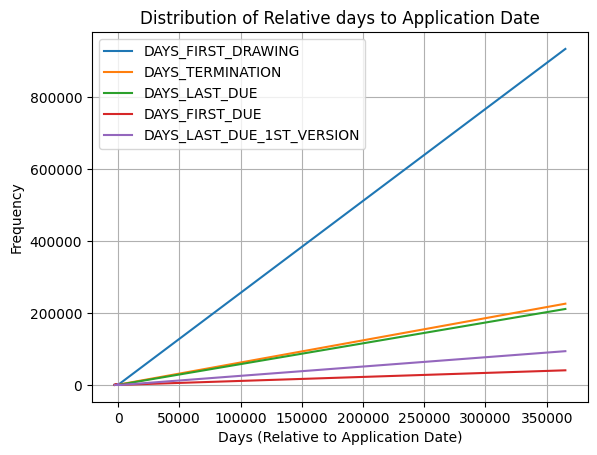

In [47]:
for day in days_relative:
    clean_previous_application[day].dropna().value_counts().sort_index(ascending=True).plot(label=day)

# Customizing the plot
plt.title('Distribution of Relative days to Application Date')
plt.xlabel('Days (Relative to Application Date)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

Since the count of columns behave linearly, we should replace the null values using **Forward Filling Imputation** so that it would not disrupt the original distribution. Note that I do not prefer replacing with the means/medians because of the high percentage of missing values (40%) and it would completely alter the distribution.

In [48]:
for day in days_relative:
    clean_previous_application[day] = clean_previous_application[day].ffill()

AMT_ANNUITY

<Axes: >

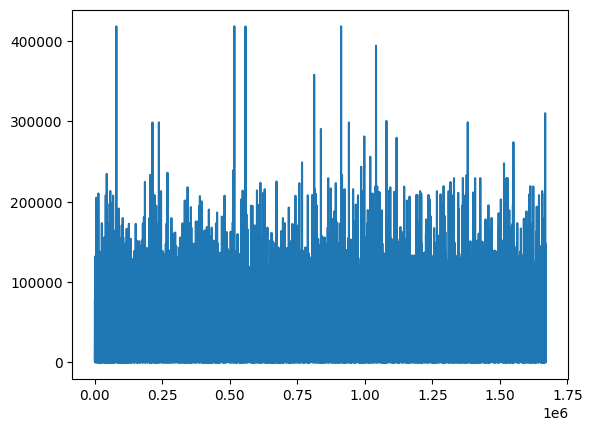

In [49]:
clean_previous_application['AMT_ANNUITY'].dropna().sort_index(ascending=True).plot()

We replace the missing values with its mean since it is almost uniformly distributed.

In [50]:
mean = clean_previous_application['AMT_ANNUITY'].mean()
clean_previous_application['AMT_ANNUITY'] = clean_previous_application['AMT_ANNUITY'].fillna(mean)

CNT_PAYMENT

<Axes: >

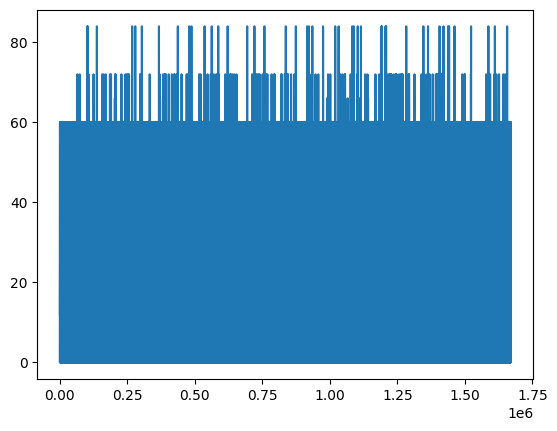

In [51]:
clean_previous_application['CNT_PAYMENT'].dropna().sort_index(ascending=True).plot()

Similarly, we replace the missing values with its mean since it is almost uniformly distributed.

In [52]:
mean = clean_previous_application['CNT_PAYMENT'].mean()
clean_previous_application['CNT_PAYMENT'] = clean_previous_application['CNT_PAYMENT'].fillna(mean)

Now we are left with columns of less than 20% missing values. In fact, there all have less than 1% missing values:

In [53]:
filtered_missing = missing[(missing[0] > 0) & (missing[0] < 20)].sort_values(by=[0], ascending=False)

for row in filtered_missing.values:
    print("\n" + format(round(row[1], 2), ".2f") + "% " + row[0])
    explain(row[0])


0.02% PRODUCT_COMBINATION
Detailed product combination of the previous application

0.00% AMT_CREDIT
Credit amount of the loan


We can safely remove rows that contain a null value.

In [54]:
clean_previous_application = clean_previous_application.dropna(axis = 0)

In [55]:
len(clean_previous_application)/len(previous_application)*100

99.97922421917191

Nice! Only around 0.02% of the original data was deleted. We can now proceed with data preparation

# Data Preparation

## 1) application_data.csv

In [56]:
prepared_application = clean_application.copy()

In [57]:
prepared_application.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'D

In [58]:
prepared_application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13  NAME

### Finding Outliers

In [59]:
def anomalies(df, column_name):
    # Calculate mean and standard deviation
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Define the threshold for outliers (4 standard deviations from the mean)
    lower_bound = mean - 4 * std_dev
    upper_bound = mean + 4 * std_dev

    # select outliers from the DataFrame
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return len(outliers)/len(df)*100
    

In [60]:
def remove_outliers_row(df, column_name):
    # Calculate mean and standard deviation
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Define the threshold for outliers (4 standard deviations from the mean)
    lower_bound = mean - 4 * std_dev
    upper_bound = mean + 4 * std_dev

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_cleaned
    

In [61]:
# Check through all columns with type 'float64' if any of them has more than 1% outliers (more than 4*sd from mean) 
numeric_columns = prepared_application.select_dtypes(include='float64').columns.values
haveoutlier = False
for col in numeric_columns:
    percent = anomalies(prepared_application, col)
    if percent > 1:
        print(col, percent)
        prepared_application = remove_outliers_row(prepared_application, col)
        explain(col)
        haveoutlier = True
        
if not(haveoutlier):
    print("No column with many outliers")

DEF_30_CNT_SOCIAL_CIRCLE 2.230971559545662
How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
AMT_REQ_CREDIT_BUREAU_WEEK 2.792397317095289
Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
AMT_REQ_CREDIT_BUREAU_MON 1.0534753630499303
Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)


We notice that there are also 3 rows with CODE_GENDER = XNA, so we will remove those rows.

In [62]:
prepared_application['CODE_GENDER'].value_counts()

CODE_GENDER
F      188227
M       98144
XNA         3
Name: count, dtype: int64

In [63]:
prepared_application = prepared_application[prepared_application['CODE_GENDER'] != 'XNA']

### Feature scaling

For columns with numerical values, especially those with large variation in range, feature scaling may be beneficial. 

- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_GOODS_PRICE
- AMT_ANNUITY

In [64]:
need_scaling = ['AMT_INCOME_TOTAL',
                'AMT_CREDIT',
                'AMT_GOODS_PRICE',
                'AMT_ANNUITY']

We use **standard scaler** for feature scaling. This ensures that for each feature, the **mean is zero** and the **standard deviation is 1**, bringing all feature to the same magnitude. It helps to scale down features based on the **standard normal distribution**.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = StandardScaler()
prepared_application[need_scaling] = scaler.fit_transform(prepared_application[need_scaling])
print(prepared_application[need_scaling].describe())

       AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE   AMT_ANNUITY
count      2.863710e+05  2.863710e+05     2.863710e+05  2.863710e+05
mean      -1.568116e-17 -1.097681e-16     1.771574e-17  1.305109e-16
std        1.000002e+00  1.000002e+00     1.000002e+00  1.000002e+00
min       -5.856622e-01 -1.377411e+00    -1.335674e+00 -1.733838e+00
25%       -2.291414e-01 -8.178515e-01    -8.112270e-01 -7.285996e-01
50%       -9.983340e-02 -2.091068e-01    -2.379946e-01 -1.505409e-01
75%        1.403101e-01  5.217337e-01     3.840235e-01  5.163067e-01
max        4.795961e+02  8.582746e+00     9.519152e+00  1.593048e+01


### Feature binning

Binning is useful to transform continuous numerical values into discrete categories. Instead of dealing with the exact numbers, we bin them into ranges.

- CNT_CHILDREN: 0, 1, 2, 3, Above 4

- DAYS_BIRTH (Change to AGE_GROUP): 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-100

- DAYS_EMPLOYED (Change to EMPLOYMENT_DURATION): Unemployed, 0-1 years, 1-5 years, 5-10 years, 10-20 years, 20-30 years, 30-40 years, 40-50 years

- DAYS_REGISTRATION (Change to YEARS_REGISTRATION): 0-1 year, 1-5 years, 5-10 years, 10-20 years, 20-30 years, 30-50 years, 50+ years

- DAYS_ID_PUBLISH (Change to YEARS_ID_PUBLISH): Round off to nearest integer year

**1. CNT_CHILDREN**

In [67]:
prepared_application['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     200415
1      56952
2      24996
3       3484
4        407
5         80
6         20
7          6
14         3
8          2
9          2
19         2
11         1
10         1
Name: count, dtype: int64

In [68]:
labels = ['0', '1', '2', '3', 'Above 4']
bins = [-1, 0, 1, 2, 3, float('inf')]

prepared_application['CNT_CHILDREN'] = pd.cut(prepared_application['CNT_CHILDREN'], bins, labels = labels, include_lowest=True)

**2. DAYS_BIRTH**

In [69]:
prepared_application['DAYS_BIRTH'].describe()

count    286371.000000
mean     -16031.083315
std        4365.519608
min      -25229.000000
25%      -19672.000000
50%      -15742.000000
75%      -12408.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [70]:
prepared_application['AGE_YEARS'] = prepared_application['DAYS_BIRTH'] / -365.25

labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100']
bins = [20, 30, 40, 50, 60, 70, 80, 100]  # Age ranges

prepared_application['AGE_GROUP'] = pd.cut(prepared_application['AGE_YEARS'], bins=bins, labels=labels, right=False)

In [71]:
prepared_application['AGE_GROUP'].value_counts()

AGE_GROUP
30-40     76645
40-50     71404
50-60     63213
20-30     42245
60-70     32864
70-80         0
80-100        0
Name: count, dtype: int64

**3. DAYS_EMPLOYED**

In [72]:
prepared_application['DAYS_EMPLOYED'].describe()

count    286371.000000
mean      63848.755192
std      141299.571022
min      -17912.000000
25%       -2754.000000
50%       -1209.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [73]:
prepared_application['YEARS_EMPLOYED'] = prepared_application['DAYS_EMPLOYED'] / -365.25

labels = ['Unemployed', '0-1 years', '1-5 years', '5-10 years', '10-20 years', '20-30 years', '30-40 years', '40-50 years']
bins = [-np.inf, 0, 1, 5, 10, 20, 30, 40, 50]  # Bins for employment duration

prepared_application['EMPLOYMENT_DURATION'] = pd.cut(prepared_application['YEARS_EMPLOYED'], bins=bins, labels=labels)

In [74]:
prepared_application['EMPLOYMENT_DURATION'].value_counts()

EMPLOYMENT_DURATION
1-5 years      101102
5-10 years      60278
Unemployed      51593
10-20 years     35643
0-1 years       26123
20-30 years      8861
30-40 years      2550
40-50 years       221
Name: count, dtype: int64

**4. DAYS_REGISTRATION**

In [75]:
prepared_application['DAYS_REGISTRATION'].describe()

count    286371.000000
mean      -4982.231790
std        3520.719933
min      -24672.000000
25%       -7473.000000
50%       -4500.000000
75%       -2008.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [76]:
prepared_application['YEARS_REGISTRATION'] = prepared_application['DAYS_REGISTRATION'] / -365.25

labels = ['0-1 year', '1-5 years', '5-10 years', '10-20 years', '20-30 years', '30-50 years', '50+ years']
bins = [0, 1, 5, 10, 20, 30, 50, np.inf]  # Age ranges

# Create employment bins
prepared_application['YEARS_REGISTRATION'] = pd.cut(prepared_application['YEARS_REGISTRATION'], bins=bins, labels=labels)

In [77]:
prepared_application['YEARS_REGISTRATION'].value_counts()

YEARS_REGISTRATION
10-20 years    93852
20-30 years    57208
1-5 years      51049
5-10 years     50926
30-50 years    17564
0-1 year       15626
50+ years         73
Name: count, dtype: int64

**5. DAYS_ID_PUBLISH**

In [78]:
prepared_application['DAYS_ID_PUBLISH'].describe()

count    286371.000000
mean      -2991.487815
std        1510.358919
min       -7197.000000
25%       -4298.000000
50%       -3249.000000
75%       -1715.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [79]:
# We only round them to the nearest integer year instead of creating binnings since most of them are concentrated between 10 to 20 years.
prepared_application['YEARS_ID_PUBLISH'] = round(prepared_application['DAYS_ID_PUBLISH'] / -365.25)

In [80]:
prepared_application['YEARS_ID_PUBLISH'].value_counts()

YEARS_ID_PUBLISH
12.0    39480
11.0    33837
13.0    28158
7.0     18102
9.0     17696
8.0     17308
6.0     16361
3.0     16299
5.0     16020
10.0    15771
2.0     15428
4.0     15418
1.0     14124
14.0    10770
0.0      7365
15.0     2766
16.0     1145
17.0      321
20.0        1
18.0        1
Name: count, dtype: int64

In [81]:
# Remove the columns that have new representations
prepared_application.drop(columns = ['DAYS_BIRTH',
                                     'DAYS_EMPLOYED',
                                     'DAYS_REGISTRATION',
                                     'DAYS_ID_PUBLISH']
                          , axis=1, inplace=True)

## 3) previous_application.csv

In [82]:
prepared_previous_application = clean_previous_application.copy()

In [83]:
prepared_previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

We import the target variable column from the 'application_data' dataset by matching the 'SK_CURRENT' column values. We also do that for 'CODE_GENDER' column

In [84]:
prepared_previous_application = pd.merge(prepared_previous_application, prepared_application[['SK_ID_CURR', 'TARGET', 'CODE_GENDER']], on='SK_ID_CURR', how='left')

# Check the merged dataset
prepared_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0              -1.0         607500.0                   THURSDAY   
2    136444.5              -1.0         112500.0                    TUESDAY   
3    470790.0              -1.0         450000.0                     MONDAY   
4    404055.0              -1.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0                       15  ...           middle  POS mobile with interest   
1                       11  ...       low_action          Cash X-Sell: low   
2                       11  ...             high         Cash X-Sell: high   
3                        7  ...           middle       Cash X-Sell: middle   
4                        9  ...             high         Cash Street: high   

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0            365243.0          -42.0                     300.0          -42.0   
1            365243.0         -134.0                     916.0       365243.0   
2            365243.0         -271.0                      59.0       365243.0   
3            365243.0         -482.0                    -152.0         -182.0   
4            365243.0         -482.0                    -152.0         -182.0   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL TARGET CODE_GENDER  
0            -37.0                       0.0    0.0           F  
1         365243.0                       1.0    0.0           F  
2         365243.0                       1.0    0.0           F  
3           -177.0                       1.0    0.0           M  
4           -177.0                      -1.0    NaN         NaN  

[5 rows x 37 columns]

In [85]:
print("percentage of null target = " + str(prepared_previous_application['TARGET'].isnull().sum()/len(prepared_previous_application)*100) + "%")

percentage of null target = 21.561836960668124%


Notice that we will have some null values after merging because some clients might be new and do not have previous application record. 

In [86]:
id_current = prepared_application['SK_ID_CURR'].values
id_previous = prepared_previous_application['SK_ID_CURR'].values
len(set(id_current).intersection(set(id_previous)))

271276

In fact, there are only 271276 unique overlapping SK_CURRENT values between those two databases. And notice that the relationship between the databases on the SK_CURRENT is one-to-many, as depicted below: 

In [87]:
prepared_application[prepared_application['SK_ID_CURR'] == 456255]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307510               N            0         -0.044416    0.189355   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_WEEK  \
307510      1.51813  ...                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
307510                       2.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  AGE_YEARS AGE_GROUP  YEARS_EMPLOYED  \
307510                        1.0  46.149213     40-50        3.455168   

        EMPLOYMENT_DURATION  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
307510            1-5 years         10-20 years               1.0  

[1 rows x 75 columns]

In [88]:
prepared_previous_application[prepared_previous_application['SK_ID_CURR'] == 456255]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
214700      1743609      456255     Consumer loans    11090.835   
453137      1359084      456255     Consumer loans    11314.170   
596504      1179690      456255         Cash loans    28873.170   
608390      2073384      456255         Cash loans    16400.610   
729292      1708056      456255    Revolving loans     2250.000   
814485      1296007      456255         Cash loans    30737.655   
1383267     2631384      456255         Cash loans    54022.140   
1411301     2729207      456255     Consumer loans    11514.555   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
214700          102037.5    112815.0               0.0         102037.5   
453137           82404.0     93298.5            9000.0          82404.0   
596504          450000.0    491580.0              -1.0         450000.0   
608390          229500.0    254340.0              -1.0         229500.0   
729292           45000.0     45000.0              -1.0          45000.0   
814485          765000.0   1067940.0              -1.0         765000.0   
1383267        1170000.0   1271929.5              -1.0        1170000.0   
1411301          58225.5     58545.0            5823.0          58225.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
214700                    THURSDAY                       18  ...   
453137                      SUNDAY                       14  ...   
596504                     TUESDAY                       13  ...   
608390                    THURSDAY                       12  ...   
729292                      SUNDAY                       14  ...   
814485                      FRIDAY                       14  ...   
1383267                     FRIDAY                       14  ...   
1411301                     FRIDAY                       18  ...   

        NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
214700            middle  POS industry with interest            365243.0   
453137              high    POS mobile with interest            365243.0   
596504            middle         Cash X-Sell: middle            365243.0   
608390            middle         Cash X-Sell: middle            365243.0   
729292               XNA                 Card Street            365243.0   
814485        low_normal            Cash Street: low            365243.0   
1383267       low_normal            Cash X-Sell: low            365243.0   
1411301             high    POS mobile with interest            365243.0   

        DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
214700          -960.0                    -630.0         -690.0   
453137          -425.0                     -95.0         -215.0   
596504          -662.0                      28.0         -212.0   
608390          -618.0                      72.0         -558.0   
729292         -2749.0                   -2419.0        -2449.0   
814485          -456.0                      54.0       365243.0   
1383267         -756.0                     294.0          -66.0   
1411301         -469.0                    -319.0         -409.0   

        DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL TARGET CODE_GENDER  
214700            -687.0                       0.0    0.0           F  
453137            -211.0                       0.0    0.0           F  
596504            -204.0                       1.0    0.0           F  
608390            -528.0                       1.0    0.0           F  
729292           -2442.0                      -1.0    0.0           F  
814485          365243.0                      -1.0    0.0           F  
1383267            -64.0                       0.0    0.0           F  
1411301           -400.0                       0.0    0.0           F  

[8 rows x 37 columns]

### Finding Outliers

In [89]:
# Check through all columns with type 'float64' if any of them has more than 1% outliers (more than 4*sd from mean) 
numeric_columns = prepared_previous_application.select_dtypes(include='float64').columns.values
haveoutlier = False
for col in numeric_columns:
    percent = anomalies(prepared_previous_application, col)
    if percent > 1:
        print(col, percent)
        prepared_previous_application = remove_outliers_row(prepared_previous_application, col)
        explain(col)
        haveoutlier = True
        
if not(haveoutlier):
    print("No column with many outliers")

AMT_APPLICATION 1.4610744448509971
For how much credit did client ask on the previous application
AMT_CREDIT 1.2774473417609205
Credit amount of the loan
DAYS_FIRST_DUE 4.570657496788141
Relative to application date of current application when was the first due supposed to be of the previous application


### Feature scaling

For columns with numerical values, especially those with large variation in range, feature scaling may be beneficial.

- AMT_ANNUITY
- AMT_APPLICATION
- AMT_CREDIT
- AMT_DOWN_PAYMENT
- AMT_GOODS_PRICE

In [90]:
need_scaling = ['AMT_ANNUITY',
                'AMT_APPLICATION',
                'AMT_CREDIT',
                'AMT_DOWN_PAYMENT',
                'AMT_GOODS_PRICE']

Similarly, We use **standard scaler** for feature scaling. Recall that it helps to scale down features based on the **standard normal distribution**.

In [91]:
scaler = StandardScaler()
prepared_previous_application[need_scaling] = scaler.fit_transform(prepared_previous_application[need_scaling])
print(prepared_previous_application[need_scaling].describe())

        AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  \
count  1.550201e+06     1.550201e+06  1.550201e+06      1.550201e+06   
mean  -1.228135e-15     3.598455e-16 -1.501022e-16     -1.112886e-17   
std    1.000000e+00     1.000000e+00  1.000000e+00      1.000000e+00   
min   -1.371809e+00    -7.153242e-01 -7.261594e-01     -2.793035e-01   
25%   -6.871538e-01    -6.186325e-01 -6.192442e-01     -2.793035e-01   
50%   -1.487062e-02    -3.681018e-01 -3.753005e-01     -2.793035e-01   
75%    9.522460e-02     1.614425e-01  1.394965e-01     -1.503219e-01   
max    2.712658e+01     6.076035e+00  4.688840e+00      7.925146e+01   

       AMT_GOODS_PRICE  
count     1.550201e+06  
mean      2.806051e-16  
std       1.000000e+00  
min      -7.153216e-01  
25%      -6.186187e-01  
50%      -3.681536e-01  
75%       1.617315e-01  
max       6.074880e+00  


### Feature binning

Similar to application_data.csv, we bin them into ranges instead of dealing with the exact numbers.

- CNT_PAYMENT
- DAYS_DECISION
- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION:

**1. CNT_PAYMENT**

In [92]:
bins = [0, 12, 24, np.inf]
labels = ['Short-term', 'Medium-term', 'Long-term']
prepared_previous_application['CNT_PAYMENT'] = pd.cut(prepared_previous_application['CNT_PAYMENT'], bins=bins, labels=labels)


In [93]:
prepared_previous_application['CNT_PAYMENT'].value_counts()

CNT_PAYMENT
Short-term     710476
Medium-term    575000
Long-term      155871
Name: count, dtype: int64

**2. DAYS_DECISION**

In [94]:
bins = [-np.inf, -1095, -365, np.inf]
labels = ['Last year', '1-3 years', 'Older']
prepared_previous_application['DAYS_DECISION'] = pd.cut(prepared_previous_application['DAYS_DECISION'], bins=bins, labels=labels)


In [95]:
prepared_previous_application['DAYS_DECISION'].value_counts()

DAYS_DECISION
1-3 years    553681
Older        508252
Last year    488268
Name: count, dtype: int64

**3. DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION**

In [96]:
need_binning = ['DAYS_FIRST_DRAWING',
                'DAYS_FIRST_DUE',
                'DAYS_LAST_DUE_1ST_VERSION',
                'DAYS_LAST_DUE',
                'DAYS_TERMINATION']

In [97]:
bins = [-np.inf, -1825, -365, np.inf]
labels = ['Last year', '1-5 years', 'More than 5 years']
for data in need_binning:
    prepared_previous_application[data] = pd.cut(prepared_previous_application[data], bins=bins, labels=labels)


We are done with the data preparation! Let's proceed with data analysis

# Data Analysis

## Univariate Analysis

### 1) application_data.csv

In [98]:
prepared_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N            0          0.417399    1.727528     0.592367   
2               Y            0         -0.413867   -1.153587    -1.404761   
3               Y            0         -0.136779   -0.711703     0.177605   
4               Y            0         -0.192196   -0.213527    -0.361958   
5               Y            0         -0.284559   -0.269494     0.027968   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   
5  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AGE_YEARS AGE_GROUP  \
1                       0.0                        0.0  45.900068     40-50   
2                       0.0                        0.0  52.145106     50-60   
3                       0.0                        0.0  52.032854     50-60   
4                       0.0                        0.0  54.570842     50-60   
5                       1.0                        1.0  46.381930     40-50   

   YEARS_EMPLOYED  EMPLOYMENT_DURATION  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
1        3.252567            1-5 years           1-5 years               1.0  
2        0.616016            0-1 years         10-20 years               7.0  
3        8.320329           5-10 years         20-30 years               7.0  
4        8.317591           5-10 years         10-20 years               9.0  
5        4.347707            1-5 years         10-20 years               1.0  

[5 rows x 75 columns]

In [99]:
prepared_application.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIA

We choose 10 possible predictors for the univariate analysis:

- CODE_GENDER: Gender of the client 
- NAME_CONTRACT_TYPE: Type of contract 
- FLAG_OWN_REALTY: Ownership of real estate
- OCCUPATION_TYPE: Client's occupation
- REGION_RATING_CLIENT: Region rating
- NAME_FAMILY_STATUS: Family status of the client
- NAME_EDUCATION_TYPE: Education level of the client
- NAME_HOUSING_TYPE: Housing situation of the client
- NAME_INCOME_TYPE: Income source 
- FLAG_PHONE: Does the client have a phone?


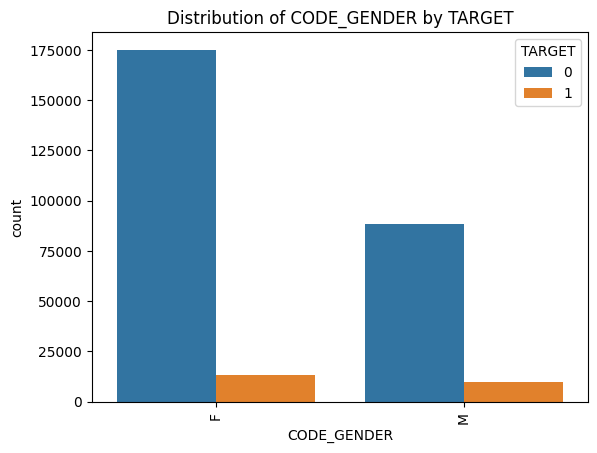

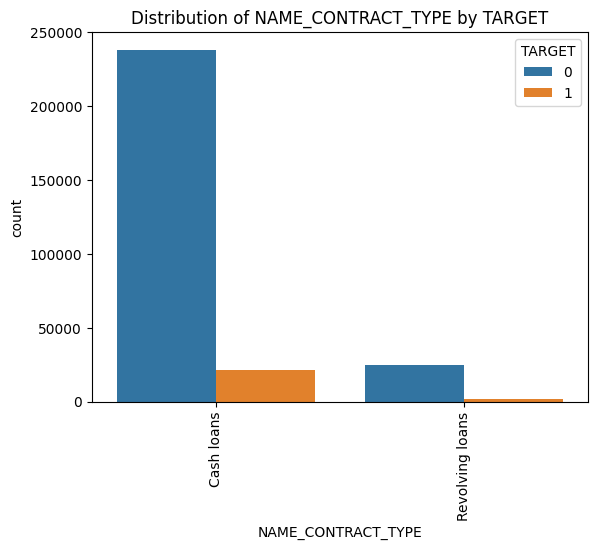

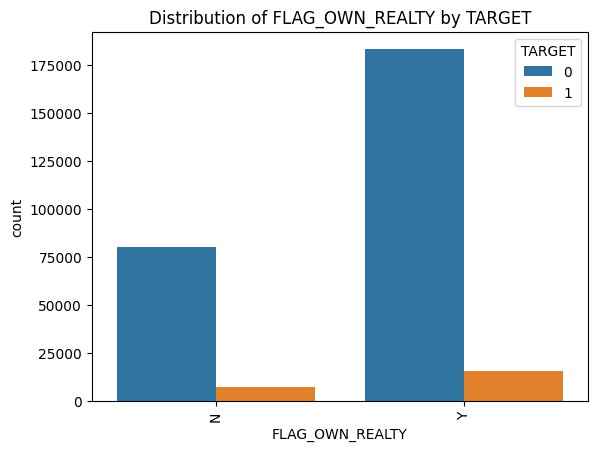

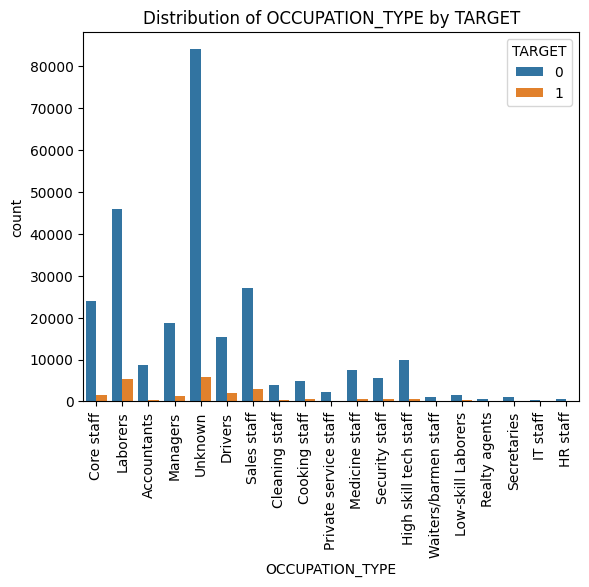

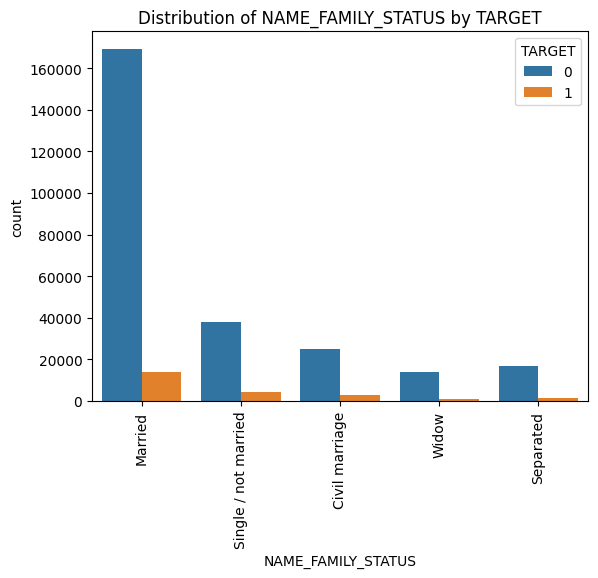

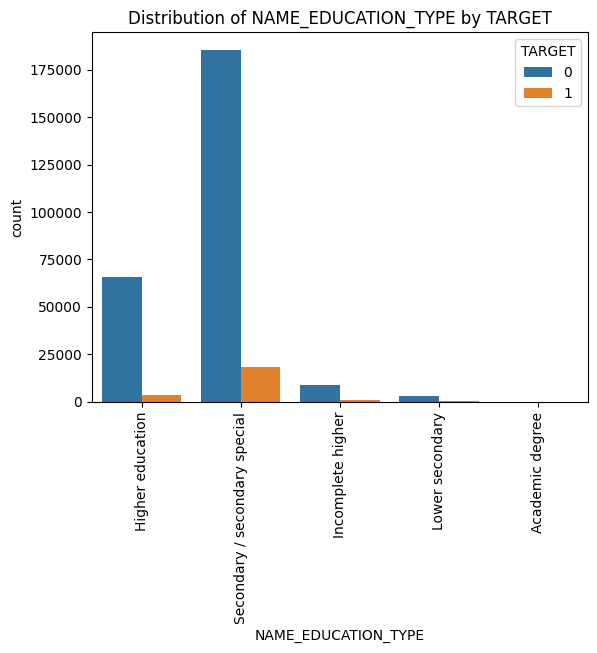

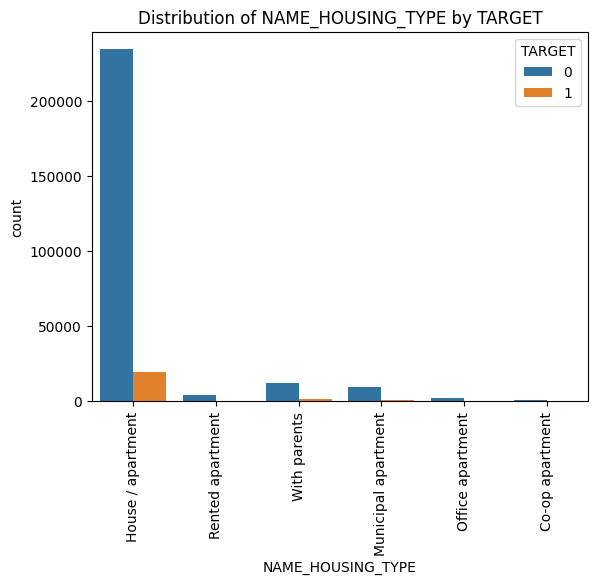

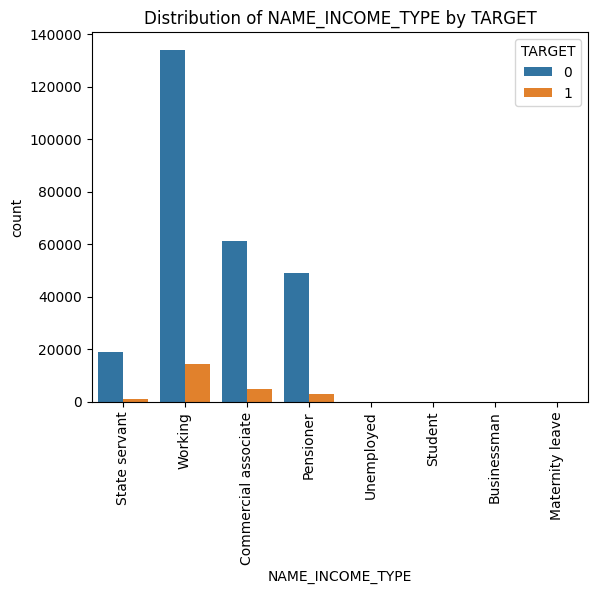

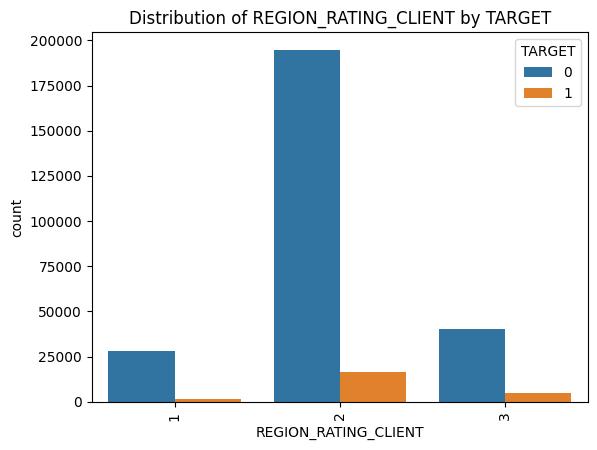

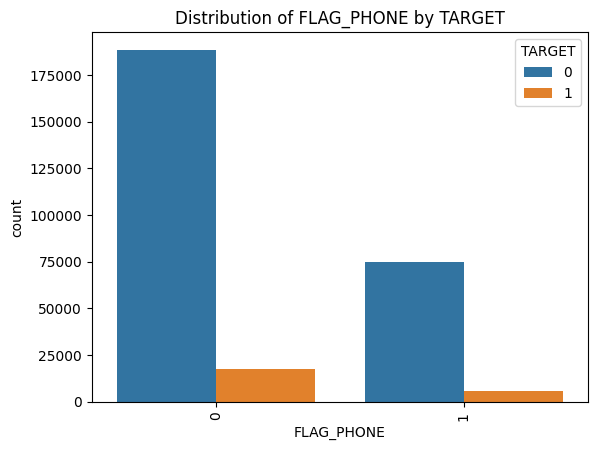

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_vars = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'OCCUPATION_TYPE', 
                    'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 
                    'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT', 'FLAG_PHONE']

# Loop through categorical variables and plot their distribution with the TARGET variable
for i, predictor in enumerate(categorical_vars):
    plt.figure(i)
    sns.countplot(data=prepared_application, x=predictor, hue='TARGET')
    plt.title(f'Distribution of {predictor} by TARGET')
    plt.xticks(rotation=90)
    plt.show()


Since we have highly imbalanced data, percentage plots can help better understand the distribution across the TARGET classes. We'll visualize categorical variables in terms of proportions.

<Figure size 800x600 with 0 Axes>

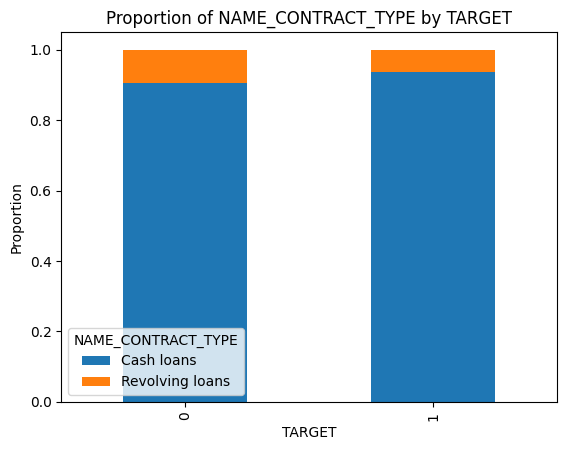

In [101]:
# Normalized count plot for NAME_CONTRACT_TYPE
plt.figure(figsize=(8, 6))
contract_counts = prepared_application.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts(normalize=True).unstack()
contract_counts.plot(kind='bar', stacked=True)
plt.title('Proportion of NAME_CONTRACT_TYPE by TARGET')
plt.ylabel('Proportion')
plt.show()


<Figure size 1000x800 with 0 Axes>

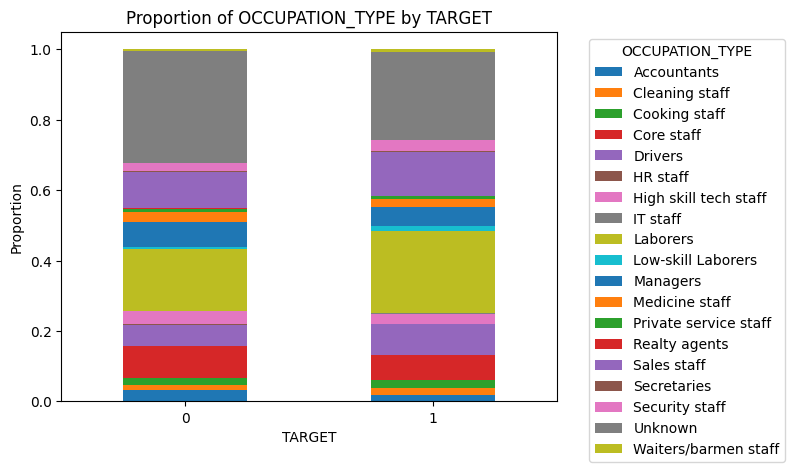

In [102]:
# Normalized count plot for OCCUPATION_TYPE
plt.figure(figsize=(10, 8))
occupation_counts = prepared_application.groupby('TARGET')['OCCUPATION_TYPE'].value_counts(normalize=True).unstack()
occupation_counts.plot(kind='bar', stacked=True)
plt.title('Proportion of OCCUPATION_TYPE by TARGET')
plt.legend(title='OCCUPATION_TYPE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


### 2) previous_application.csv

In [103]:
prepared_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    -1.212700        -0.628786   
1     2802425      108129         Cash loans     0.944221         2.351009   
2     2523466      122040         Cash loans     0.012988        -0.147485   
3     2819243      176158         Cash loans     2.953524         1.556033   
4     1784265      202054         Cash loans     1.563559         0.988194   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0   -0.647415         -0.279216        -0.628793                   SATURDAY   
1    2.395485         -0.279304         2.350491                   THURSDAY   
2   -0.099487         -0.279304        -0.147574                    TUESDAY   
3    1.436120         -0.279304         1.555652                     MONDAY   
4    1.129615         -0.279304         0.987910                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0                       15  ...           middle  POS mobile with interest   
1                       11  ...       low_action          Cash X-Sell: low   
2                       11  ...             high         Cash X-Sell: high   
3                        7  ...           middle       Cash X-Sell: middle   
4                        9  ...             high         Cash Street: high   

   DAYS_FIRST_DRAWING     DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  \
0   More than 5 years  More than 5 years         More than 5 years   
1   More than 5 years  More than 5 years         More than 5 years   
2   More than 5 years  More than 5 years         More than 5 years   
3   More than 5 years          1-5 years         More than 5 years   
4   More than 5 years          1-5 years         More than 5 years   

       DAYS_LAST_DUE   DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL TARGET  \
0  More than 5 years  More than 5 years                       0.0    0.0   
1  More than 5 years  More than 5 years                       1.0    0.0   
2  More than 5 years  More than 5 years                       1.0    0.0   
3  More than 5 years  More than 5 years                       1.0    0.0   
4  More than 5 years  More than 5 years                      -1.0    NaN   

  CODE_GENDER  
0           F  
1           F  
2           F  
3           M  
4         NaN  

[5 rows x 37 columns]

In [104]:
prepared_previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'TARGET', 'CODE_GENDER'], dtype=object)

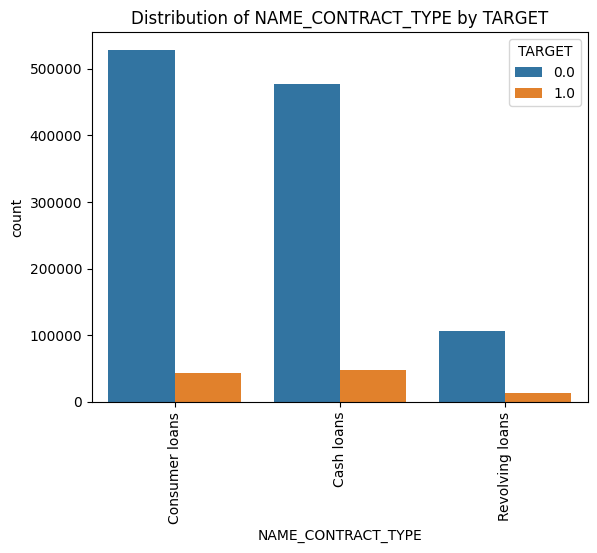

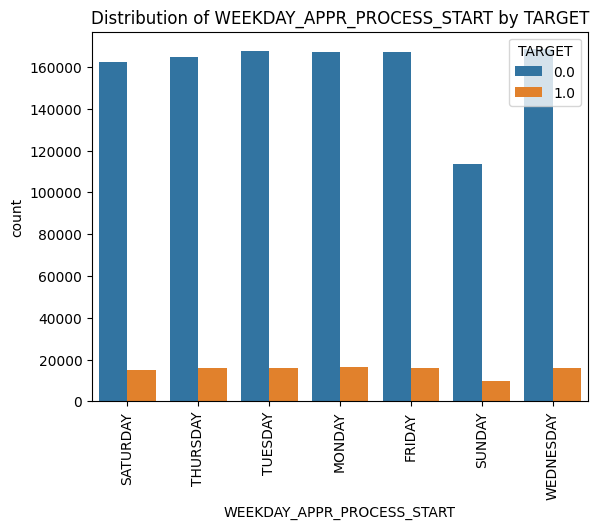

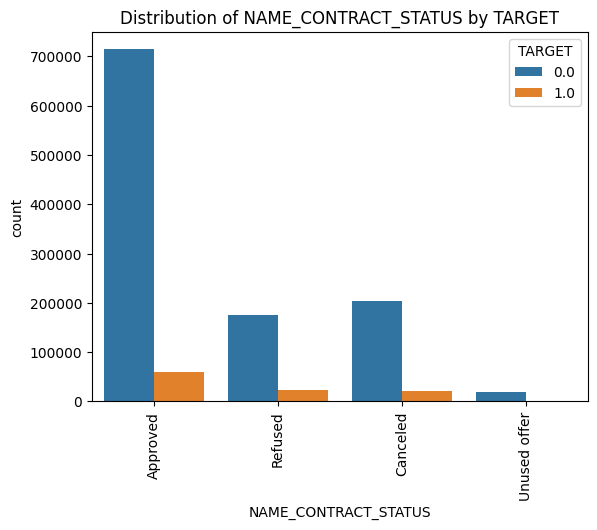

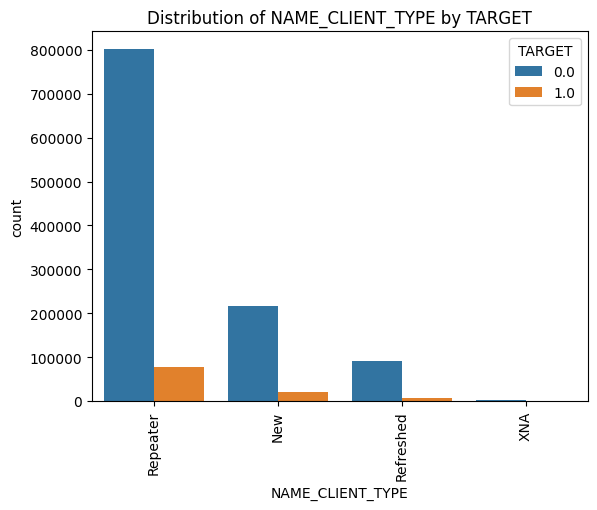

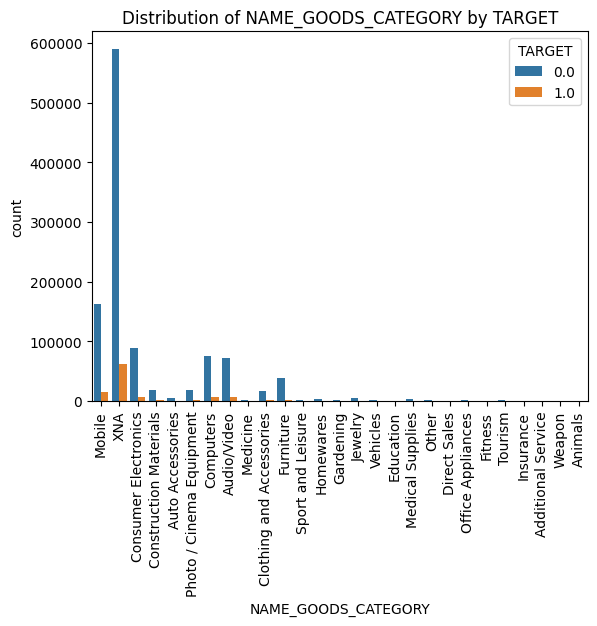

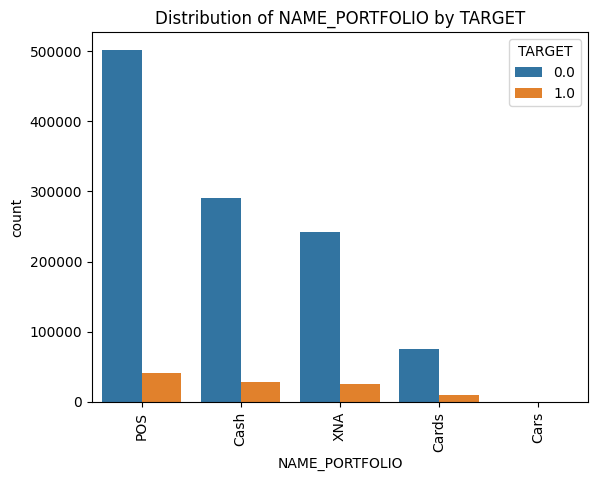

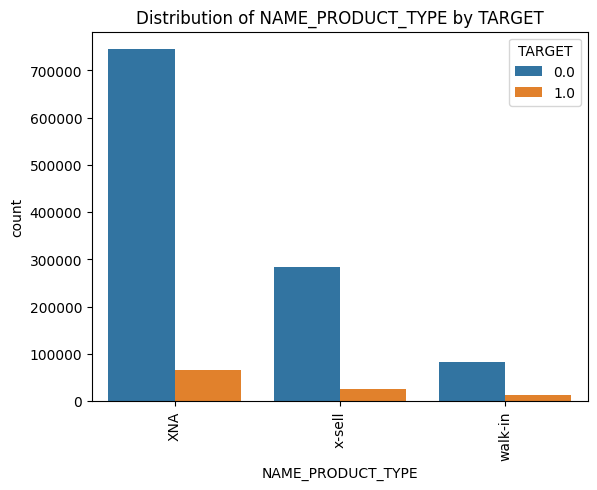

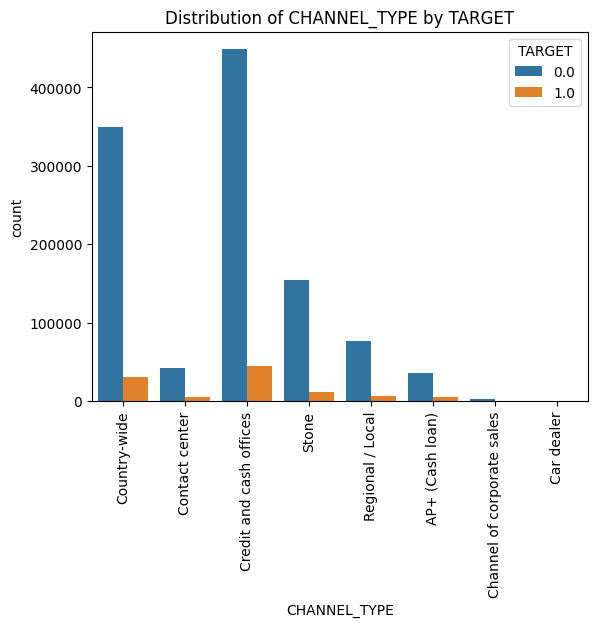

In [105]:
# List of categorical variables
categorical_vars_prev_app = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                             'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 
                             'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']

# Loop through categorical variables and plot their distribution with the TARGET variable
for i, predictor in enumerate(categorical_vars_prev_app):
    plt.figure(i)
    sns.countplot(data=prepared_previous_application, x=predictor, hue='TARGET')
    plt.title(f'Distribution of {predictor} by TARGET')
    plt.xticks(rotation=90)
    plt.show()


<Figure size 800x600 with 0 Axes>

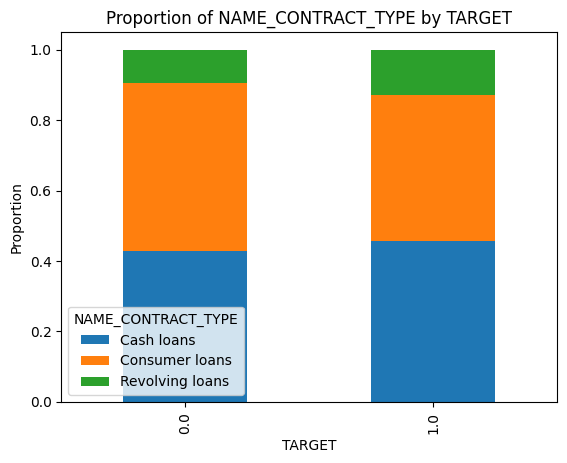

In [106]:
plt.figure(figsize=(8, 6))
contract_counts_prev_app = prepared_previous_application.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts(normalize=True).unstack()
contract_counts_prev_app.plot(kind='bar', stacked=True)
plt.title('Proportion of NAME_CONTRACT_TYPE by TARGET')
plt.ylabel('Proportion')
plt.show()


<Figure size 800x600 with 0 Axes>

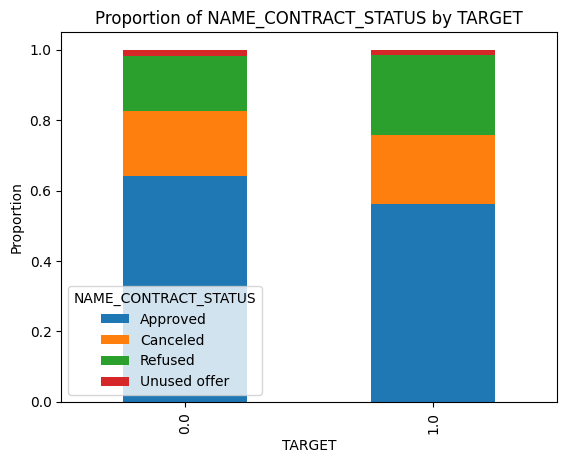

In [107]:
plt.figure(figsize=(8, 6))
contract_status_counts = prepared_previous_application.groupby('TARGET')['NAME_CONTRACT_STATUS'].value_counts(normalize=True).unstack()
contract_status_counts.plot(kind='bar', stacked=True)
plt.title('Proportion of NAME_CONTRACT_STATUS by TARGET')
plt.ylabel('Proportion')
plt.show()


## Numerical Analysis

### 1) application_data.csv

In [108]:
pd.crosstab(prepared_application.TARGET, prepared_application.CODE_GENDER)

CODE_GENDER       F      M
TARGET                    
0            175106  88211
1             13121   9933

In [109]:
pd.crosstab(prepared_application.TARGET, prepared_application.NAME_CONTRACT_TYPE)

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       238229            25088
1                        21600             1454

In [110]:
pd.crosstab(prepared_application.TARGET, prepared_application.NAME_INCOME_TYPE)

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 61319                3   
1                           0                  4967                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     48832          19056       17          11   134069  
1                      2749           1157        0           7    14172

In [111]:
prepared_application.AMT_INCOME_TOTAL.describe()

count    2.863710e+05
mean    -1.568116e-17
std      1.000002e+00
min     -5.856622e-01
25%     -2.291414e-01
50%     -9.983340e-02
75%      1.403101e-01
max      4.795961e+02
Name: AMT_INCOME_TOTAL, dtype: float64

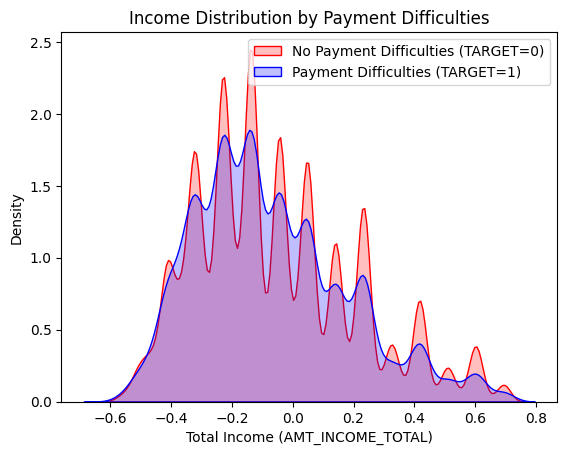

In [112]:
# KDE Plot for AMT_INCOME_TOTAL
# Filter the data to the 95th percentile
income_95th = prepared_application[prepared_application.AMT_INCOME_TOTAL <= prepared_application.AMT_INCOME_TOTAL.quantile(0.95)]

# KDE plot for truncated credit
income_plot = sns.kdeplot(income_95th.AMT_INCOME_TOTAL[income_95th["TARGET"] == 0], color="Red", fill=True)
income_plot = sns.kdeplot(income_95th.AMT_INCOME_TOTAL[income_95th["TARGET"] == 1], ax=income_plot, color="Blue", fill=True)

# Adding legend, labels, and title
income_plot.legend(["No Payment Difficulties (TARGET=0)", "Payment Difficulties (TARGET=1)"], loc='upper right')
income_plot.set_ylabel('Density')
income_plot.set_xlabel('Total Income (AMT_INCOME_TOTAL)')
income_plot.set_title('Income Distribution by Payment Difficulties')
plt.show()


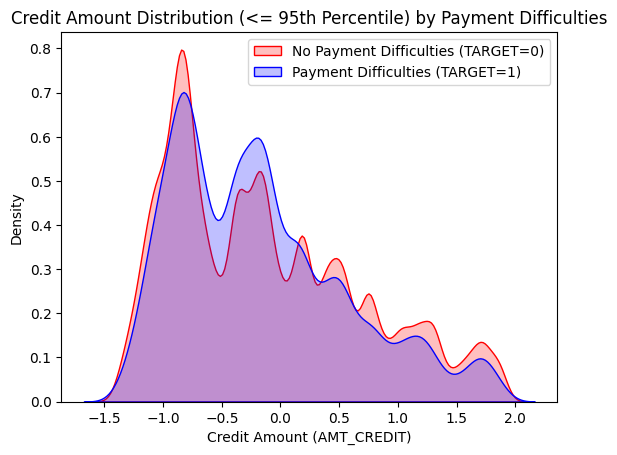

In [113]:
# KDE Plot for AMT_CREDIT
# Filter the data to the 95th percentile
credit_95th = prepared_application[prepared_application.AMT_CREDIT <= prepared_application.AMT_CREDIT.quantile(0.95)]

# KDE plot for truncated credit
credit_plot = sns.kdeplot(credit_95th.AMT_CREDIT[credit_95th["TARGET"] == 0], color="Red", fill=True)
credit_plot = sns.kdeplot(credit_95th.AMT_CREDIT[credit_95th["TARGET"] == 1], ax=credit_plot, color="Blue", fill=True)

# Adding legend, labels, and title
credit_plot.legend(["No Payment Difficulties (TARGET=0)", "Payment Difficulties (TARGET=1)"], loc='upper right')
credit_plot.set_ylabel('Density')
credit_plot.set_xlabel('Credit Amount (AMT_CREDIT)')
credit_plot.set_title('Credit Amount Distribution (<= 95th Percentile) by Payment Difficulties')
plt.show()


Convert all the categorical variables into dummy variables

In [114]:
prepared_application_dummies = pd.get_dummies(prepared_application, drop_first = True)
prepared_application_dummies.head()

SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1      100003       0          0.417399    1.727528     0.592367   
2      100004       0         -0.413867   -1.153587    -1.404761   
3      100006       0         -0.136779   -0.711703     0.177605   
4      100007       0         -0.192196   -0.213527    -0.361958   
5      100008       0         -0.284559   -0.269494     0.027968   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  \
1         1.603667                    0.003541           1               1   
2        -1.091745                    0.010032           1               1   
3        -0.652673                    0.008019           1               1   
4        -0.067245                    0.028663           1               1   
5        -0.225798                    0.035792           1               1   

   FLAG_WORK_PHONE  ...  EMPLOYMENT_DURATION_10-20 years  \
1                0  ...                            False   
2                1  ...                            False   
3                0  ...                            False   
4                0  ...                            False   
5                1  ...                            False   

   EMPLOYMENT_DURATION_20-30 years  EMPLOYMENT_DURATION_30-40 years  \
1                            False                            False   
2                            False                            False   
3                            False                            False   
4                            False                            False   
5                            False                            False   

   EMPLOYMENT_DURATION_40-50 years  YEARS_REGISTRATION_1-5 years  \
1                            False                          True   
2                            False                         False   
3                            False                         False   
4                            False                         False   
5                            False                         False   

   YEARS_REGISTRATION_5-10 years  YEARS_REGISTRATION_10-20 years  \
1                          False                           False   
2                          False                            True   
3                          False                           False   
4                          False                            True   
5                          False                            True   

   YEARS_REGISTRATION_20-30 years  YEARS_REGISTRATION_30-50 years  \
1                           False                           False   
2                           False                           False   
3                            True                           False   
4                           False                           False   
5                           False                           False   

   YEARS_REGISTRATION_50+ years  
1                         False  
2                         False  
3                         False  
4                         False  
5                         False  

[5 rows x 193 columns]

Build a corelation of all predictors with 'TARGET' 

In [115]:
correlation_application = prepared_application_dummies.corr()['TARGET'].sort_values(ascending = False)

<Axes: >

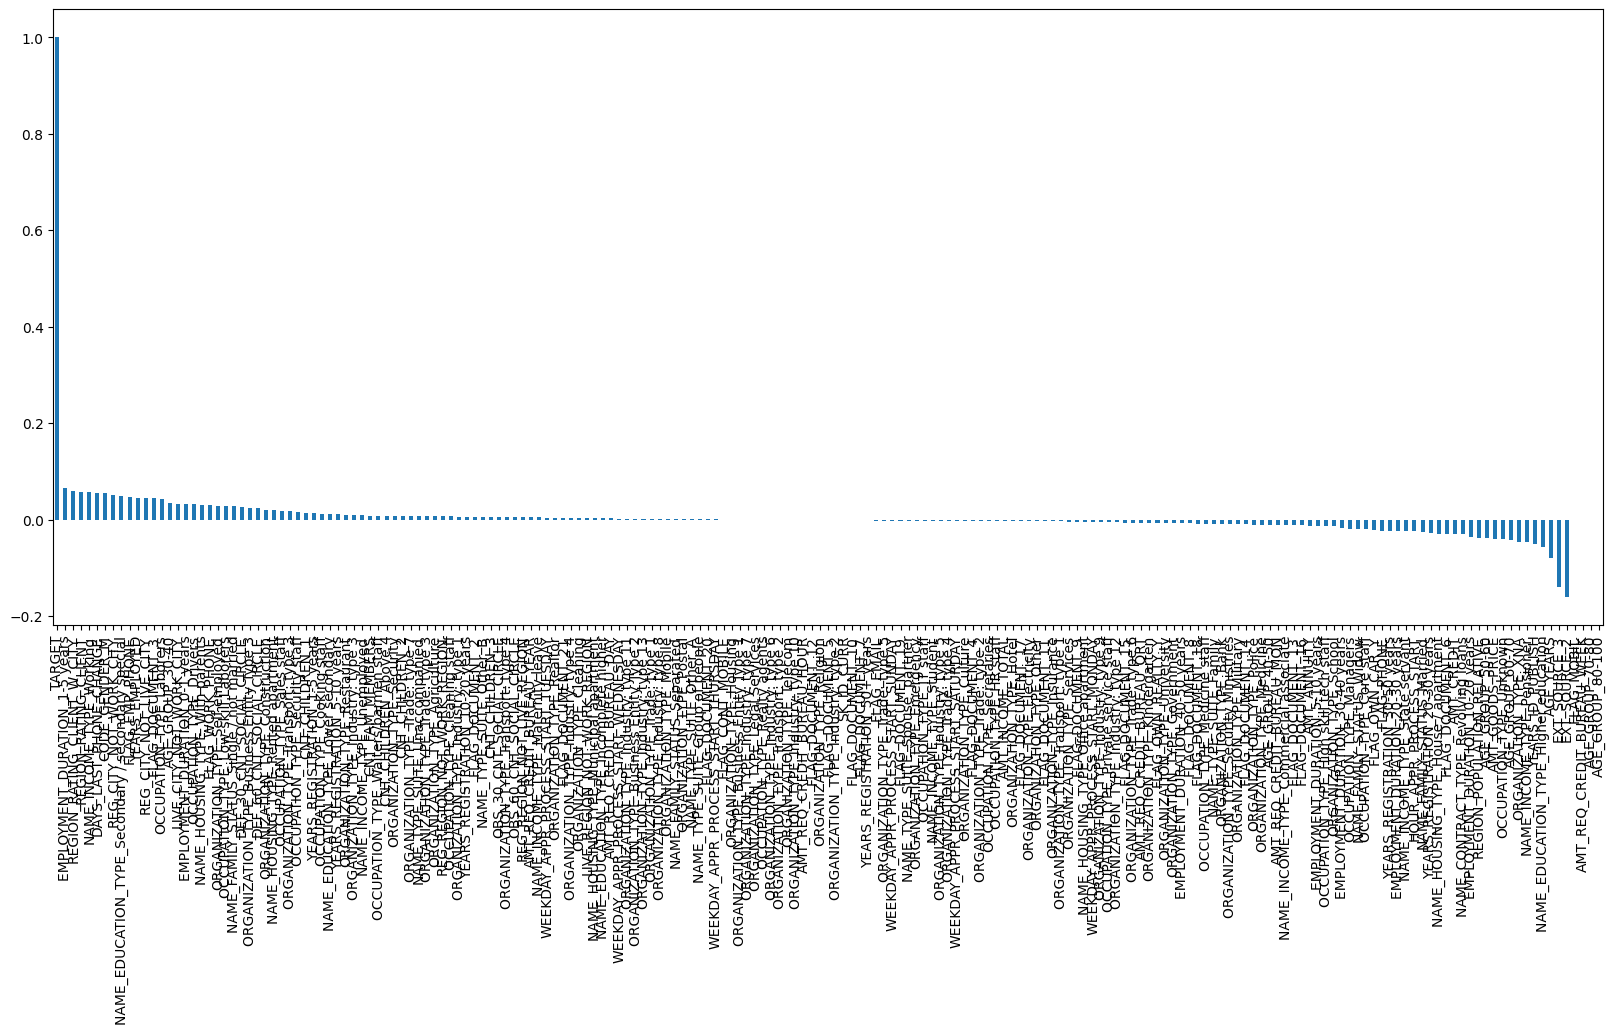

In [116]:
plt.figure(figsize=(20,8))
correlation_application.plot(kind='bar')

As we see, there are too many columns to be inspected. Overall, the correlation scores are low, which might due to high percentage of noise from the large data size. But we have tried our best to reduce the outliers and clean missing values. Let's try to gain insights from this.

In [117]:
# Top 10 columns with highest positive correlation score
correlation_application.drop('TARGET').head(10)

EMPLOYMENT_DURATION_1-5 years                        0.065659
REGION_RATING_CLIENT_W_CITY                          0.060094
REGION_RATING_CLIENT                                 0.058101
NAME_INCOME_TYPE_Working                             0.057484
DAYS_LAST_PHONE_CHANGE                               0.055845
CODE_GENDER_M                                        0.054950
REG_CITY_NOT_WORK_CITY                               0.051800
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049883
FLAG_EMP_PHONE                                       0.046659
YEARS_EMPLOYED                                       0.045609
Name: TARGET, dtype: float64

In [118]:
# Top 10 columns with highest negative correlation score
correlation_application.dropna().tail(10)

AMT_GOODS_PRICE                        -0.039242
OCCUPATION_TYPE_Unknown                -0.039331
AGE_GROUP_60-70                        -0.042027
ORGANIZATION_TYPE_XNA                  -0.046664
NAME_INCOME_TYPE_Pensioner             -0.046874
YEARS_ID_PUBLISH                       -0.050726
NAME_EDUCATION_TYPE_Higher education   -0.056830
AGE_YEARS                              -0.078556
EXT_SOURCE_3                           -0.139702
EXT_SOURCE_2                           -0.160717
Name: TARGET, dtype: float64

In [119]:
# Top 10 columns with lowest absolute correlation score
abs(correlation_application.dropna()).sort_values(ascending = True).head(10)

ORGANIZATION_TYPE_Legal Services            0.000023
OCCUPATION_TYPE_Realty agents               0.000071
ORGANIZATION_TYPE_Industry: type 7          0.000133
ORGANIZATION_TYPE_Business Entity Type 1    0.000317
ORGANIZATION_TYPE_Housing                   0.000347
FLAG_CONT_MOBILE                            0.000356
ORGANIZATION_TYPE_Industry: type 6          0.000408
WEEKDAY_APPR_PROCESS_START_THURSDAY         0.000502
ORGANIZATION_TYPE_Transport: type 2         0.000522
ORGANIZATION_TYPE_Telecom                   0.000621
Name: TARGET, dtype: float64

**Top 10 Columns with Highest Positive Correlation**
These features are positively correlated with the target variable, meaning that as these values increase, there is a slight increase in the likelihood of payment difficulties.

- **EMPLOYMENT_DURATION_1-5 years (0.0657)**: Clients employed for 1-5 years are more likely to face payment difficulties than those with other employment durations. This might indicate some financial instability during this period.

- **REGION_RATING_CLIENT_W_CITY (0.0601) & REGION_RATING_CLIENT (0.0581)**: Higher region ratings correlate with a slight increase in payment difficulties, potentially indicating that living in certain regions may be linked with higher default rates.

- **NAME_INCOME_TYPE_Working (0.0575)**: Working clients have a positive correlation with payment difficulties, possibly because salaried or wage-earning clients experience variable income or financial instability compared to other income types (e.g., business owners).

- **DAYS_LAST_PHONE_CHANGE (0.0558)**: Clients who have recently changed their phone numbers are slightly more likely to face payment difficulties. This might indicate financial instability or mobility among those individuals.

- **CODE_GENDER_M (0.0550)**: Males are marginally more likely than females to face payment difficulties.

- **REG_CITY_NOT_WORK_CITY (0.0518)**: Clients who live in a different city than where they work have a slight increase in payment difficulties, which could suggest commuting-related financial burdens.

- **NAME_EDUCATION_TYPE_Secondary / secondary special (0.0499)**: Clients with secondary-level education have a slight positive correlation with payment difficulties, suggesting that education level could be a factor in financial challenges.

- **FLAG_EMP_PHONE (0.0467)**: Clients with a work phone are slightly more likely to default, though the reasons for this could be complex, possibly tied to job type or instability.

- **YEARS_EMPLOYED (0.0456)**: A weak positive correlation between employment duration and payment difficulties suggests that longer employment alone does not guarantee financial stability.

**Top 10 Columns with Highest Negative Correlation**
These features are negatively correlated with the target variable, meaning that as these values increase, the likelihood of payment difficulties decreases.

- **AMT_GOODS_PRICE (-0.0392)**: Higher prices of goods purchased with the credit tend to slightly reduce the likelihood of default, possibly indicating that individuals financing more expensive purchases are more financially stable.

- **OCCUPATION_TYPE_Unknown (-0.0393)**: Clients with unknown occupations have a weak negative correlation with payment difficulties, meaning that knowing a client's occupation slightly increases the likelihood of default prediction.

- **AGE_GROUP_60-70 (-0.0420)**: Older clients in this age group are less likely to default, possibly due to higher financial stability at this stage of life.

- **ORGANIZATION_TYPE_XNA (-0.0467)**: Unknown organization types show a weak negative correlation, indicating that missing this information may relate to better financial health compared to known organizations.

- **NAME_INCOME_TYPE_Pensioner (-0.0469)**: Pensioners are less likely to default, which could reflect greater financial security from retirement income.

- **YEARS_ID_PUBLISH (-0.0507)**: The longer a client has held an identification document, the less likely they are to face payment difficulties. This might indicate stability or longevity.

- **NAME_EDUCATION_TYPE_Higher education (-0.0568)**: Clients with higher education are less likely to default, likely due to better employment opportunities and financial security.

- **AGE_YEARS (-0.0786)**: Older clients, in general, are less likely to default, which could be due to accumulated wealth, more experience managing finances, or other stability factors.

- **EXT_SOURCE_3 (-0.1397) & EXT_SOURCE_2 (-0.1607)**: These external sources, likely credit bureau scores or similar, are strongly negatively correlated with payment difficulties. As these scores increase, the likelihood of default decreases. These are the most significant predictors and indicate that clients with higher external credit scores are much less likely to experience payment difficulties.

**Top 10 Columns with Lowest Absolute Correlation Scores**

- **ORGANIZATION_TYPE_Legal Services (0.000023)**: Clients working in legal services have almost no correlation with payment difficulties. This suggests that working in this field doesn't significantly affect the likelihood of default, neither positively nor negatively.

- **OCCUPATION_TYPE_Realty agents (0.000071)**: Similarly, being a real estate agent has an almost negligible correlation with the likelihood of default. This profession doesn't seem to provide significant information for predicting payment difficulties.

- **ORGANIZATION_TYPE_Industry: type 7 (0.000133)**: This particular industry type has virtually no effect on whether clients face payment difficulties. It’s not a useful feature for prediction.

- **ORGANIZATION_TYPE_Business Entity Type 1 (0.000310)**: The business entity type "1" also shows little to no correlation with default risk. It doesn’t seem to differentiate clients in terms of financial stability.

- **ORGANIZATION_TYPE_Housing (0.000348)**: Clients working in the housing industry have very low correlation with default. This indicates that employment in housing doesn't provide significant predictive power for financial difficulties.

- **FLAG_CONT_MOBILE (0.000355)**: Whether a client has continuous mobile service or not has no meaningful relationship with the likelihood of default. This is not a significant feature.

- **ORGANIZATION_TYPE_Industry: type 6 (0.000408)**: Like Industry type 7, this industry has an almost negligible correlation, offering no useful information about payment difficulties.

- **WEEKDAY_APPR_PROCESS_START_THURSDAY (0.000500)**: The day of the week (Thursday) when the application process started has an extremely low correlation with the target variable, showing no meaningful insight into default risk.

- **ORGANIZATION_TYPE_Transport: type 2 (0.000522)**: Clients working in the second transport industry type have very little correlation with default risk. This feature does not contribute much predictive value.

- **ORGANIZATION_TYPE_Telecom (0.000621)**: Employment in the telecom industry also has a minimal relationship with payment difficulties, making it a weak predictor for default risk.

***Derived insights***

1) Factors such as medium-term employment duration (1-5 years), living or working in certain regions, and having secondary education may slightly increase default risk. These features could signal underlying financial instability in those groups.

2) Education, age, and external credit scores (EXT_SOURCE_2 and EXT_SOURCE_3) are protective factors, indicating that older, more educated clients with good credit scores are less likely to default.

3) A majority of the low correlation features are related to specific industries or occupations. These features offer little predictive power for default risk, suggesting that simply knowing a client's industry or occupation type may not provide much information about their financial health.


In [120]:
abs(correlation_application.dropna()).sort_values(ascending = False).head(20)

TARGET                                               1.000000
EXT_SOURCE_2                                         0.160717
EXT_SOURCE_3                                         0.139702
AGE_YEARS                                            0.078556
EMPLOYMENT_DURATION_1-5 years                        0.065659
REGION_RATING_CLIENT_W_CITY                          0.060094
REGION_RATING_CLIENT                                 0.058101
NAME_INCOME_TYPE_Working                             0.057484
NAME_EDUCATION_TYPE_Higher education                 0.056830
DAYS_LAST_PHONE_CHANGE                               0.055845
CODE_GENDER_M                                        0.054950
REG_CITY_NOT_WORK_CITY                               0.051800
YEARS_ID_PUBLISH                                     0.050726
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049883
NAME_INCOME_TYPE_Pensioner                           0.046874
ORGANIZATION_TYPE_XNA                                0.046664
FLAG_EMP

<Axes: >

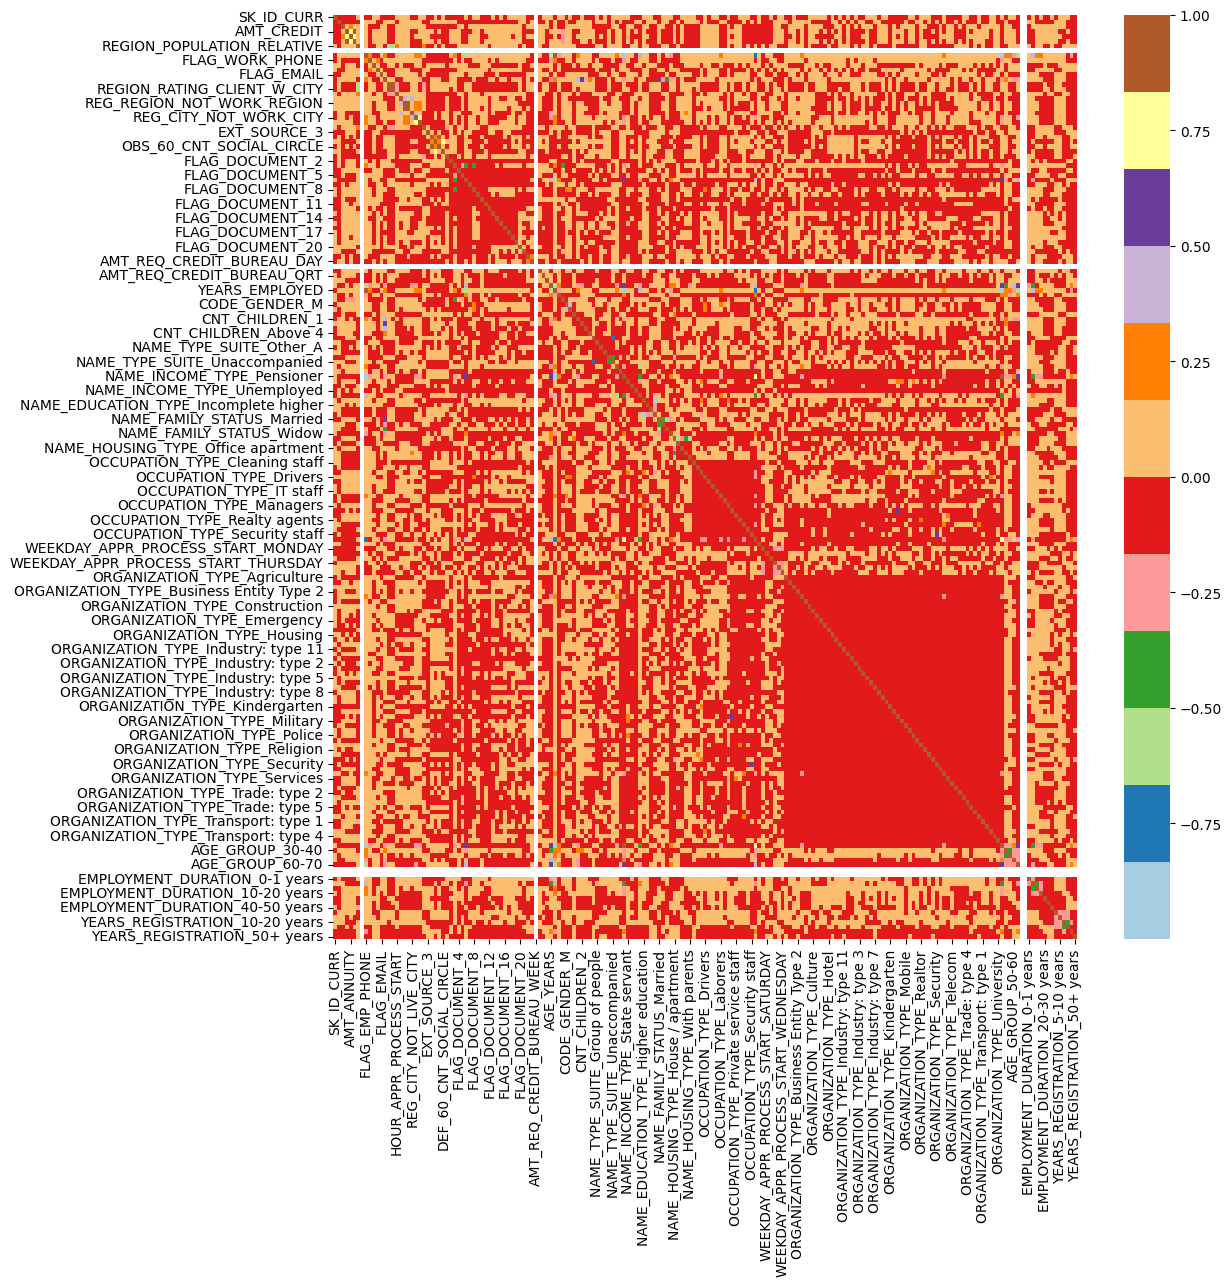

In [121]:
plt.figure(figsize=(12,12))
sns.heatmap(prepared_application_dummies.corr(), cmap="Paired")

### 2) previous_application.csv

In [122]:
pd.crosstab(prepared_previous_application.TARGET, prepared_previous_application.NAME_CONTRACT_TYPE)

NAME_CONTRACT_TYPE  Cash loans  Consumer loans  Revolving loans
TARGET                                                         
0.0                     477154          528544           105743
1.0                      47878           43581            13616

In [123]:
pd.crosstab(prepared_previous_application.TARGET, prepared_previous_application.NAME_CASH_LOAN_PURPOSE)

NAME_CASH_LOAN_PURPOSE  Building a house or an annex  Business development  \
TARGET                                                                       
0.0                                             1227                   210   
1.0                                              179                    36   

NAME_CASH_LOAN_PURPOSE  Buying a garage  Buying a holiday home / land  \
TARGET                                                                  
0.0                                  80                           202   
1.0                                   7                            23   

NAME_CASH_LOAN_PURPOSE  Buying a home  Buying a new car  Buying a used car  \
TARGET                                                                       
0.0                               256               330               1456   
1.0                                53                33                227   

NAME_CASH_LOAN_PURPOSE  Car repairs  Education  Everyday expenses  ...  \
TARGET                                                             ...   
0.0                             506       1060               1617  ...   
1.0                             110        119                187  ...   

NAME_CASH_LOAN_PURPOSE  Money for a third person  Other  \
TARGET                                                    
0.0                                           16   9660   
1.0                                            4   1375   

NAME_CASH_LOAN_PURPOSE  Payments on other loans  \
TARGET                                            
0.0                                         869   
1.0                                         168   

NAME_CASH_LOAN_PURPOSE  Purchase of electronic equipment  \
TARGET                                                     
0.0                                                  702   
1.0                                                  104   

NAME_CASH_LOAN_PURPOSE  Refusal to name the goal  Repairs  Urgent needs  \
TARGET                                                                    
0.0                                            9    13682          5323   
1.0                                            3     2179           927   

NAME_CASH_LOAN_PURPOSE  Wedding / gift / holiday     XAP     XNA  
TARGET                                                            
0.0                                          589  634287  436445  
1.0                                           85   57197   41617  

[2 rows x 25 columns]

In [124]:
pd.crosstab(prepared_previous_application.TARGET, prepared_previous_application.NAME_CLIENT_TYPE)

NAME_CLIENT_TYPE     New  Refreshed  Repeater   XNA
TARGET                                             
0.0               217360      91021    801960  1100
1.0                21399       7125     76425   126

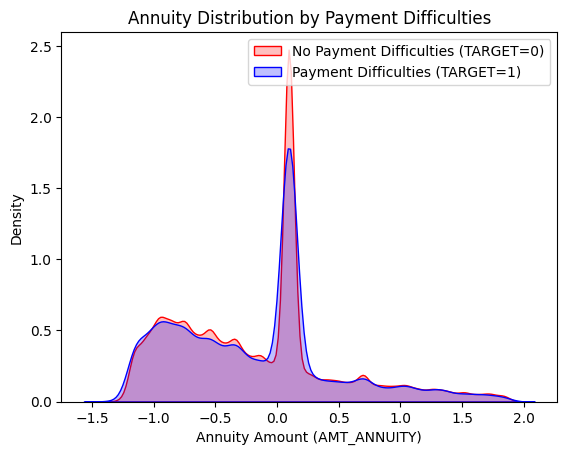

In [125]:
# Filter the data to the 95th percentile for annuity
annuity_95th = prepared_previous_application[prepared_previous_application.AMT_ANNUITY <= prepared_previous_application.AMT_ANNUITY.quantile(0.95)]

# KDE plot for truncated annuity
annuity_plot = sns.kdeplot(annuity_95th.AMT_ANNUITY[annuity_95th["TARGET"] == 0], color="Red", fill=True)
annuity_plot = sns.kdeplot(annuity_95th.AMT_ANNUITY[annuity_95th["TARGET"] == 1], ax=annuity_plot, color="Blue", fill=True)

# Adding legend, labels, and title
annuity_plot.legend(["No Payment Difficulties (TARGET=0)", "Payment Difficulties (TARGET=1)"], loc='upper right')
annuity_plot.set_ylabel('Density')
annuity_plot.set_xlabel('Annuity Amount (AMT_ANNUITY)')
annuity_plot.set_title('Annuity Distribution by Payment Difficulties')
plt.show()


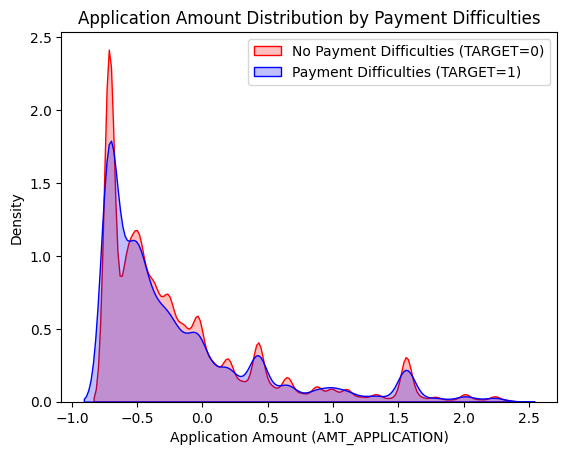

In [126]:
# Filter the data to the 95th percentile for AMT_APPLICATION
application_95th = prepared_previous_application[prepared_previous_application.AMT_APPLICATION <= prepared_previous_application.AMT_APPLICATION.quantile(0.95)]

# KDE plot for truncated application amount
application_plot = sns.kdeplot(application_95th.AMT_APPLICATION[application_95th["TARGET"] == 0], color="Red", fill=True)
application_plot = sns.kdeplot(application_95th.AMT_APPLICATION[application_95th["TARGET"] == 1], ax=application_plot, color="Blue", fill=True)

# Adding legend, labels, and title
application_plot.legend(["No Payment Difficulties (TARGET=0)", "Payment Difficulties (TARGET=1)"], loc='upper right')
application_plot.set_ylabel('Density')
application_plot.set_xlabel('Application Amount (AMT_APPLICATION)')
application_plot.set_title('Application Amount Distribution by Payment Difficulties')
plt.show()


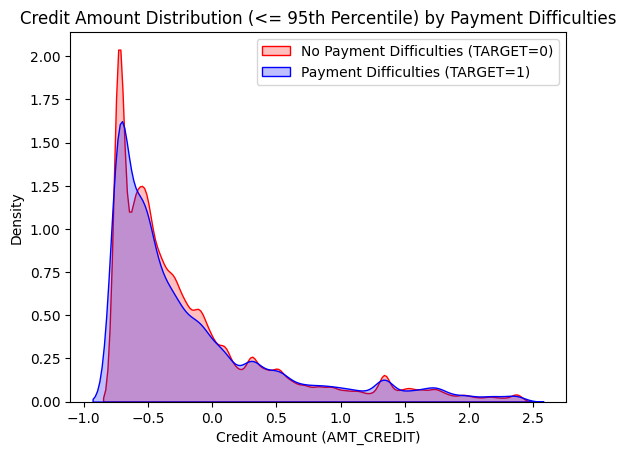

In [127]:
# Filter the data to the 95th percentile for credit amount
credit_95th = prepared_previous_application[prepared_previous_application.AMT_CREDIT <= prepared_previous_application.AMT_CREDIT.quantile(0.95)]

# KDE plot for truncated credit amount
credit_plot = sns.kdeplot(credit_95th.AMT_CREDIT[credit_95th["TARGET"] == 0], color="Red", fill=True)
credit_plot = sns.kdeplot(credit_95th.AMT_CREDIT[credit_95th["TARGET"] == 1], ax=credit_plot, color="Blue", fill=True)

# Adding legend, labels, and title
credit_plot.legend(["No Payment Difficulties (TARGET=0)", "Payment Difficulties (TARGET=1)"], loc='upper right')
credit_plot.set_ylabel('Density')
credit_plot.set_xlabel('Credit Amount (AMT_CREDIT)')
credit_plot.set_title('Credit Amount Distribution (<= 95th Percentile) by Payment Difficulties')
plt.show()


In [128]:
prepared_previous_application_dummies = pd.get_dummies(prepared_previous_application, drop_first = True)
prepared_previous_application_dummies.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877    -1.212700        -0.628786   -0.647415   
1     2802425      108129     0.944221         2.351009    2.395485   
2     2523466      122040     0.012988        -0.147485   -0.099487   
3     2819243      176158     2.953524         1.556033    1.436120   
4     1784265      202054     1.563559         0.988194    1.129615   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0         -0.279216        -0.628793                       15   
1         -0.279304         2.350491                       11   
2         -0.279304        -0.147574                       11   
3         -0.279304         1.555652                        7   
4         -0.279304         0.987910                        9   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  \
0                       1                0.0  ...   
1                       1               -1.0  ...   
2                       1               -1.0  ...   
3                       1               -1.0  ...   
4                       1               -1.0  ...   

   DAYS_FIRST_DRAWING_More than 5 years  DAYS_FIRST_DUE_1-5 years  \
0                                  True                     False   
1                                  True                     False   
2                                  True                     False   
3                                  True                      True   
4                                  True                      True   

   DAYS_FIRST_DUE_More than 5 years  DAYS_LAST_DUE_1ST_VERSION_1-5 years  \
0                              True                                False   
1                              True                                False   
2                              True                                False   
3                             False                                False   
4                             False                                False   

   DAYS_LAST_DUE_1ST_VERSION_More than 5 years  DAYS_LAST_DUE_1-5 years  \
0                                         True                    False   
1                                         True                    False   
2                                         True                    False   
3                                         True                    False   
4                                         True                    False   

   DAYS_LAST_DUE_More than 5 years  DAYS_TERMINATION_1-5 years  \
0                             True                       False   
1                             True                       False   
2                             True                       False   
3                             True                       False   
4                             True                       False   

   DAYS_TERMINATION_More than 5 years  CODE_GENDER_M  
0                                True          False  
1                                True          False  
2                                True          False  
3                                True           True  
4                                True          False  

[5 rows x 154 columns]

In [129]:
correlation_previous_application = prepared_previous_application_dummies.corr()['TARGET'].sort_values(ascending = False)

<Axes: >

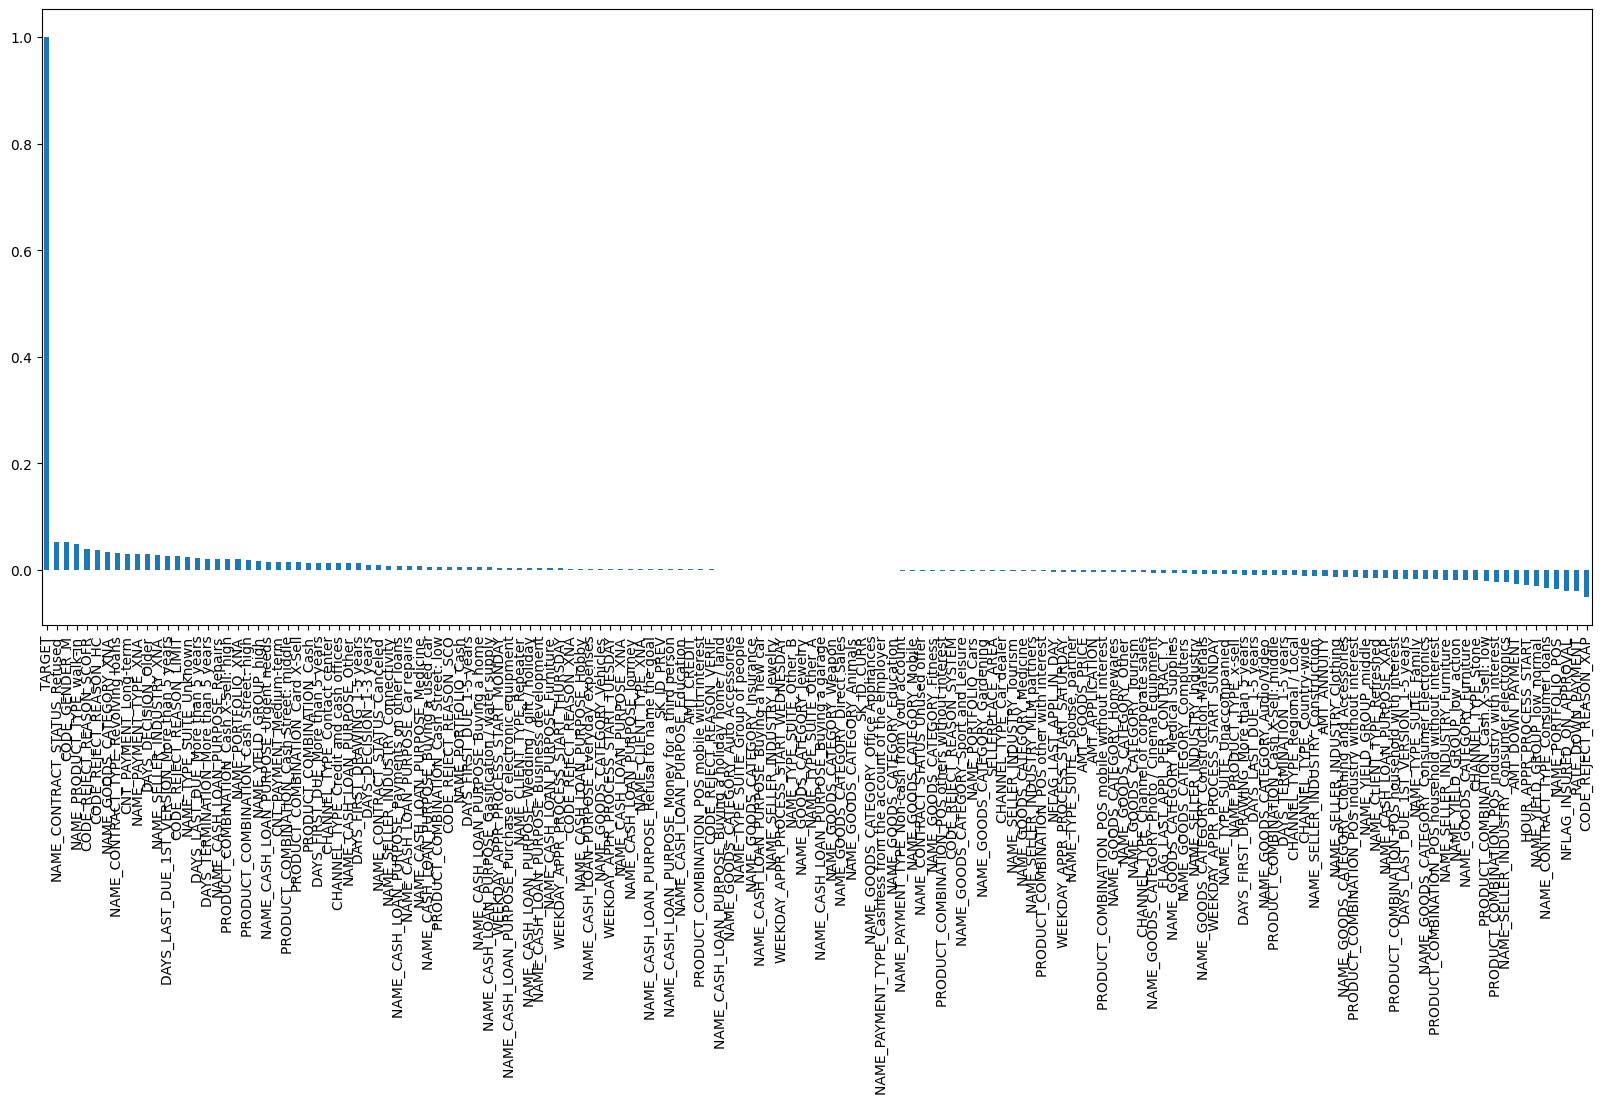

In [130]:
plt.figure(figsize=(20,8))
correlation_previous_application.plot(kind='bar')

In [131]:
# Top 10 columns with highest positive correlation score
correlation_previous_application.drop('TARGET').head(10)

NAME_CONTRACT_STATUS_Refused          0.053356
CODE_GENDER_M                         0.052757
NAME_PRODUCT_TYPE_walk-in             0.047967
CODE_REJECT_REASON_SCOFR              0.038376
CODE_REJECT_REASON_HC                 0.036993
NAME_GOODS_CATEGORY_XNA               0.033765
NAME_CONTRACT_TYPE_Revolving loans    0.032526
CNT_PAYMENT_Long-term                 0.030127
NAME_PAYMENT_TYPE_XNA                 0.030040
DAYS_DECISION_Older                   0.029827
Name: TARGET, dtype: float64

In [132]:
# Top 10 columns with highest negative correlation score
correlation_previous_application.dropna().tail(10)

PRODUCT_COMBINATION_POS industry with interest   -0.022402
NAME_SELLER_INDUSTRY_Consumer electronics        -0.023176
AMT_DOWN_PAYMENT                                 -0.025532
HOUR_APPR_PROCESS_START                          -0.027664
NAME_YIELD_GROUP_low_normal                      -0.029896
NAME_CONTRACT_TYPE_Consumer loans                -0.034213
NAME_PORTFOLIO_POS                               -0.035064
NFLAG_INSURED_ON_APPROVAL                        -0.039889
RATE_DOWN_PAYMENT                                -0.040183
CODE_REJECT_REASON_XAP                           -0.050808
Name: TARGET, dtype: float64

In [133]:
# Top 10 columns with lowest absolute correlation score
abs(correlation_previous_application.dropna()).sort_values(ascending = True).head(10)

NAME_GOODS_CATEGORY_Jewelry                0.000051
NAME_TYPE_SUITE_Other_A                    0.000063
NAME_TYPE_SUITE_Other_B                    0.000093
NAME_CASH_LOAN_PURPOSE_Buying a garage     0.000178
NAME_GOODS_CATEGORY_Weapon                 0.000180
WEEKDAY_APPR_PROCESS_START_WEDNESDAY       0.000183
NAME_GOODS_CATEGORY_Direct Sales           0.000226
NAME_SELLER_INDUSTRY_Jewelry               0.000263
NAME_GOODS_CATEGORY_Animals                0.000279
NAME_CASH_LOAN_PURPOSE_Buying a new car    0.000279
Name: TARGET, dtype: float64

In [134]:
abs(correlation_previous_application.dropna()).sort_values(ascending = False).head(20)

TARGET                                         1.000000
NAME_CONTRACT_STATUS_Refused                   0.053356
CODE_GENDER_M                                  0.052757
CODE_REJECT_REASON_XAP                         0.050808
NAME_PRODUCT_TYPE_walk-in                      0.047967
RATE_DOWN_PAYMENT                              0.040183
NFLAG_INSURED_ON_APPROVAL                      0.039889
CODE_REJECT_REASON_SCOFR                       0.038376
CODE_REJECT_REASON_HC                          0.036993
NAME_PORTFOLIO_POS                             0.035064
NAME_CONTRACT_TYPE_Consumer loans              0.034213
NAME_GOODS_CATEGORY_XNA                        0.033765
NAME_CONTRACT_TYPE_Revolving loans             0.032526
CNT_PAYMENT_Long-term                          0.030127
NAME_PAYMENT_TYPE_XNA                          0.030040
NAME_YIELD_GROUP_low_normal                    0.029896
DAYS_DECISION_Older                            0.029827
NAME_SELLER_INDUSTRY_XNA                       0

### **Top 10 Columns with Highest Positive Correlation**

These features are positively correlated with the `TARGET` variable, meaning that as these values increase, there is a slight increase in the likelihood of payment difficulties (defaults).

- **NAME_CONTRACT_STATUS_Refused (0.0534)**: Clients with previously refused contracts are slightly more likely to face payment difficulties, indicating potential credit risk for individuals who have faced rejection in past applications.
  
- **CODE_GENDER_M (0.0528)**: Male clients are marginally more likely to default than female clients, suggesting a small gender-based risk difference.

- **NAME_PRODUCT_TYPE_walk-in (0.0480)**: Clients who used "walk-in" product types for their previous loan applications show a small positive correlation with payment difficulties, possibly indicating that these clients may not have used sophisticated loan services, leading to financial risk.

- **CODE_REJECT_REASON_SCOFR (0.0384)**: Clients who were previously rejected due to insufficient credit score (SCOFR) have a slightly higher chance of defaulting, implying that prior rejections due to poor creditworthiness can be a red flag.

- **CODE_REJECT_REASON_HC (0.0370)**: Those rejected for other high-risk reasons (HC) are also more likely to default, further reinforcing that past rejection reasons are predictive of financial difficulties.

- **NAME_GOODS_CATEGORY_XNA (0.0338)**: Clients with goods categorized under "XNA" (likely missing or unknown information) show a slight positive correlation with payment difficulties, possibly due to incomplete application information.

- **NAME_CONTRACT_TYPE_Revolving loans (0.0325)**: Clients with revolving loans are marginally more likely to default than those with other loan types, possibly because these loans often involve revolving credit, which may lead to overborrowing.

- **CNT_PAYMENT_Long-term (0.0301)**: Clients with long-term payments have a small increase in default risk, possibly due to the longer commitment required for such loans.

- **NAME_PAYMENT_TYPE_XNA (0.0300)**: Missing or unknown payment types ("XNA") show a positive correlation with default, potentially reflecting incomplete application data or non-standard payment arrangements.

- **DAYS_DECISION_Older (0.0298)**: Older decisions (loans approved further back in time) show a slight positive correlation with default risk, which might indicate that older loans or delayed approvals are associated with higher default probabilities.

### **Top 10 Columns with Highest Negative Correlation**

These features are negatively correlated with the `TARGET` variable, meaning that as these values increase, the likelihood of payment difficulties decreases.

- **PRODUCT_COMBINATION_POS industry with interest (-0.0224)**: This product combination has a slight negative correlation with default, suggesting that clients who used this product combination are slightly less likely to default, possibly due to structured payments with interest.

- **NAME_SELLER_INDUSTRY_Consumer electronics (-0.0232)**: Clients who purchased consumer electronics are marginally less likely to default, perhaps due to higher disposable income or better financial planning for these purchases.

- **AMT_DOWN_PAYMENT (-0.0255)**: A larger down payment amount is weakly correlated with lower default risk, indicating that clients who can afford higher down payments are generally more financially stable.

- **HOUR_APPR_PROCESS_START (-0.0277)**: The time of day the application process starts has a weak negative correlation with default, but this likely has little practical significance.

- **NAME_YIELD_GROUP_low_normal (-0.0299)**: Clients categorized under "low normal" yield group (likely referring to loan profitability) are slightly less likely to default, which may indicate more conservative, low-risk clients.

- **NAME_CONTRACT_TYPE_Consumer loans (-0.0342)**: Clients with consumer loans have a small negative correlation with default, possibly reflecting that these loans are generally smaller or more manageable compared to revolving loans.

- **NAME_PORTFOLIO_POS (-0.0351)**: This loan portfolio type ("POS") shows a weak negative correlation with default, suggesting that clients using this portfolio type are less likely to default.

- **NFLAG_INSURED_ON_APPROVAL (-0.0399)**: Clients who did not request insurance during the approval process are slightly less likely to default, though this correlation may not be practically significant.

- **RATE_DOWN_PAYMENT (-0.0402)**: A higher down payment rate is weakly correlated with a reduced likelihood of default, indicating that clients who contribute more upfront are less likely to default on their loans.

- **CODE_REJECT_REASON_XAP (-0.0508)**: Clients previously rejected for other reasons ("XAP") are less likely to default, suggesting that specific rejection reasons (like creditworthiness) may be more predictive of default risk.

### **Top 10 Columns with Lowest Absolute Correlation Scores**

These columns have the lowest absolute correlation with `TARGET`, meaning they have almost no relationship with the likelihood of default.

- **NAME_GOODS_CATEGORY_Jewelry (0.00005)**: Purchases categorized as "Jewelry" have almost no correlation with default risk, suggesting that this category doesn't significantly influence financial stability.

- **NAME_TYPE_SUITE_Other_A (0.00006)**: This type of suite (likely indicating a co-applicant or dependent accompanying the application) shows no meaningful correlation with default.

- **NAME_TYPE_SUITE_Other_B (0.00009)**: Similar to "Other_A," this suite type has no real predictive power regarding payment difficulties.

- **NAME_CASH_LOAN_PURPOSE_Buying a garage (0.00018)**: Clients applying for loans to buy a garage have no significant relationship with default, indicating that this loan purpose doesn’t provide meaningful risk information.

- **NAME_GOODS_CATEGORY_Weapon (0.00018)**: Loan applications for purchasing weapons have no meaningful correlation with default, likely due to the small sample size or specific loan purpose.

- **WEEKDAY_APPR_PROCESS_START_WEDNESDAY (0.00018)**: Applications starting on Wednesday have an extremely low correlation with the likelihood of default, suggesting the day of the week has no meaningful impact on payment difficulties.

- **NAME_GOODS_CATEGORY_Direct Sales (0.00023)**: Loans for "Direct Sales" goods show no significant correlation with default, suggesting that this category doesn’t contribute to predicting risk.

- **NAME_SELLER_INDUSTRY_Jewelry (0.00026)**: Clients purchasing from the "Jewelry" industry have almost no correlation with default, similar to the goods category of jewelry.

- **NAME_GOODS_CATEGORY_Animals (0.00028)**: Loans for animal-related purchases have no significant correlation with payment difficulties.

- **NAME_CASH_LOAN_PURPOSE_Buying a new car (0.00028)**: Clients applying for loans to buy a new car have almost no correlation with default, indicating this purpose does not affect financial risk significantly.

### **Derived Insights:**

1. **Factors like previously refused contracts, male gender, revolving loans, and long-term payments** are positively correlated with default risk. These features could indicate financial instability or prior rejection history, which are predictive of higher default probabilities.

2. **High down payments, consumer loans, and specific product combinations** are negatively correlated with default risk, suggesting that clients who are financially able to make large down payments or take on less risky loan types are less likely to default.

3. **Many of the features with the lowest correlation** are specific loan purposes (like buying a garage or weapons) or niche product categories, which offer little to no predictive power for default risk.

These insights provide a clearer understanding of the variables influencing payment difficulties in the previous applications dataset.

<Axes: >

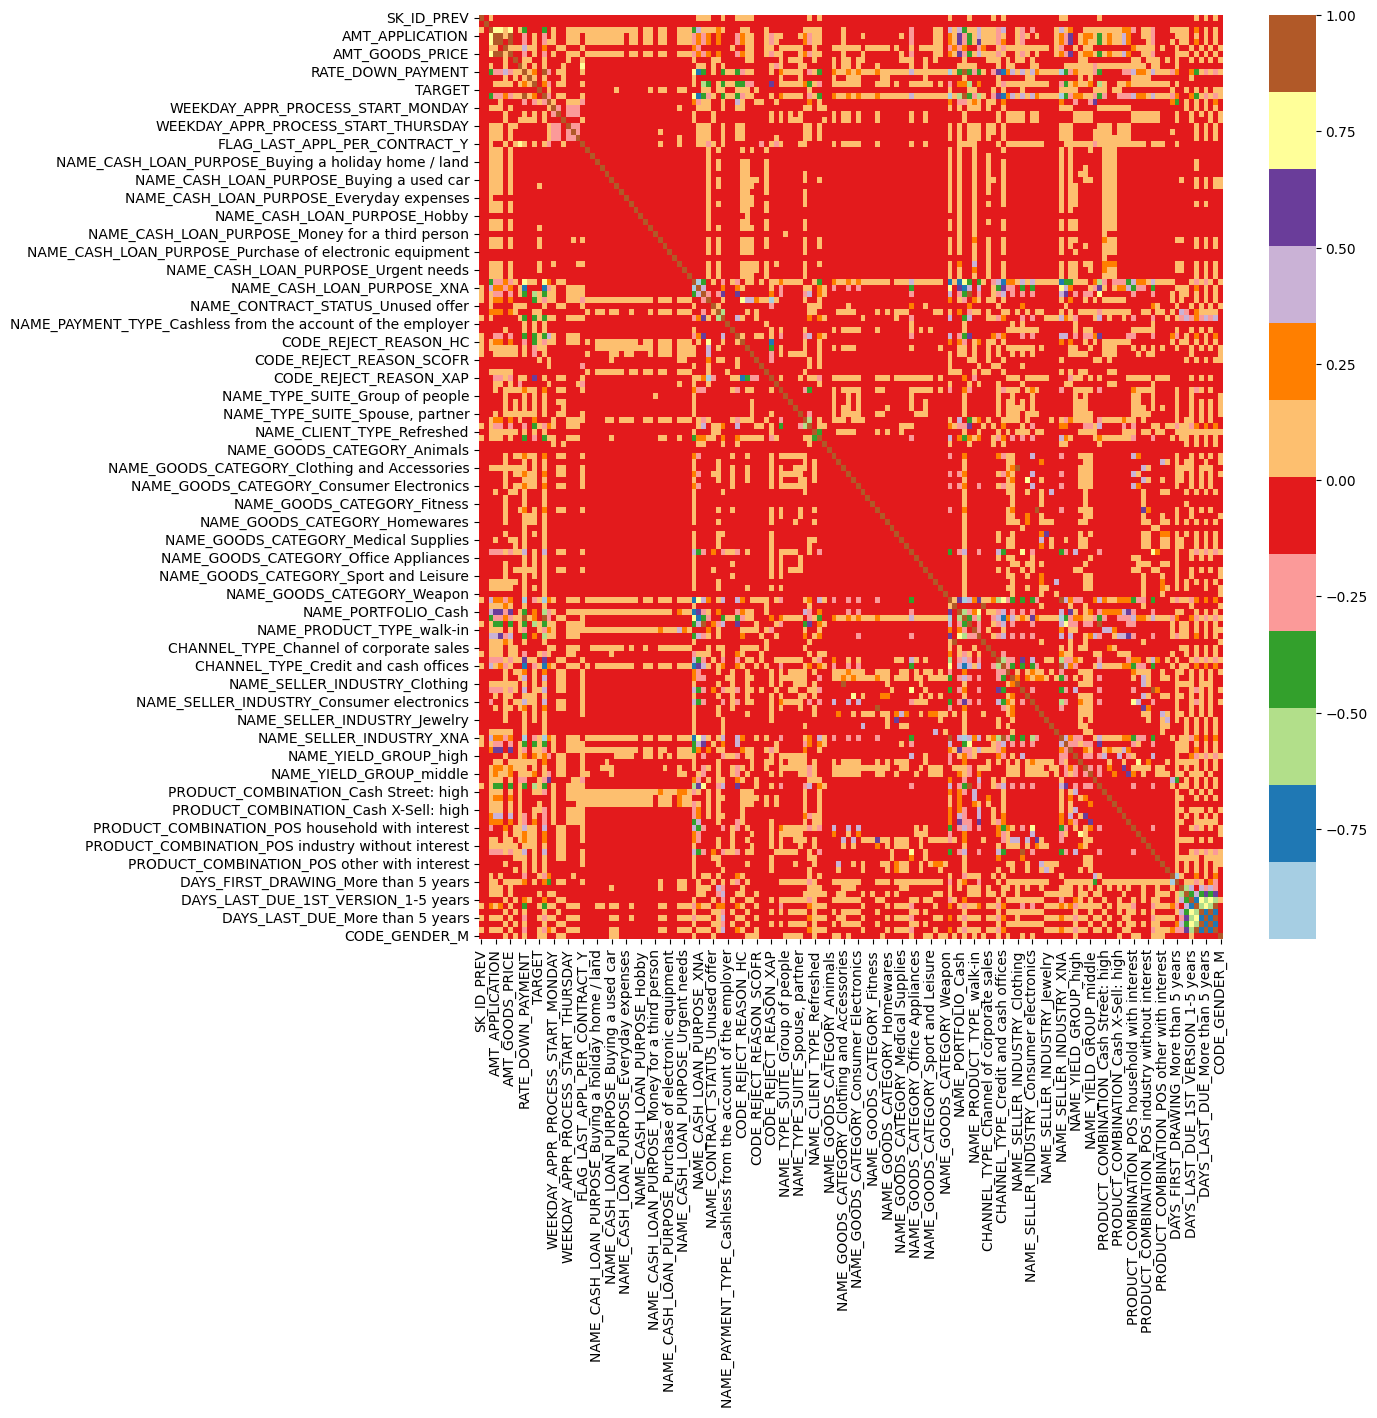

In [135]:
plt.figure(figsize=(12,12))
sns.heatmap(prepared_previous_application_dummies.corr(), cmap="Paired")

## Bivariate Analysis

### 1) application_data.csv

In [136]:
# Separate the data into two based on the 'TARGET' variable
prepared_application_target0 = prepared_application.loc[prepared_application["TARGET"] == 0]
prepared_application_target1 = prepared_application.loc[prepared_application["TARGET"] == 1]


In [137]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.show()

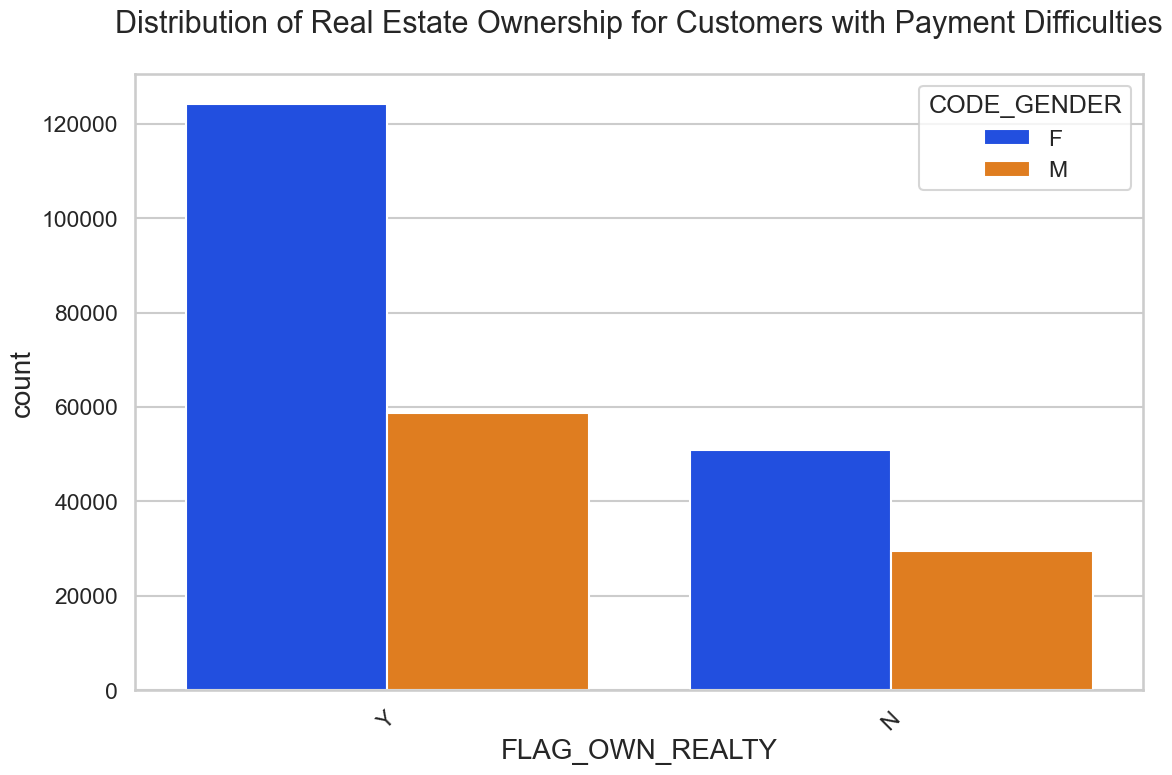

In [138]:
uniplot(prepared_application_target0, col='FLAG_OWN_REALTY', title='Distribution of Real Estate Ownership for Customers with Payment Difficulties', hue='CODE_GENDER')

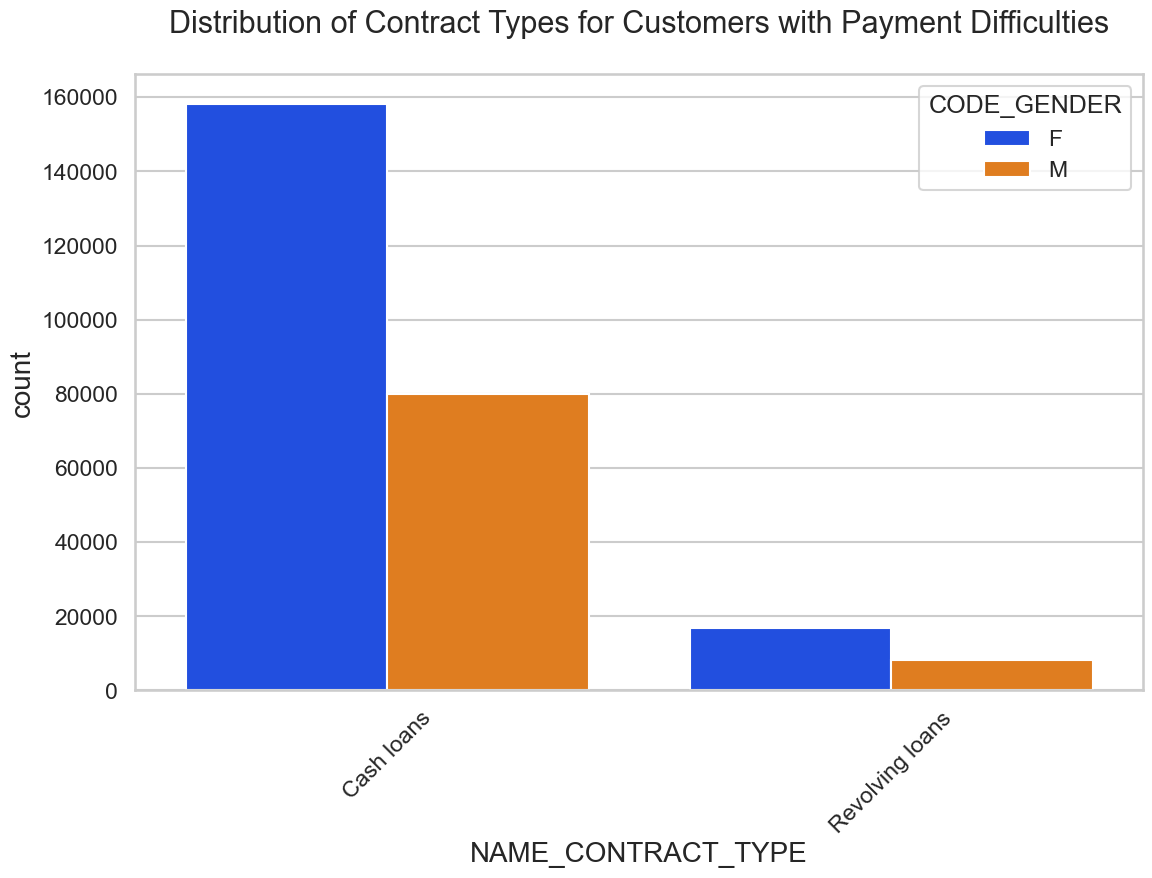

In [139]:
uniplot(prepared_application_target0, col='NAME_CONTRACT_TYPE', title='Distribution of Contract Types for Customers with Payment Difficulties', hue='CODE_GENDER')

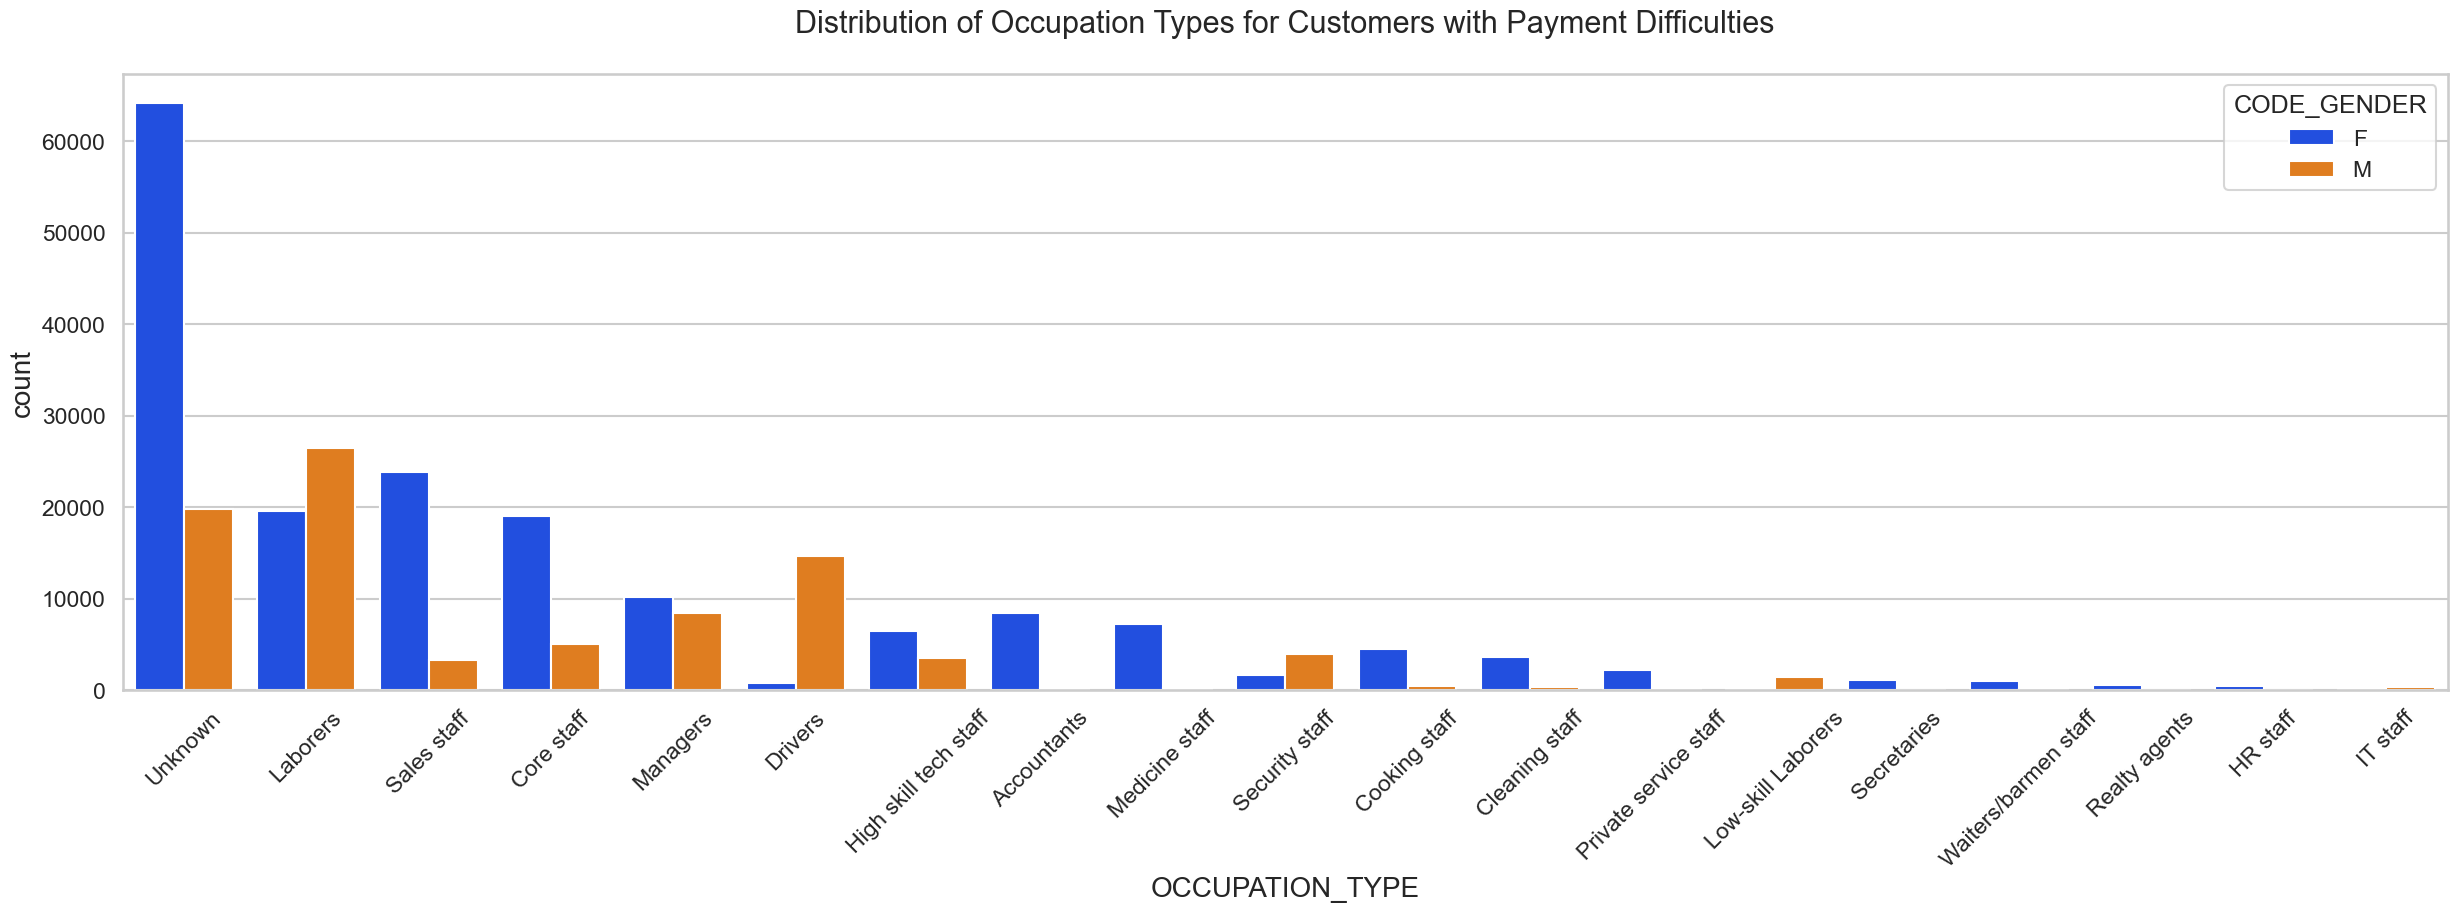

In [140]:
uniplot(prepared_application_target0, col='OCCUPATION_TYPE', title='Distribution of Occupation Types for Customers with Payment Difficulties', hue='CODE_GENDER')

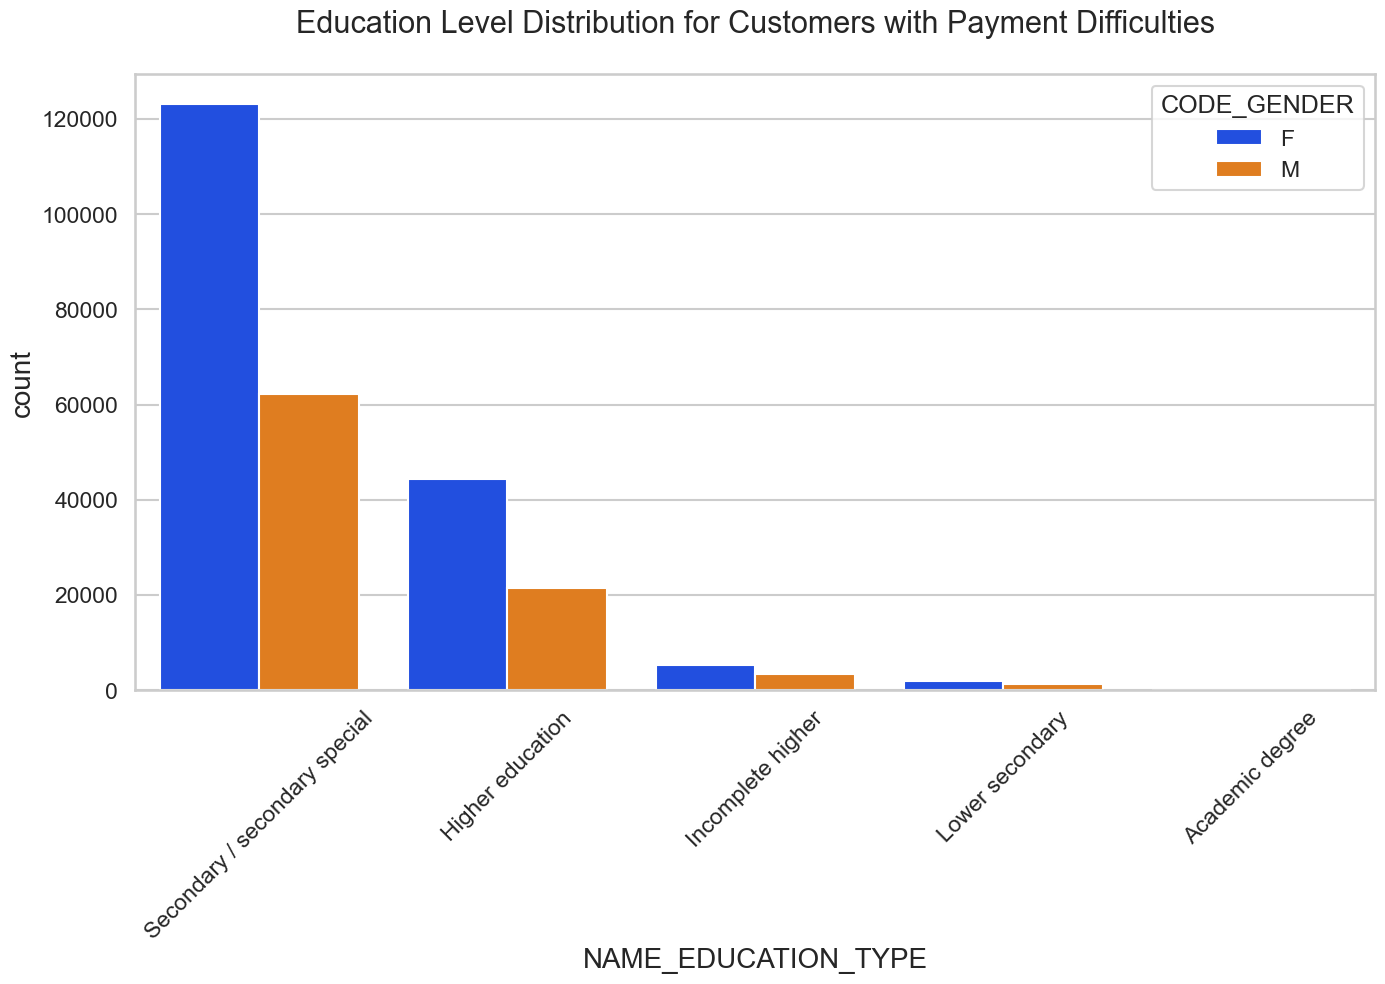

In [141]:
uniplot(prepared_application_target0, col='NAME_EDUCATION_TYPE', title='Education Level Distribution for Customers with Payment Difficulties', hue='CODE_GENDER')

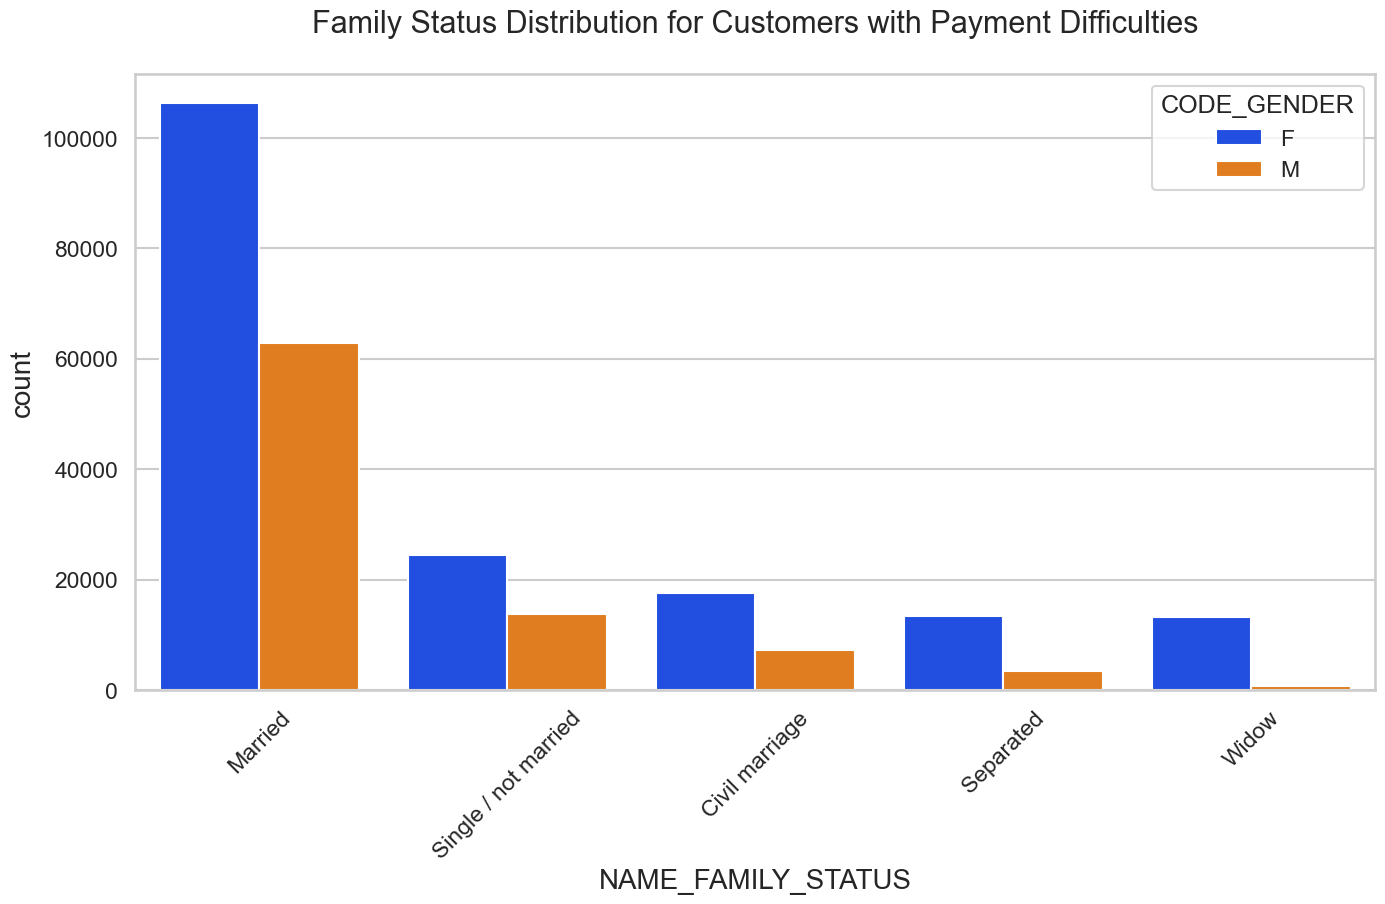

In [142]:
uniplot(prepared_application_target0, col='NAME_FAMILY_STATUS', title='Family Status Distribution for Customers with Payment Difficulties', hue='CODE_GENDER')

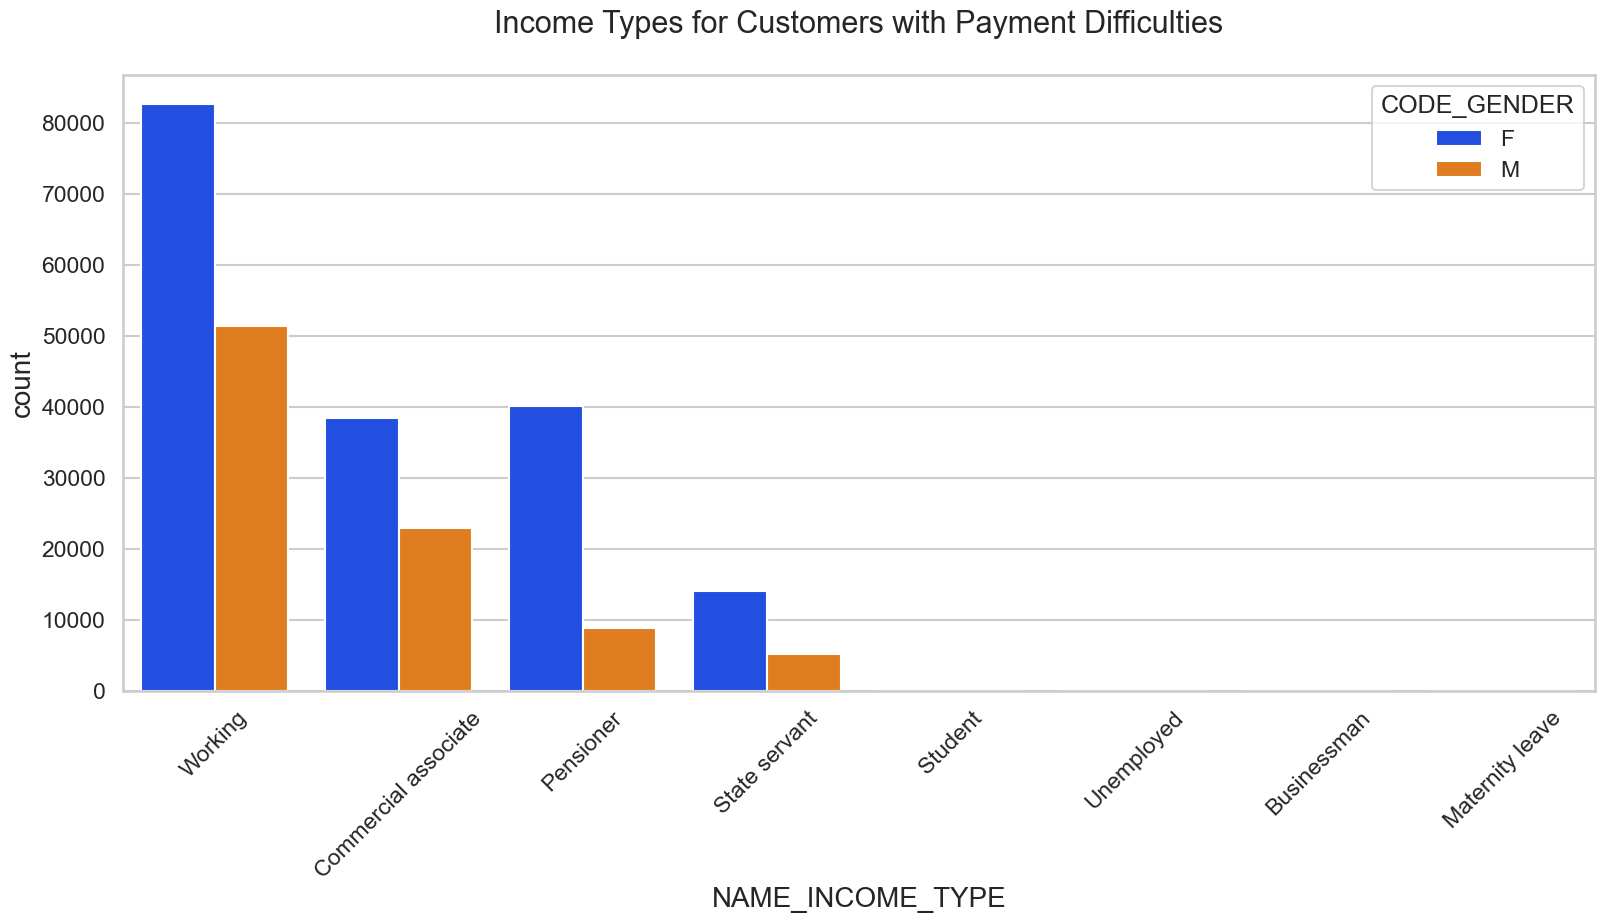

In [143]:
uniplot(prepared_application_target0, col='NAME_INCOME_TYPE', title='Income Types for Customers with Payment Difficulties', hue='CODE_GENDER')

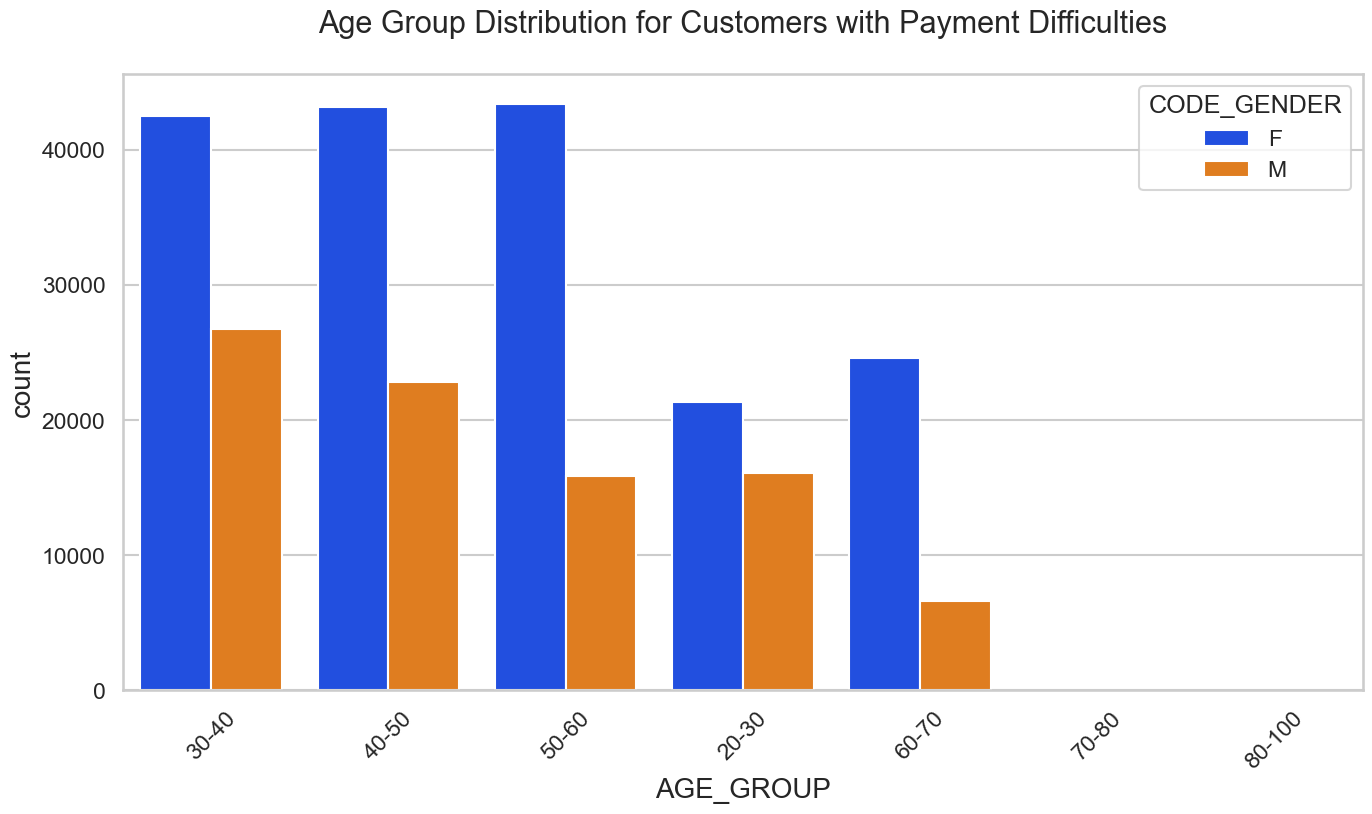

In [144]:
uniplot(prepared_application_target0, col='AGE_GROUP', title='Age Group Distribution for Customers with Payment Difficulties', hue='CODE_GENDER')

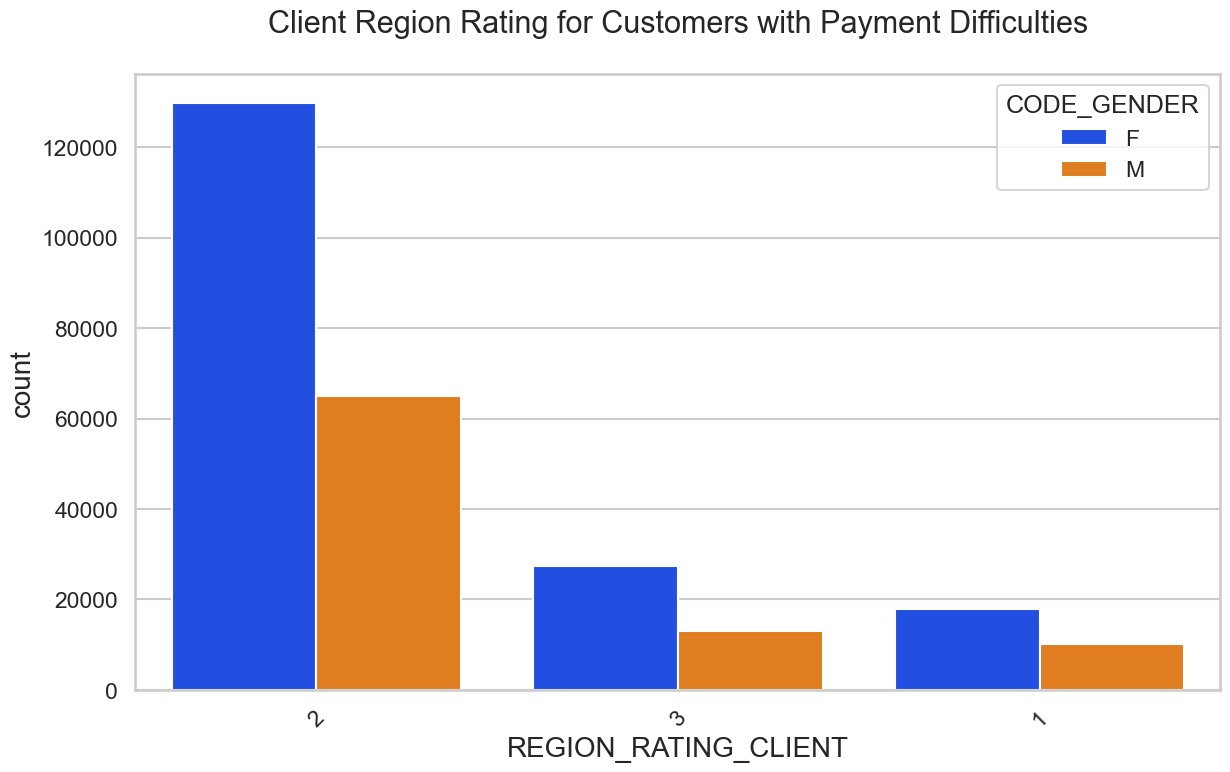

In [145]:
uniplot(prepared_application_target0, col='REGION_RATING_CLIENT', title='Client Region Rating for Customers with Payment Difficulties', hue='CODE_GENDER')

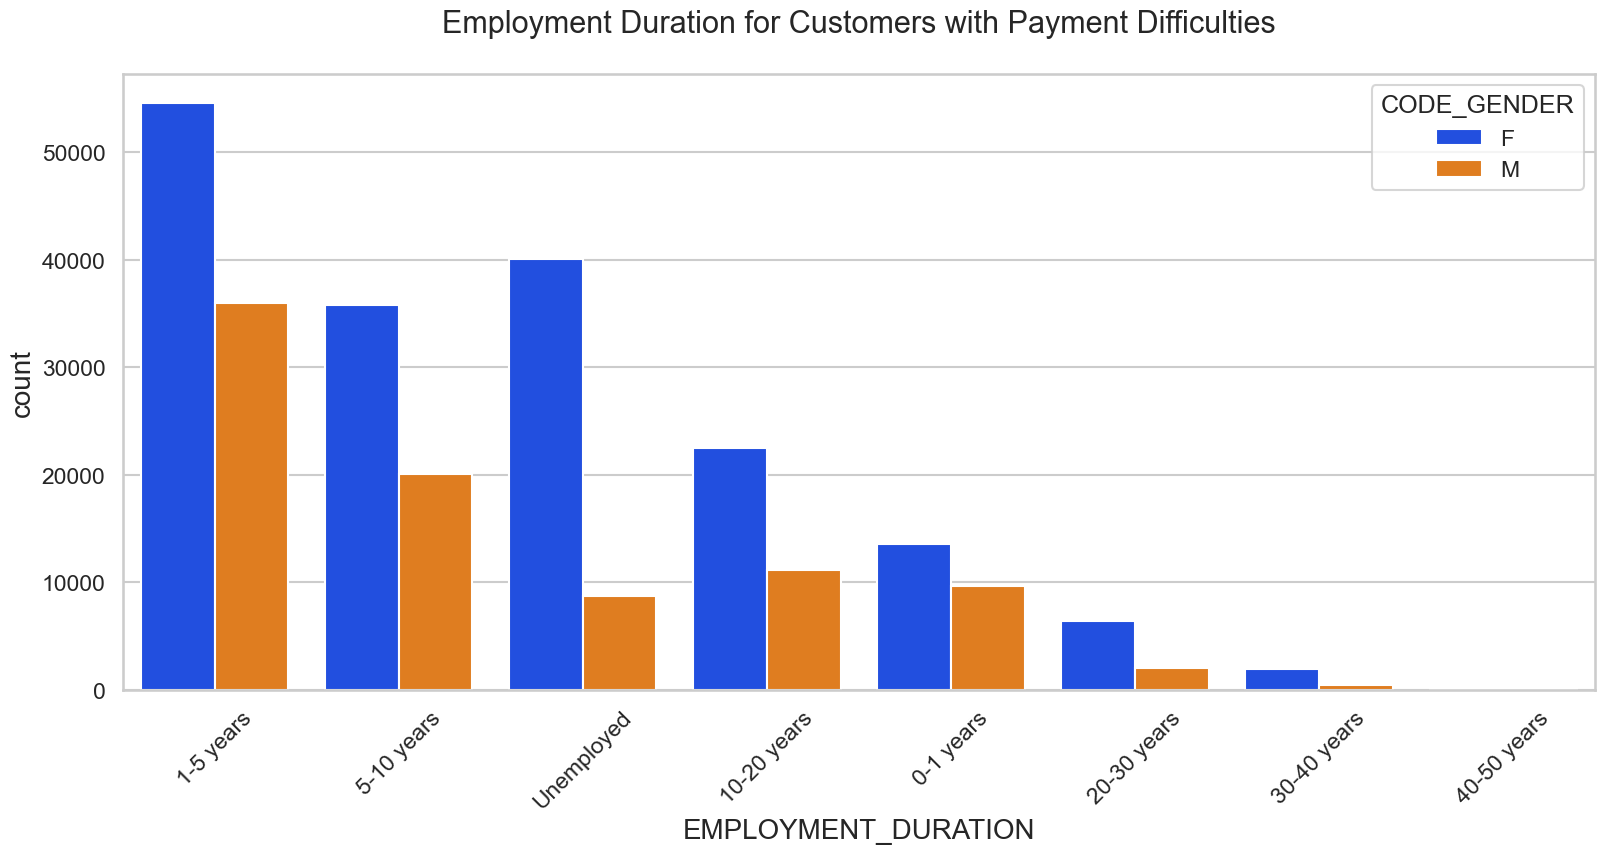

In [146]:
uniplot(prepared_application_target0, col='EMPLOYMENT_DURATION', title='Employment Duration for Customers with Payment Difficulties', hue='CODE_GENDER')

### 2) previous_application.csv

In [147]:
# Separate the data into two based on the 'TARGET' variable
previous_application_target0 = prepared_previous_application.loc[prepared_previous_application["TARGET"] == 0]
previous_application_target1 = prepared_previous_application.loc[prepared_previous_application["TARGET"] == 1]


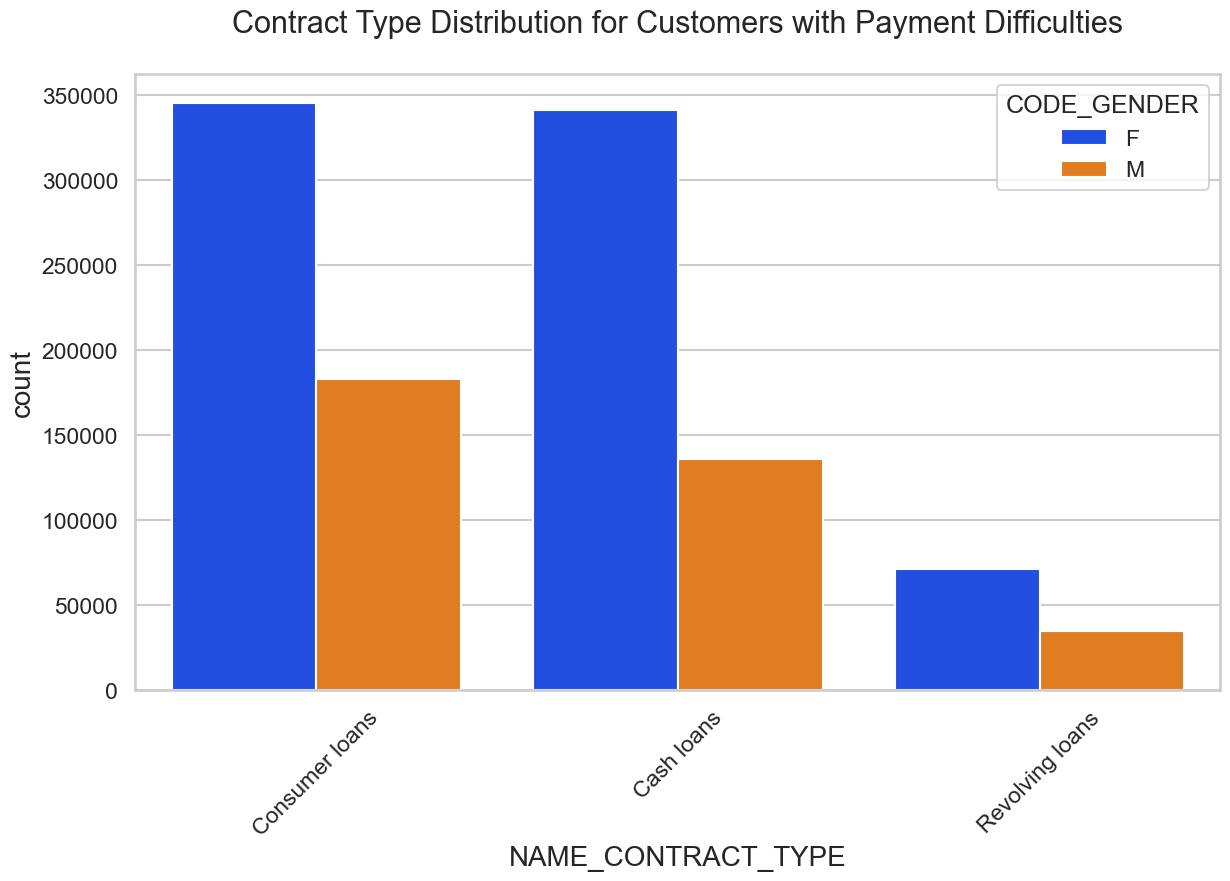

In [148]:
uniplot(previous_application_target0, col='NAME_CONTRACT_TYPE', title='Contract Type Distribution for Customers with Payment Difficulties', hue='CODE_GENDER')

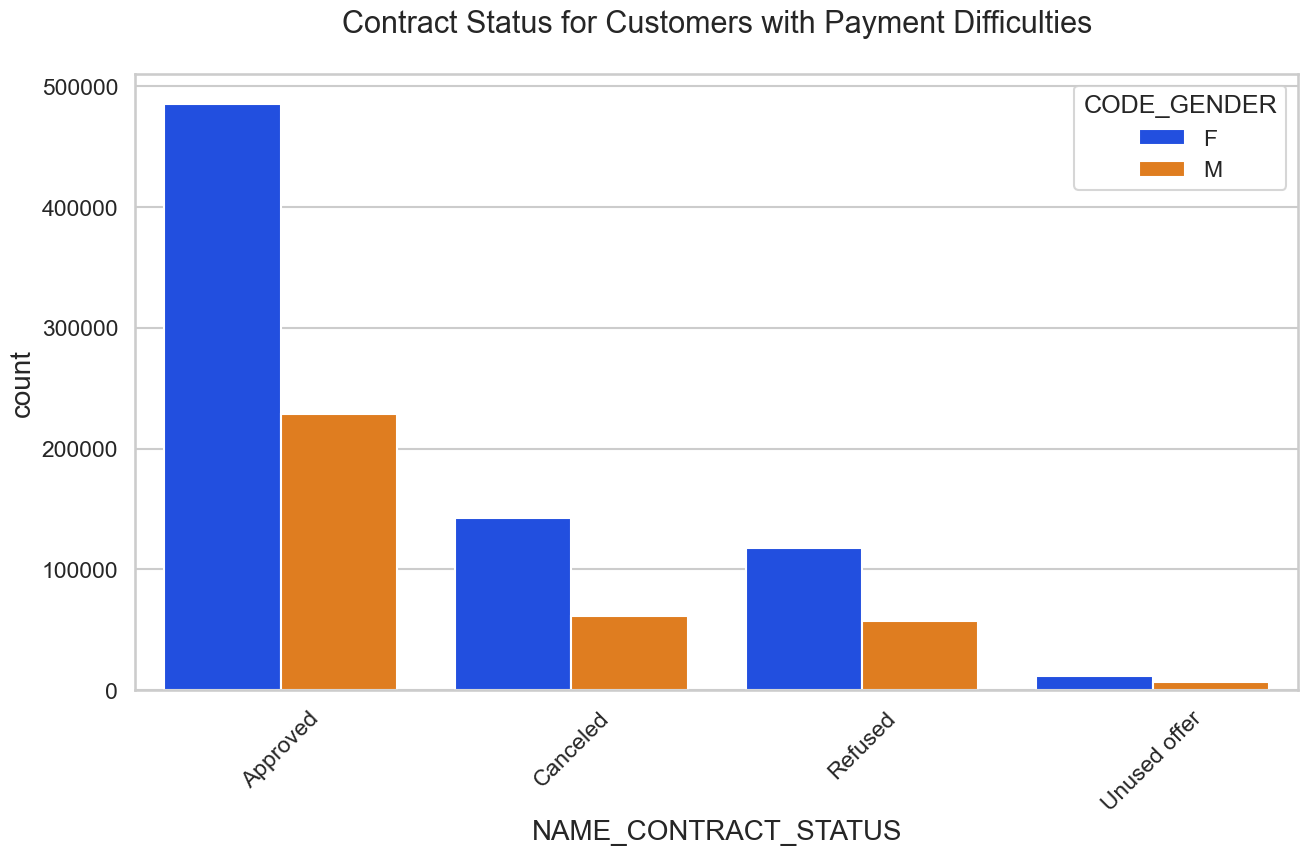

In [149]:
uniplot(previous_application_target0, col='NAME_CONTRACT_STATUS', title='Contract Status for Customers with Payment Difficulties', hue='CODE_GENDER')

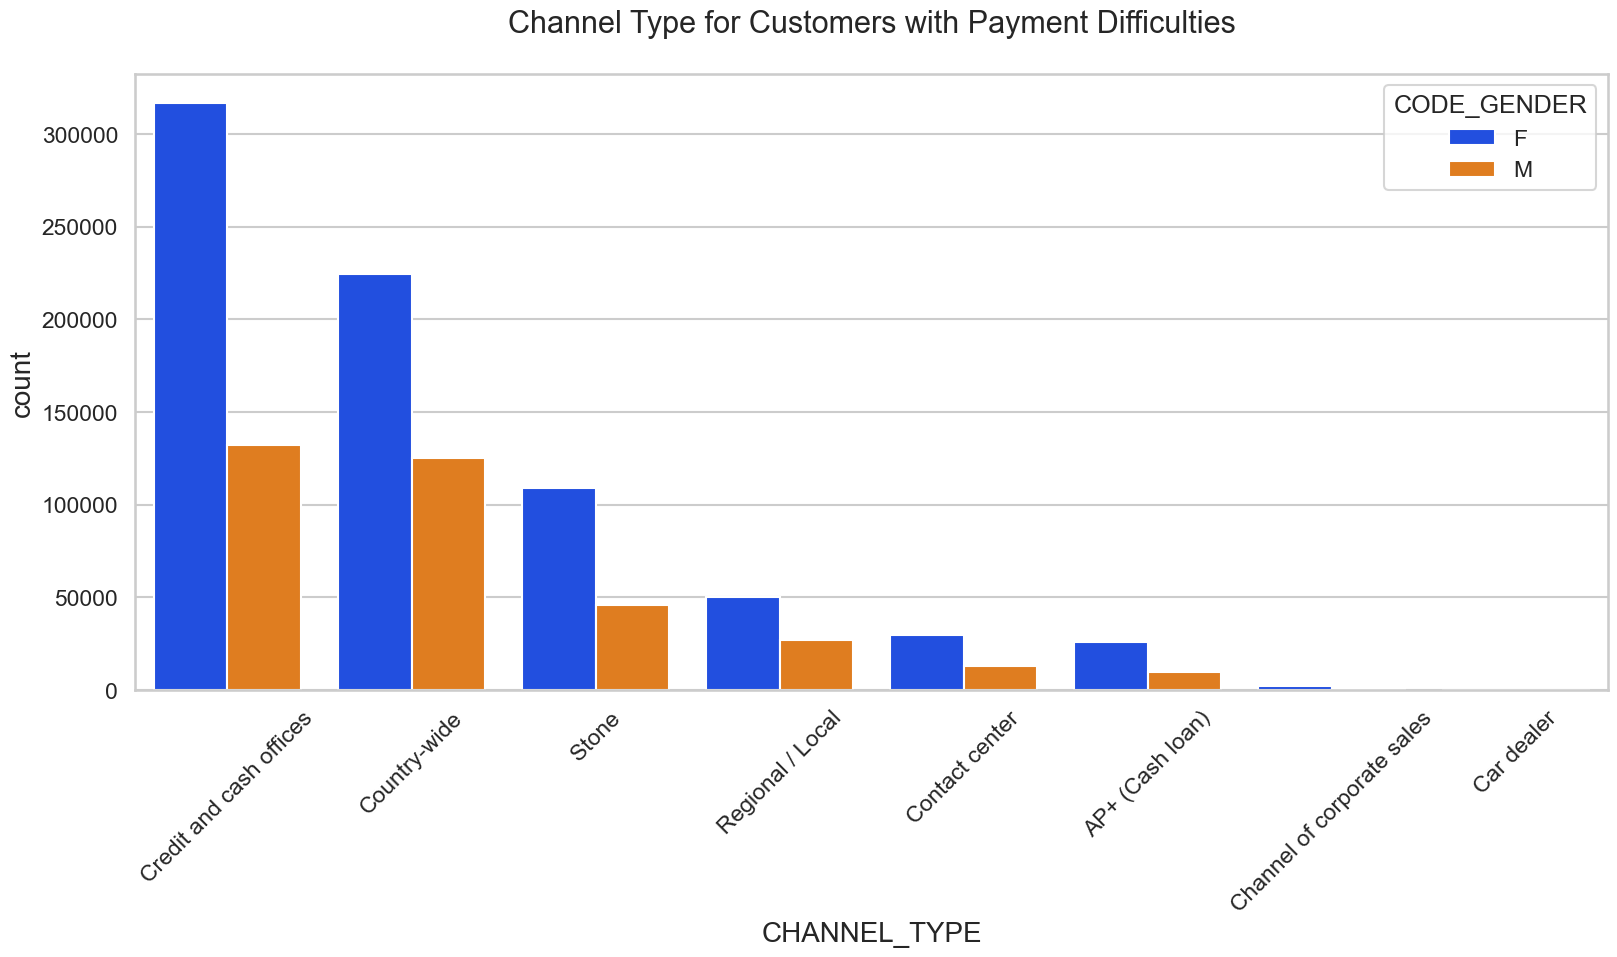

In [150]:
uniplot(previous_application_target0, col='CHANNEL_TYPE', title='Channel Type for Customers with Payment Difficulties', hue='CODE_GENDER')

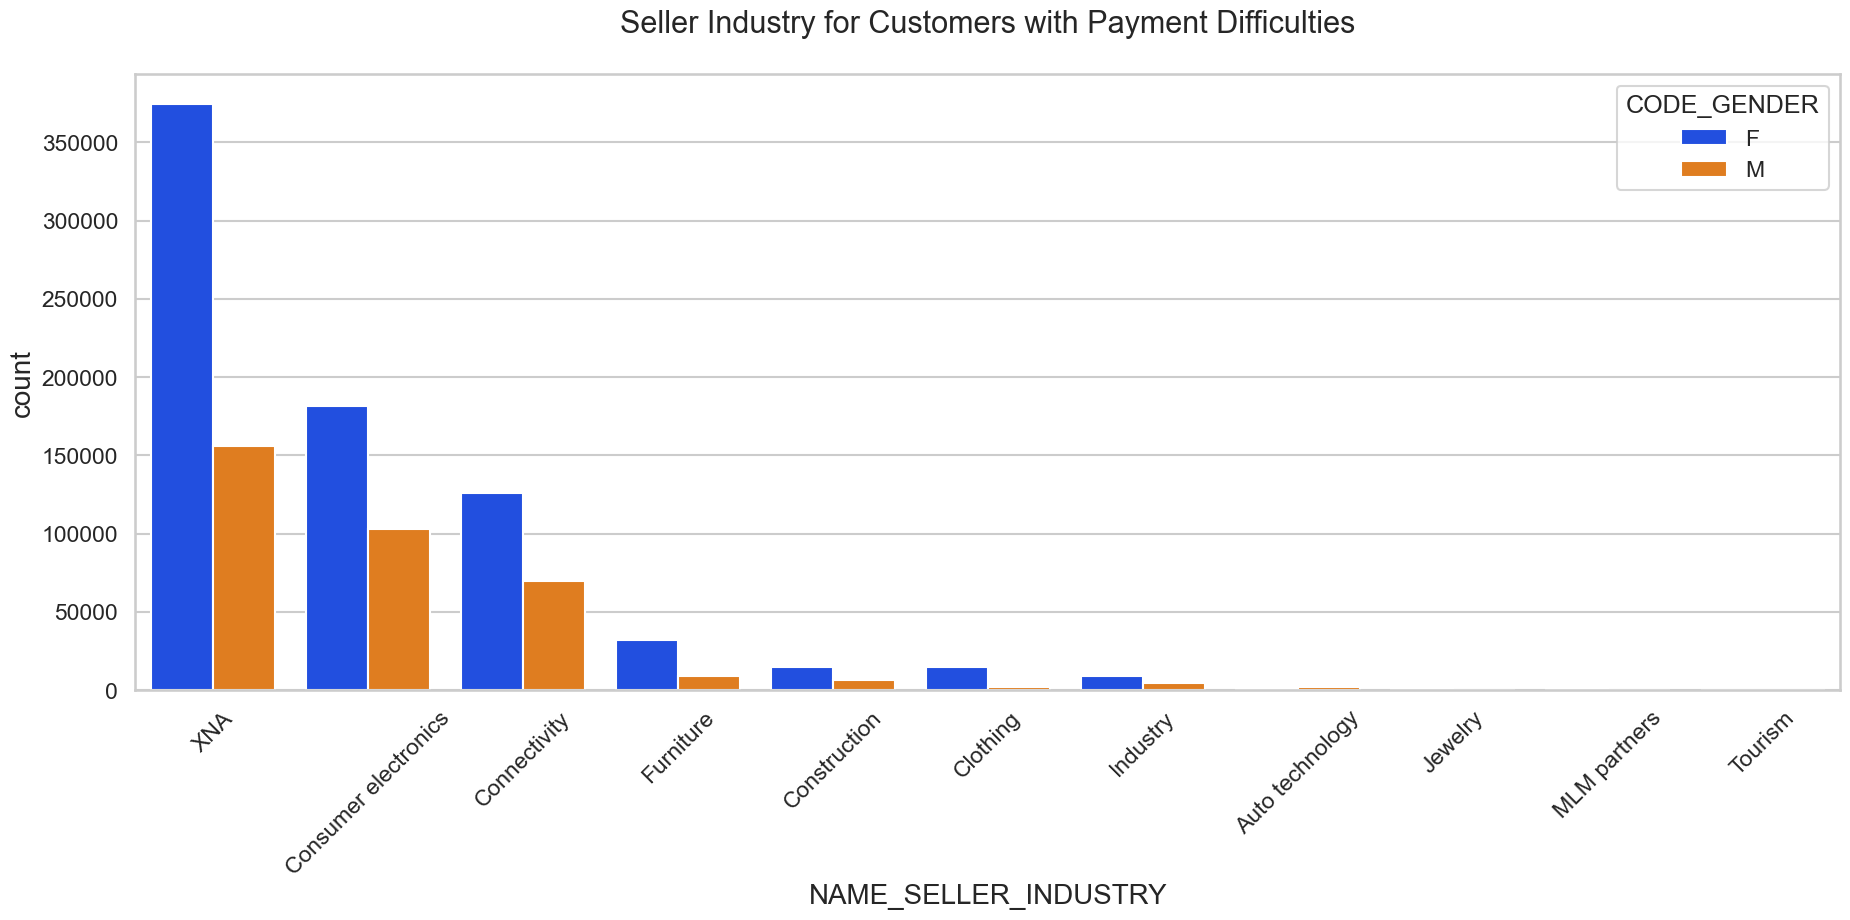

In [151]:
uniplot(previous_application_target0, col='NAME_SELLER_INDUSTRY', title='Seller Industry for Customers with Payment Difficulties', hue='CODE_GENDER')

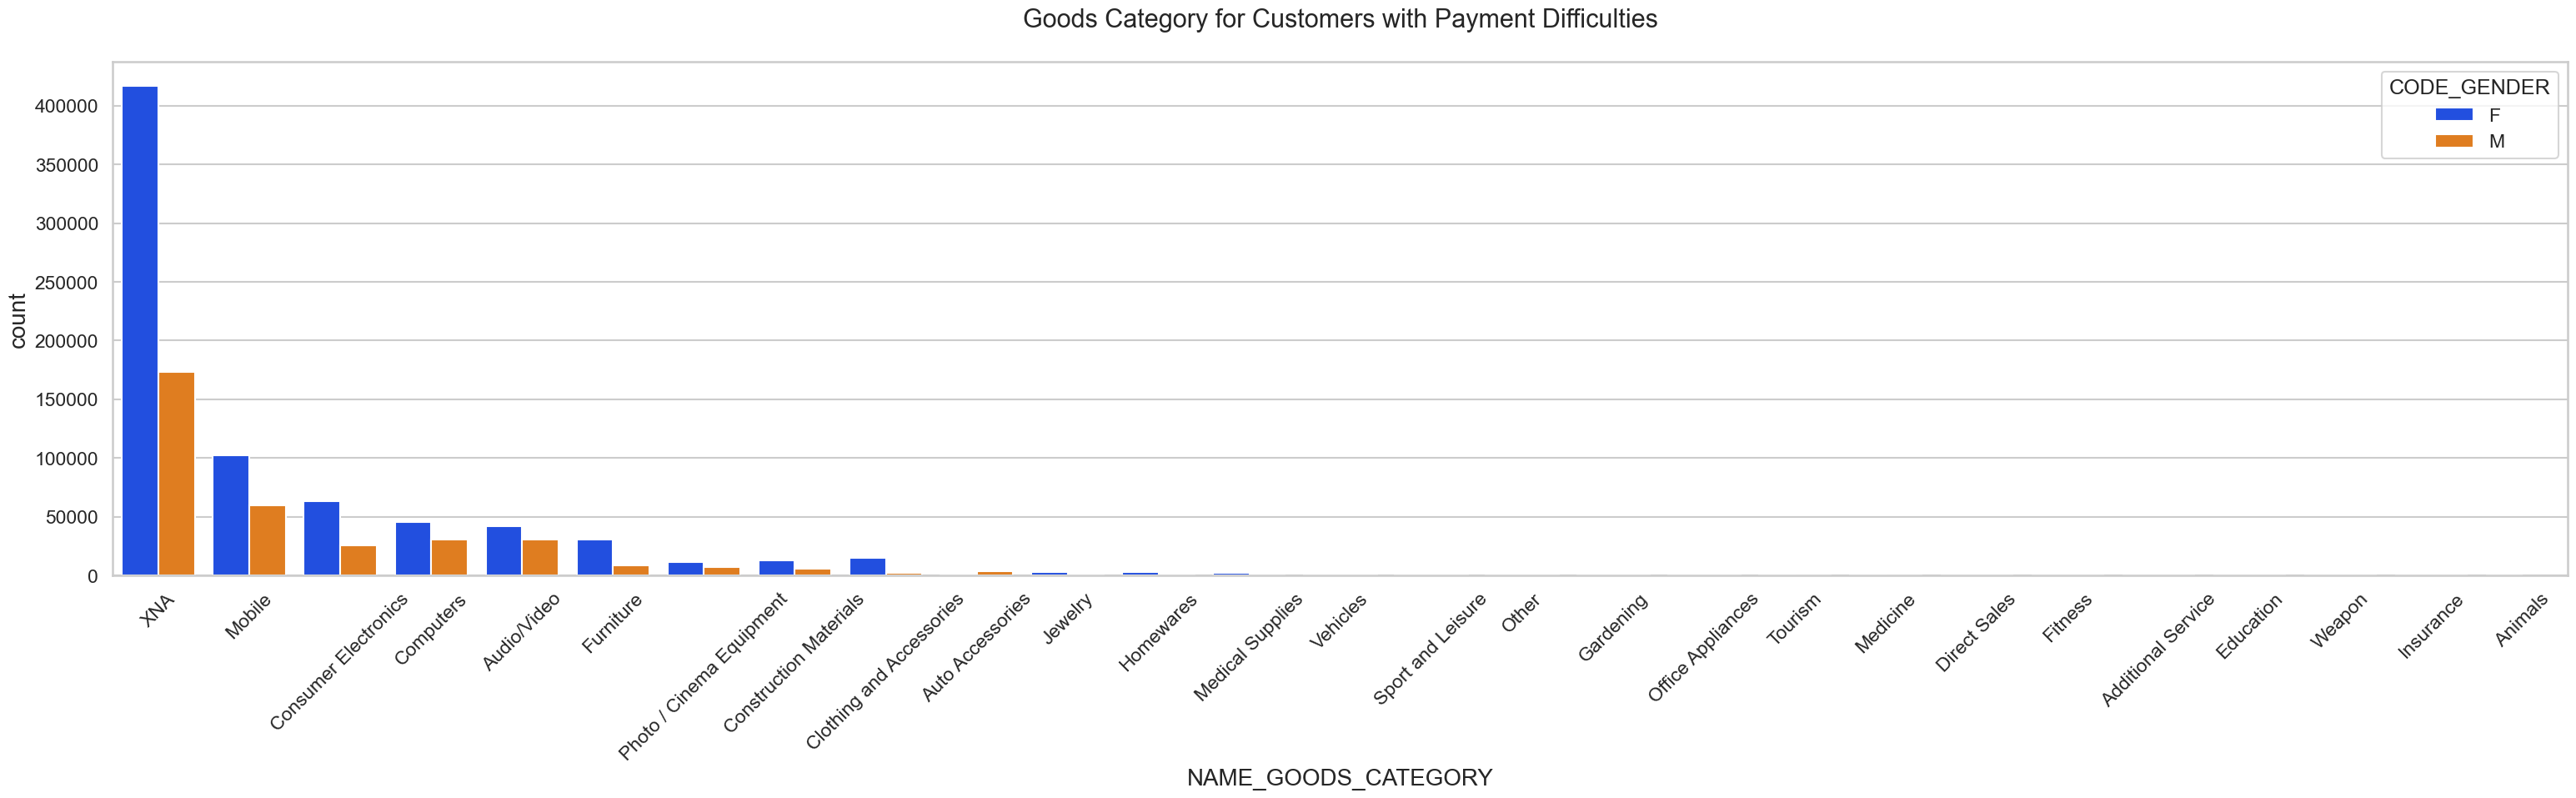

In [152]:
uniplot(previous_application_target0, col='NAME_GOODS_CATEGORY', title='Goods Category for Customers with Payment Difficulties', hue='CODE_GENDER')

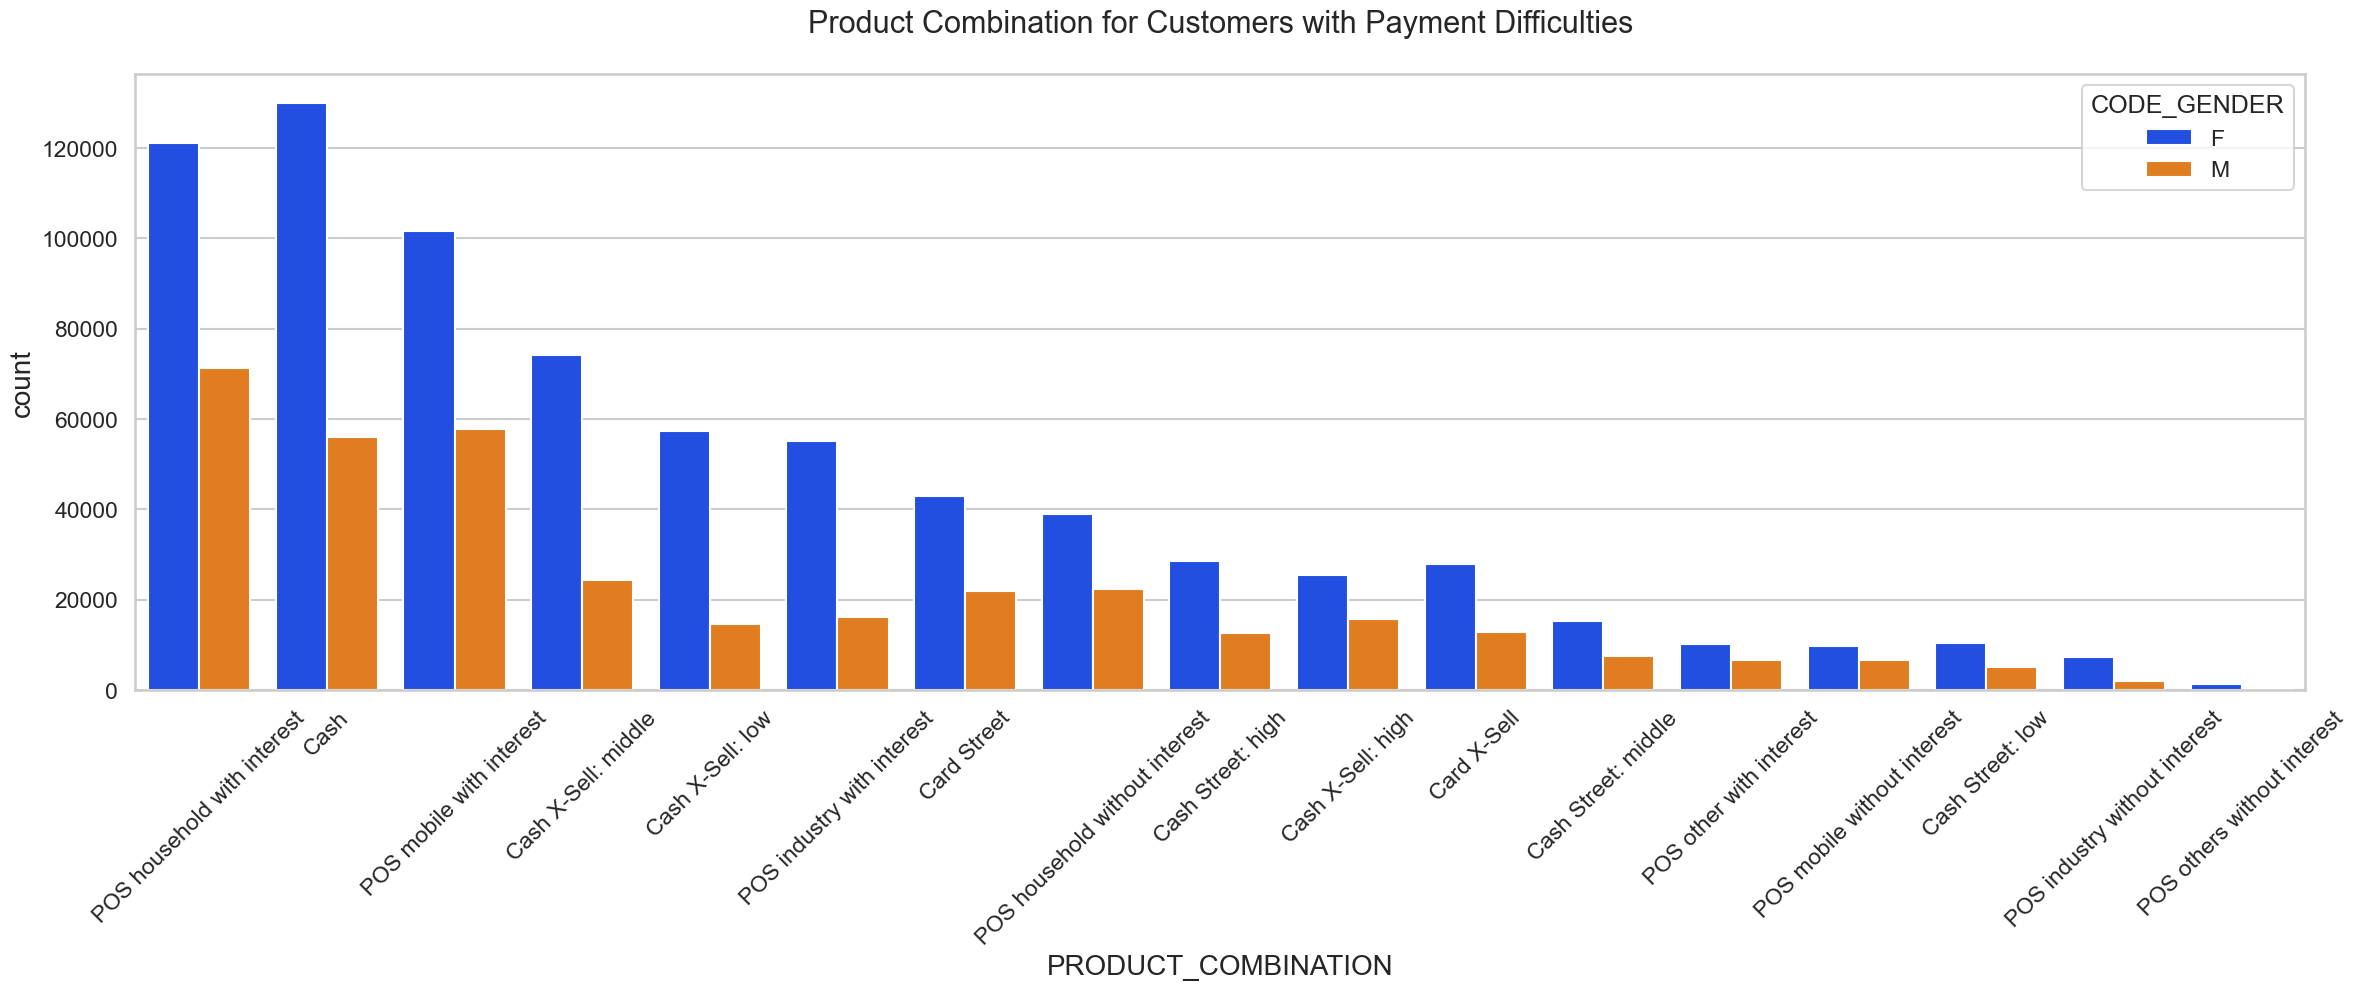

In [153]:
uniplot(previous_application_target0, col='PRODUCT_COMBINATION', title='Product Combination for Customers with Payment Difficulties', hue='CODE_GENDER')

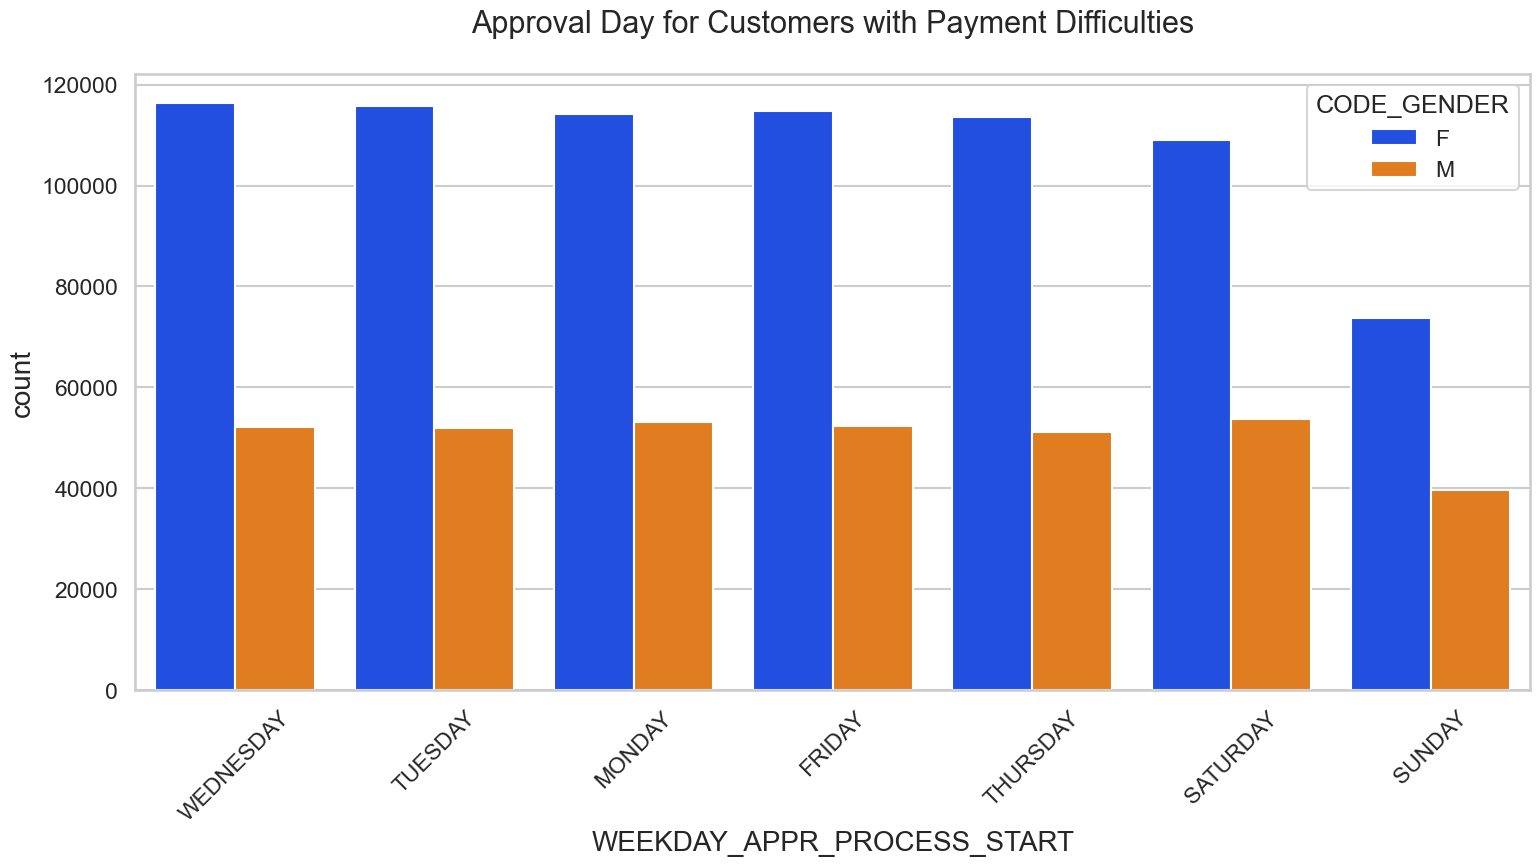

In [154]:
uniplot(previous_application_target0, col='WEEKDAY_APPR_PROCESS_START', title='Approval Day for Customers with Payment Difficulties', hue='CODE_GENDER')

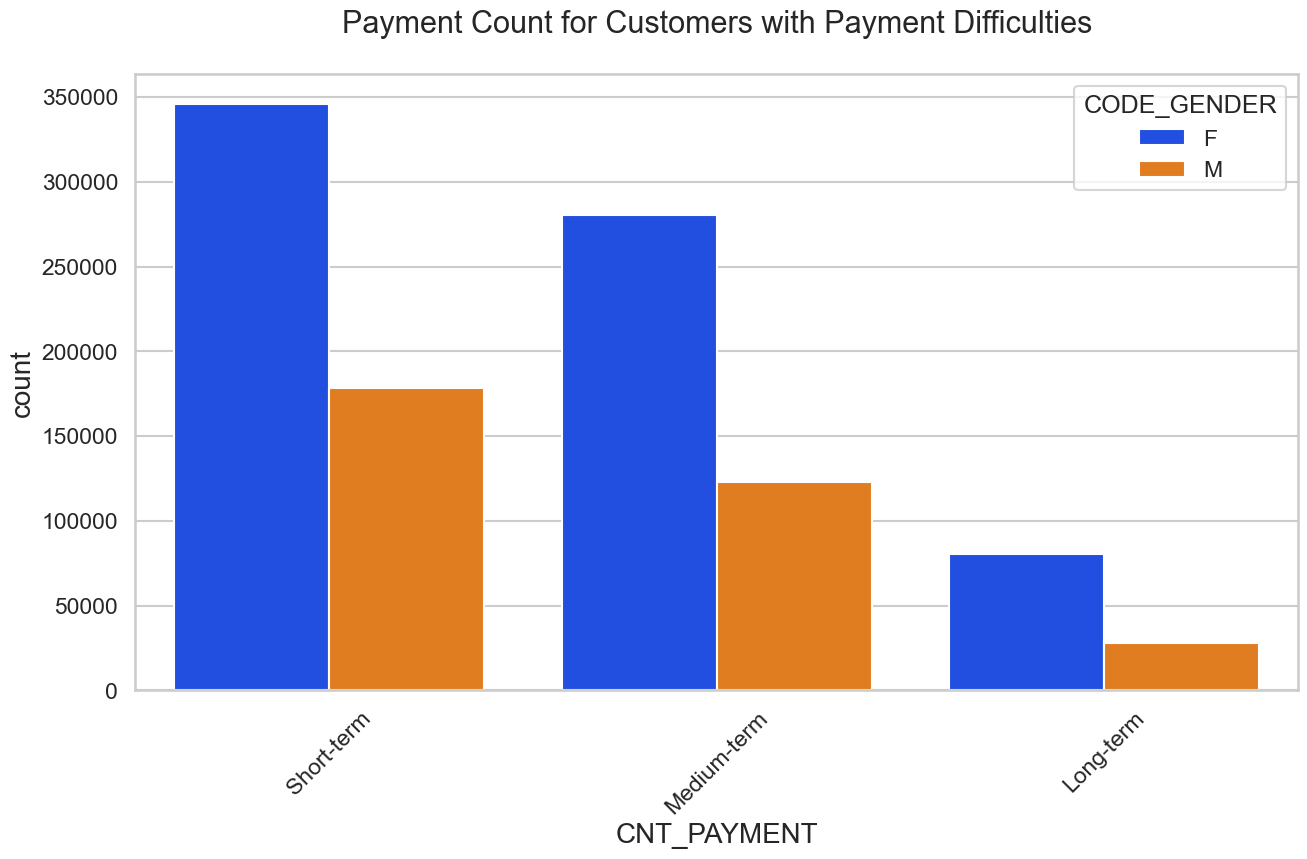

In [155]:
uniplot(previous_application_target0, col='CNT_PAYMENT', title='Payment Count for Customers with Payment Difficulties', hue='CODE_GENDER')